In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import explore_2 as e2
import model_2 as m2
import wrangle_2 as w2

from sklearn.metrics import recall_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

Source

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset/discussion?select=healthcare-dataset-stroke-data.csv

https://www.cdc.gov/stroke/facts.htm

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [2]:

# Decision Tree and Model Evaluation Imports
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  formerly smoked   
1     Self-employed          Rural             202.21   NaN     never smoked   
2           Private          Rural             105.92  32.5     never smoked   
3           Private          Urban             171.23  34.4           smokes   
4     Self-employed          Rural             174.12  24.0     never smoked   
...             ...            ...                ...   ...              ...   
5105        Private          Urban              83.75   NaN     never smoked   
5106  Self-employed          Urban             125.20  40.0     never smoked   
5107  Self-employed          Rural              82.99  30.6     never smoked   
5108        Private          Rural             166.29  25.6  formerly smoked   
5109       Govt_job          Urban              85.28  26.2          Unknown   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [5]:
#df = pd.read_csv('full_data.csv')

In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### there are 201 null values in bmi
BMI will be imputed with average bmi after split

In [7]:
# total of 3.9% of data is null will be imputed with median after split
201/5110

0.03933463796477495

In [8]:
df.shape

(5110, 12)

In [9]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [10]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [11]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [12]:
df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

### This dataset also contain children age ranges from 0 to 82

In [13]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [14]:
df[df.work_type=='children'].describe()

id         age  hypertension  heart_disease  \
count    687.000000  687.000000         687.0     687.000000   
mean   35769.432314    6.841339           0.0       0.001456   
std    21005.291797    4.533364           0.0       0.038152   
min       77.000000    0.080000           0.0       0.000000   
25%    16583.000000    2.000000           0.0       0.000000   
50%    35106.000000    6.000000           0.0       0.000000   
75%    53933.500000   11.000000           0.0       0.000000   
max    72940.000000   16.000000           0.0       1.000000   

       avg_glucose_level         bmi      stroke  
count         687.000000  671.000000  687.000000  
mean           94.400277   20.038003    0.002911  
std            26.658955    4.540639    0.053916  
min            55.340000   10.300000    0.000000  
25%            76.255000   17.150000    0.000000  
50%            90.220000   18.900000    0.000000  
75%           108.710000   21.600000    0.000000  
max           219.810000   41.700000    1.000000

### If worktype is children the age range is from 0 to 16
worktype children means they are children

# create Dummies

In [15]:
def dummy(df, columns):
    '''
    dummy_var takes in data frame and column list and creates dummy variables for columns
    appends dummy to main data frame
    
    returns data frame
    '''
    # create dummies
    dummy_df = pd.get_dummies(df[
                                    columns], dummy_na=False)
    
    # Concatenate dummy_df to original data frame
    df = pd.concat([df, dummy_df], axis=1)
    
    return df

### create dummies for columns that are categorical

In [16]:
columns=['gender', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']

In [17]:
df = dummy(df, columns)

In [18]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi  ...  \
0           Private          Urban             228.69  36.6  ...   
1     Self-employed          Rural             202.21   NaN  ...   
2           Private          Rural             105.92  32.5  ...   
3           Private          Urban             171.23  34.4  ...   
4     Self-employed          Rural             174.12  24.0  ...   
...             ...            ...                ...   ...  ...   
5105        Private          Urban              83.75   NaN  ...   
5106  Self-employed          Urban             125.20  40.0  ...   
5107  Self-employed          Rural              82.99  30.6  ...   
5108        Private          Rural             166.29  25.6  ...   
5109       Govt_job          Urban              85.28  26.2  ...   

     work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                         0                  1                        0   
1                         0                  0                        1   
2                         0                  1                        0   
3                         0                  1                        0   
4                         0                  0                        1   
...                     ...                ...                      ...   
5105                      0                  1                        0   
5106                      0                  0                        1   
5107                      0                  0                        1   
5108                      0                  1                        0   
5109                      0                  0                        0   

      work_type_children  Residence_type_Rural  Residence_type_Urban  \
0                      0                     0                     1   
1                      0                     1                     0   
2                      0                     1                     0   
3                      0                     0                     1   
4                      0                     1                     0   
...                  ...                   ...                   ...   
5105                   0                     0                     1   
5106                   0                     0                     1   
5107                   0                     1                     0   
5108                   0                     1                     0   
5109                   0                     0                     1   

      smoking_status_Unknown  smoking_status_formerly smoked  \
0                          0                               1   
1                          0                               0   
2                          0                               0   
3                          0                               0   
4                          0                               0   
...                      ...                             ...   
5105                       0                               0   
5106                       0                               0 

# Split

In [19]:
def split_data(df, target):
    '''
    split_date takes in a dataframe  and target variable and splits into train , validate, test 
    and stratifies on target variable
    
    The split is 20% test 80% train/validate. Then 30% of 80% validate and 70% of 80% train.
    Aproximately (train 56%, validate 24%, test 20%)
    
    returns train, validate, and test 
    '''
    # split test data from train/validate
    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123, 
                                        stratify=df [target])

    # split train from validate
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123, 
                                   stratify=train_validate[target])
                                   
    return train, validate, test

In [20]:
train, validate, test = split_data(df,'stroke')

In [21]:
train.bmi.describe()

count    2740.000000
mean       29.026058
std         8.024367
min        10.300000
25%        23.600000
50%        28.200000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [22]:
train.bmi.median()

28.2

(array([2.290e+02, 1.074e+03, 1.017e+03, 3.290e+02, 6.100e+01, 2.400e+01,
        3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([10.3 , 19.03, 27.76, 36.49, 45.22, 53.95, 62.68, 71.41, 80.14,
        88.87, 97.6 ]),
 <BarContainer object of 10 artists>)

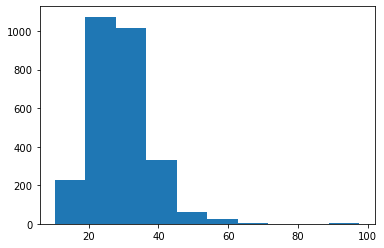

In [23]:
plt.hist(train.bmi)

In [24]:
def impute_bmi_median(train, validate, test):
    '''
    Takes in train, validate, and test, and uses train to identify the best value to replace nulls in embark_town
    Imputes that value into all three sets and returns all three sets
    '''
    imputer = SimpleImputer(missing_values = np.nan, strategy='median')
    train[['bmi']] = imputer.fit_transform(train[['bmi']])
    validate[['bmi']] = imputer.transform(validate[['bmi']])
    test[['bmi']] = imputer.transform(test[['bmi']])
    return train, validate, test

In [25]:
train, validate, test = impute_bmi_median(train, validate, test)

In [26]:
train, validate, test
train.isnull().sum()

id                                0
gender                            0
age                               0
hypertension                      0
heart_disease                     0
ever_married                      0
work_type                         0
Residence_type                    0
avg_glucose_level                 0
bmi                               0
smoking_status                    0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes       

# Explore

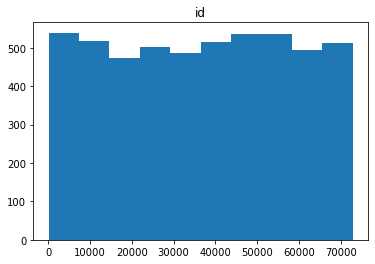

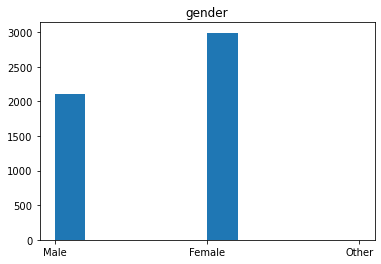

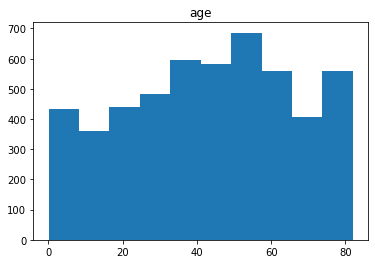

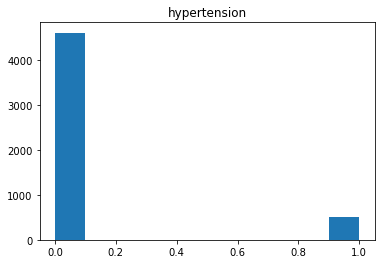

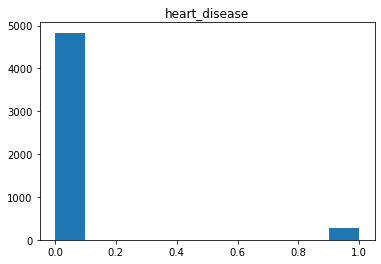

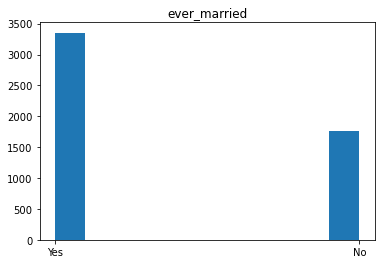

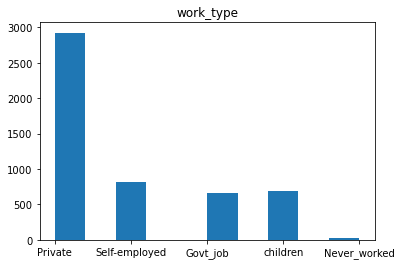

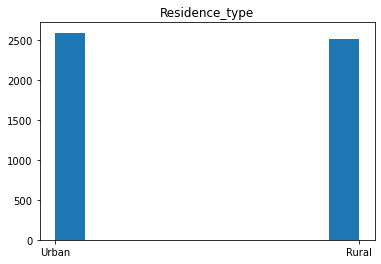

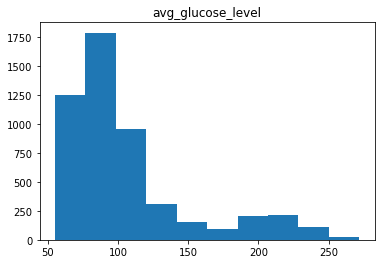

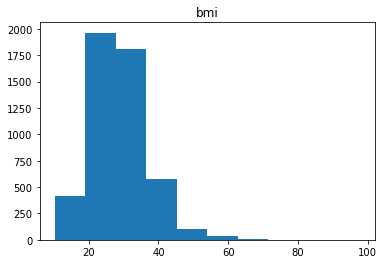

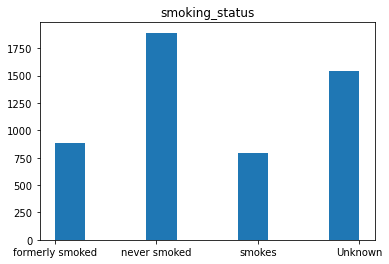

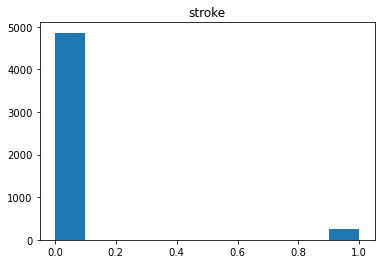

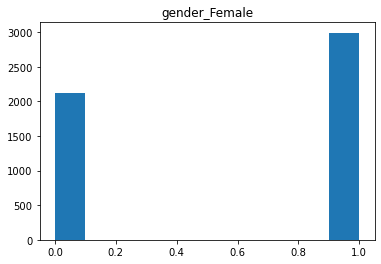

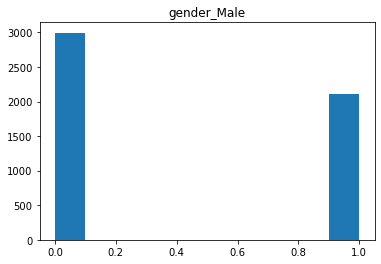

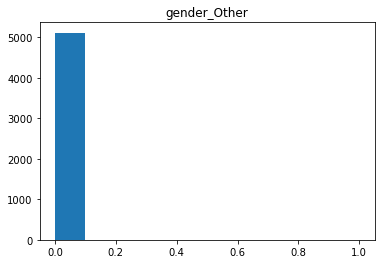

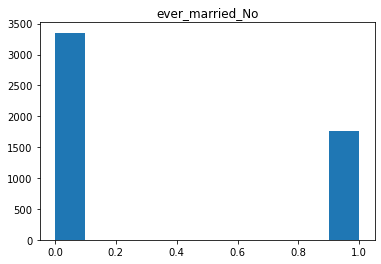

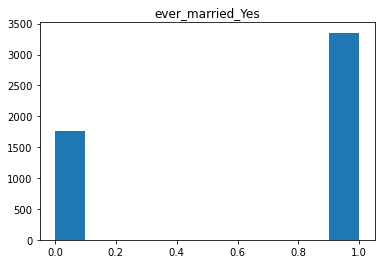

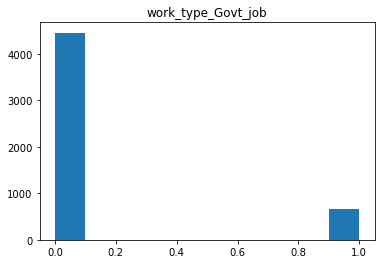

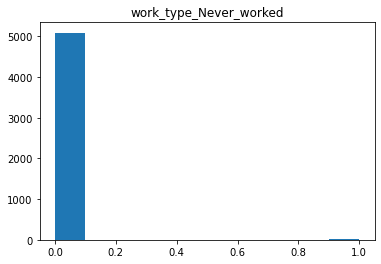

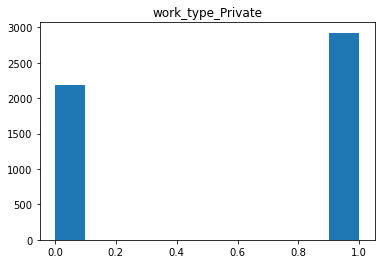

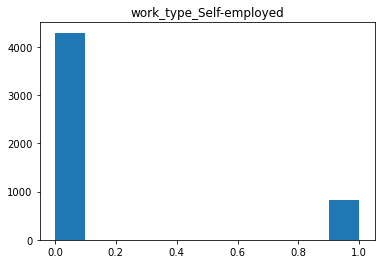

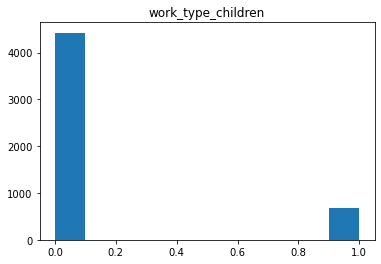

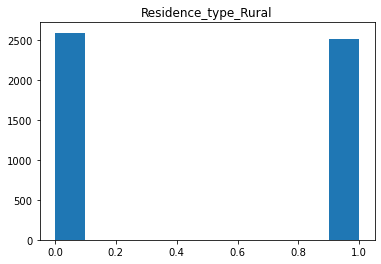

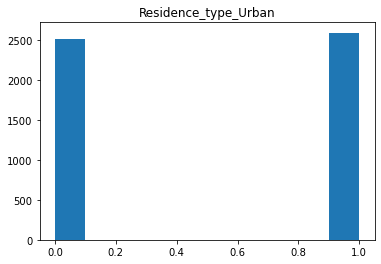

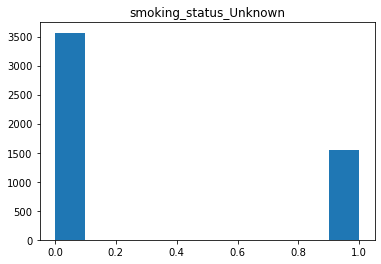

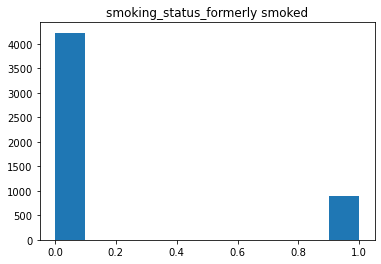

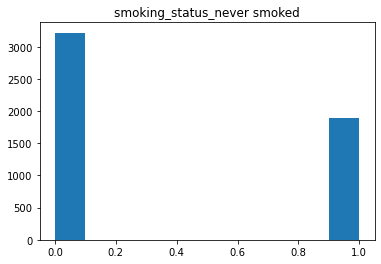

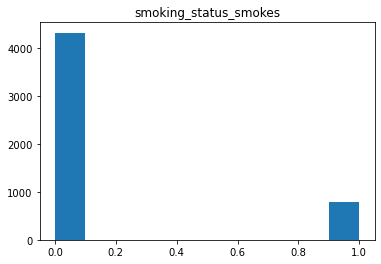

In [27]:
num_cols = train.columns
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [28]:
train.shape

(2861, 28)

In [29]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level',
       'smoking_status','bmi']

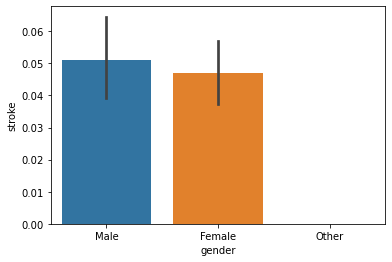

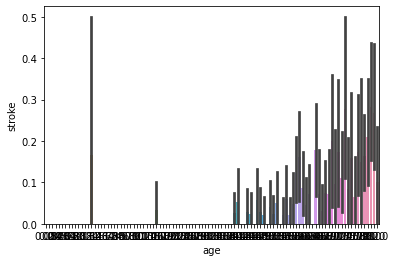

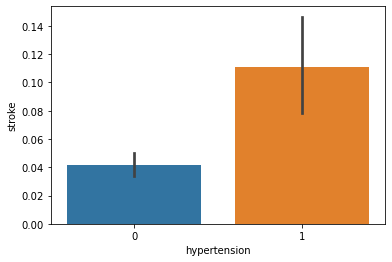

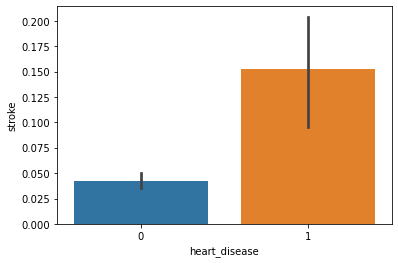

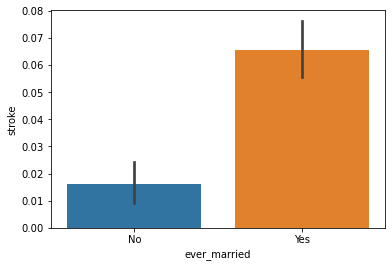

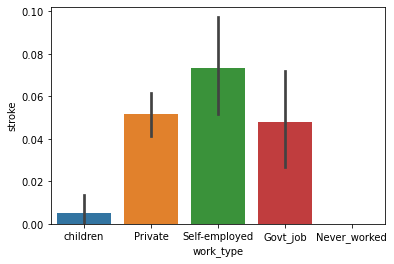

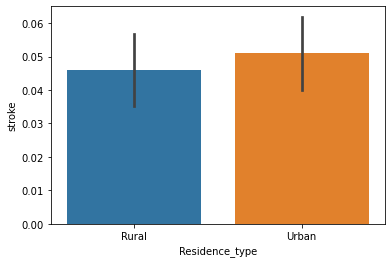

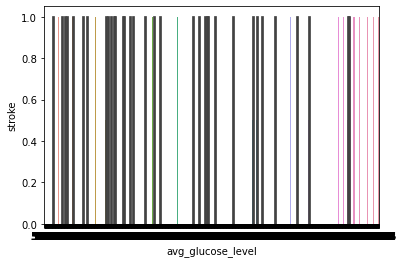

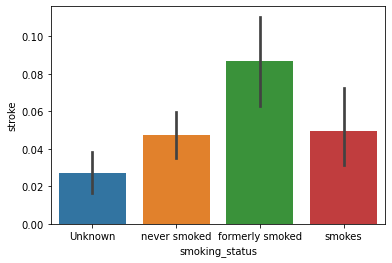

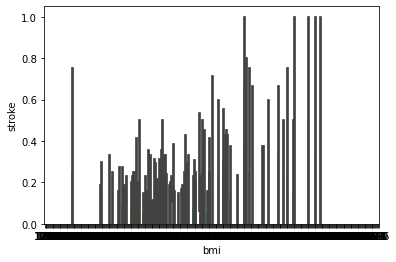

In [30]:
for i in features:
        sns.barplot(x=i, y='stroke', data = train)
        plt.show();

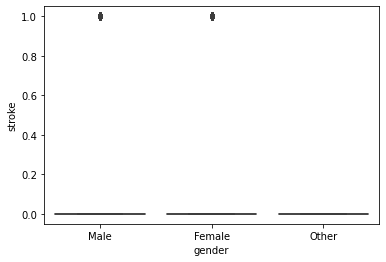

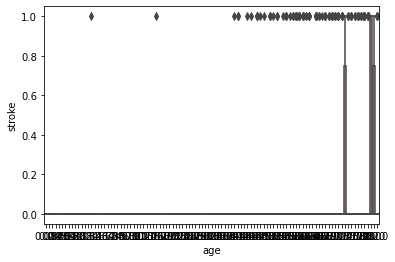

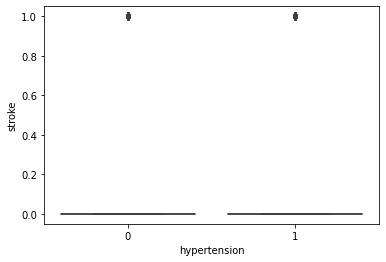

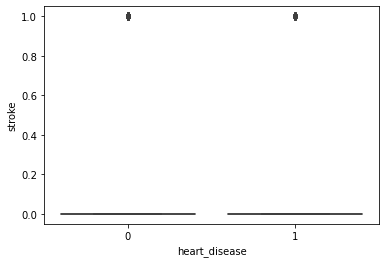

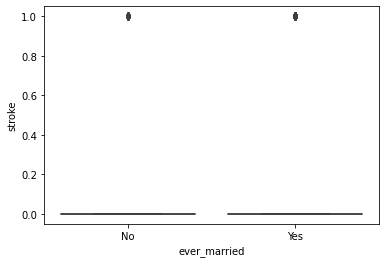

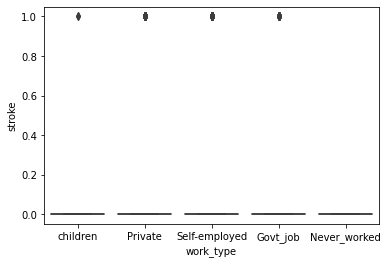

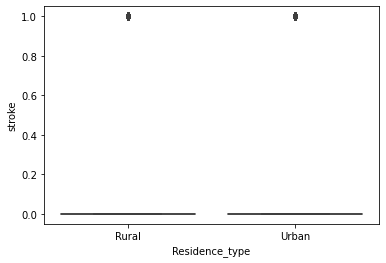

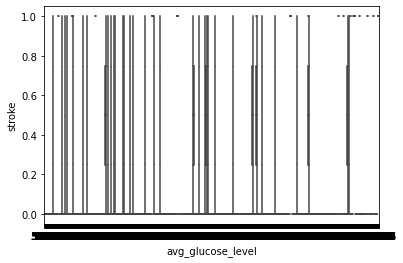

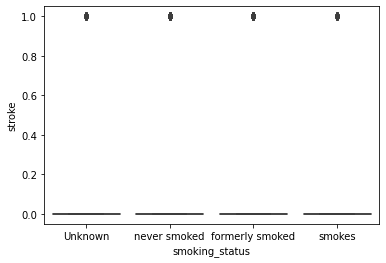

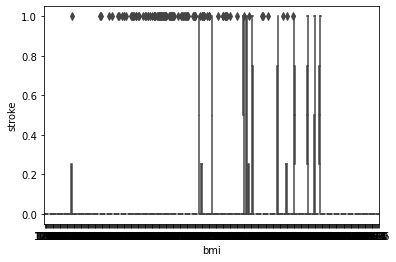

In [31]:
for columns in features:
        sns.boxplot(x=columns, y='stroke', data = train)
        plt.show();

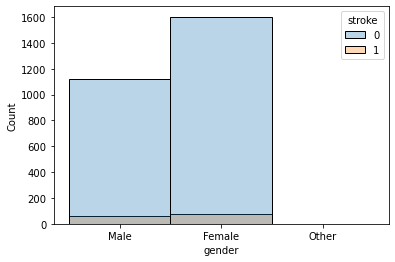

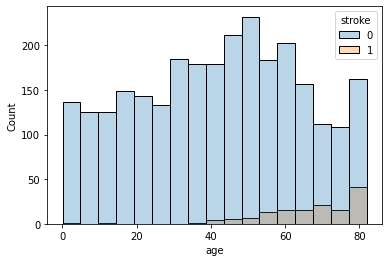

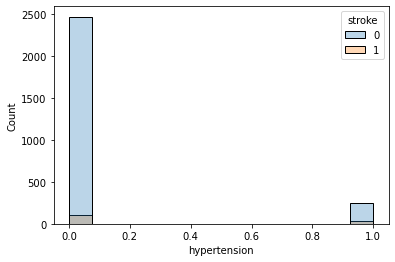

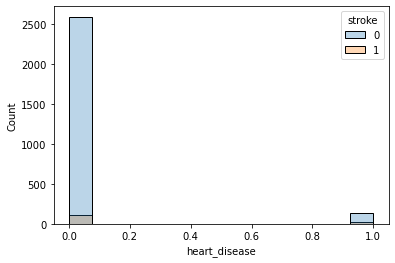

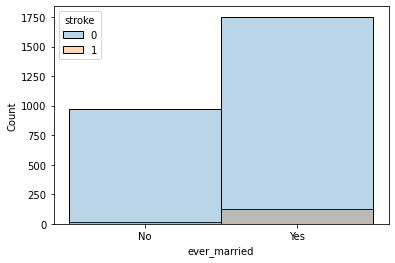

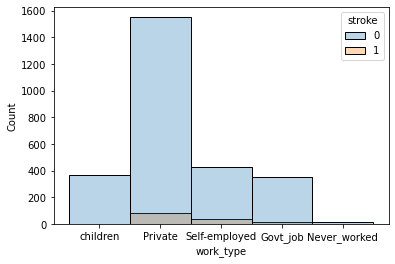

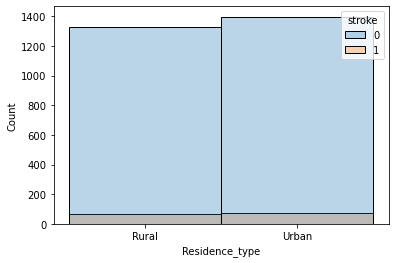

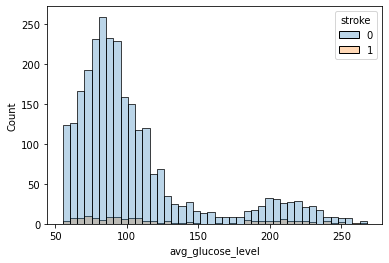

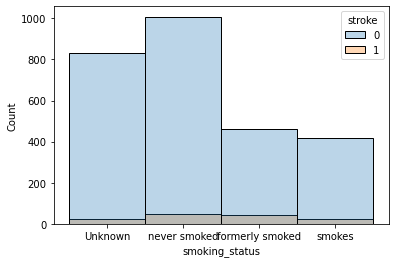

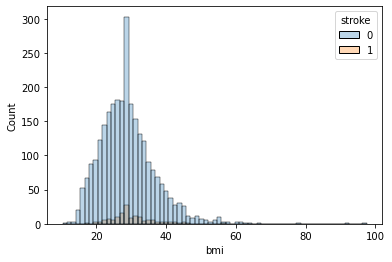

In [32]:
for columns in features:
        sns.histplot(x=columns, data = train,hue='stroke', alpha=0.3)
        plt.show();

# Columns

In [33]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 
       'smoking_status', 'stroke']
continuous =['age','avg_glucose_level', 'bmi']

In [34]:
def plot_variable_pair(df,columns):

    for i, col in enumerate(columns):
        sns.lmplot(data=df, x=col, y='stroke', line_kws={'color':'red'})
        plt.show()

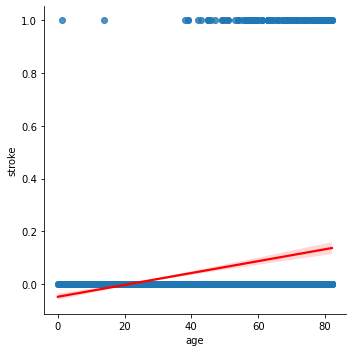

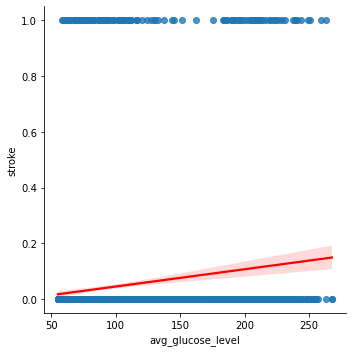

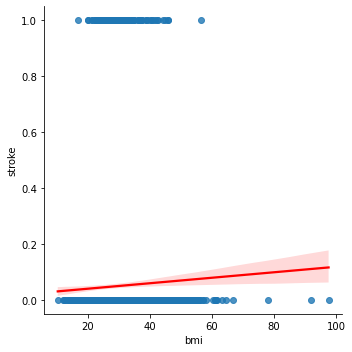

In [35]:
plot_variable_pair(train,continuous)

In [36]:
def plot_categorical_and_continuous_vars2(df):
    categorical =[]
    numerical =[]
    for i in train.columns.to_list():
        if train[i].dtypes == 'O':
            categorical.append(i)
        else:
            numerical.append(i)
    for col in categorical:
        for col2 in numerical:
            fig, (ax1, ax2, ax3,ax4) = plt.subplots(1,4, figsize=(25,5))
            fig.suptitle(f'{col} vs. {col2}')
            sns.boxplot(data=df, x=col, y=col2, ax=ax1)
            sns.violinplot(data=df, x=col, y=col2, ax=ax2)
            sns.barplot(data=df, x=col, y=col2, ax=ax3)
            sns.scatterplot(data=df, x=col, y=col2, ax=ax4)
            plt.show()

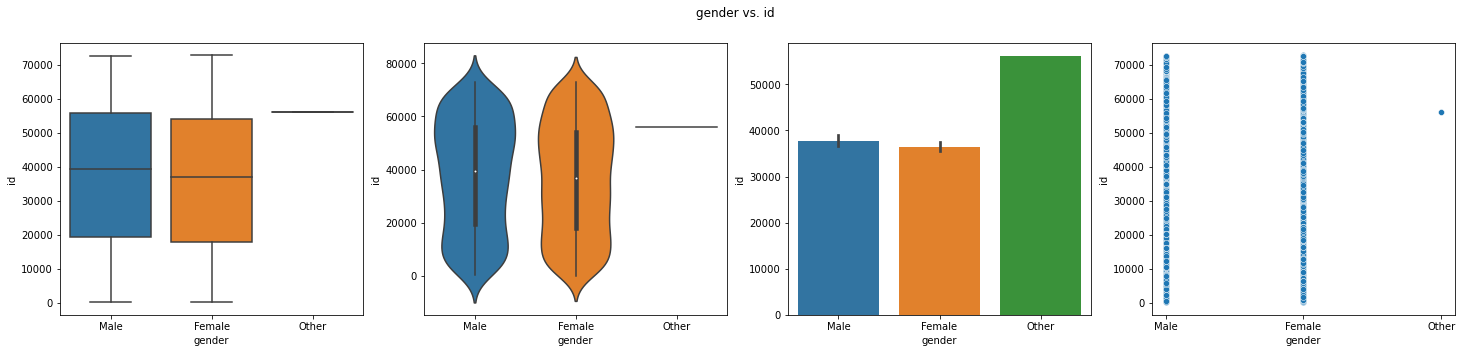

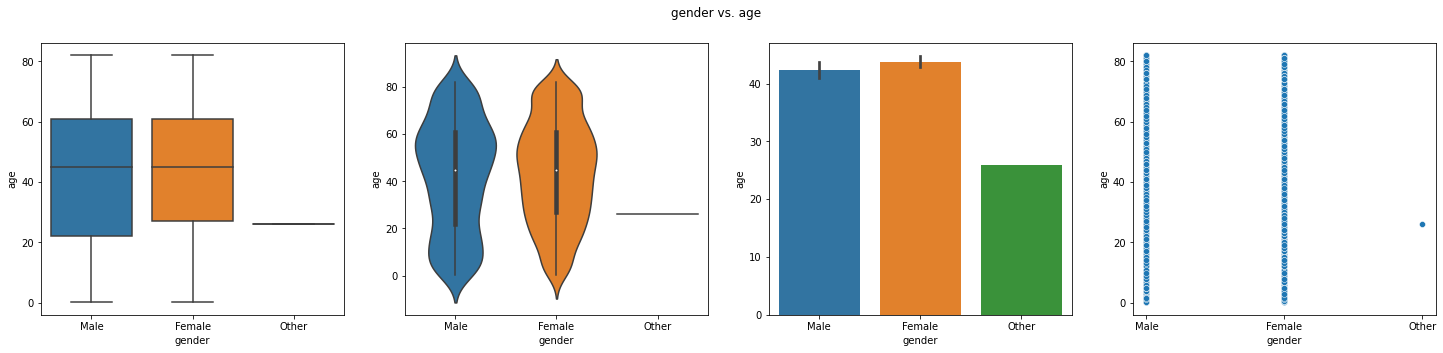

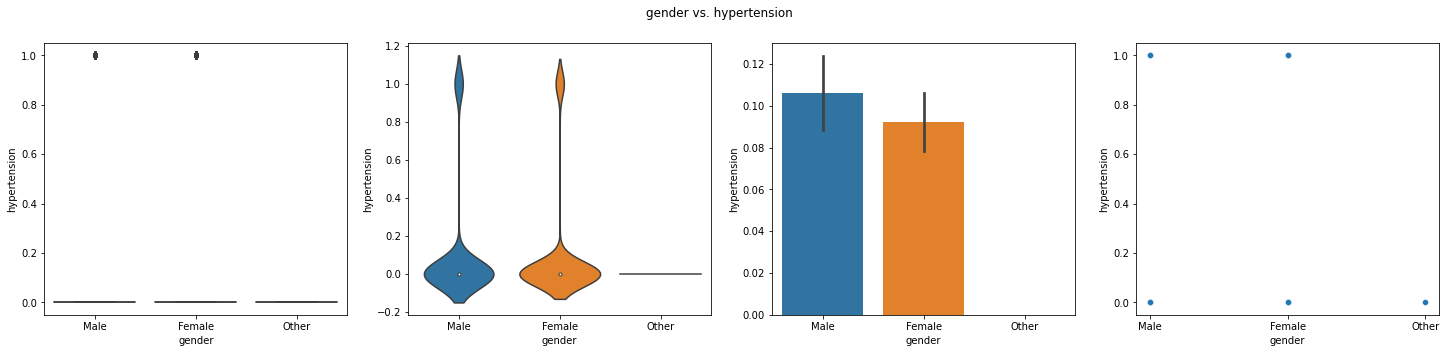

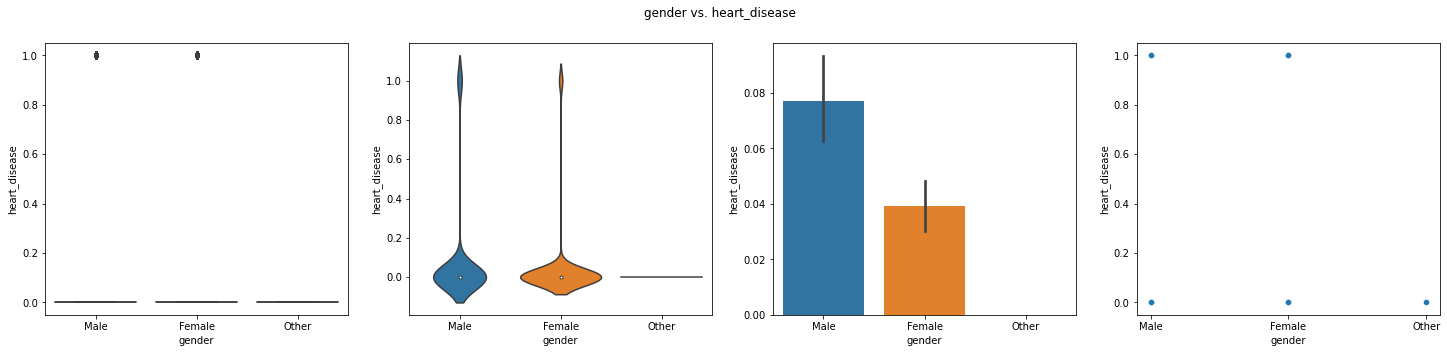

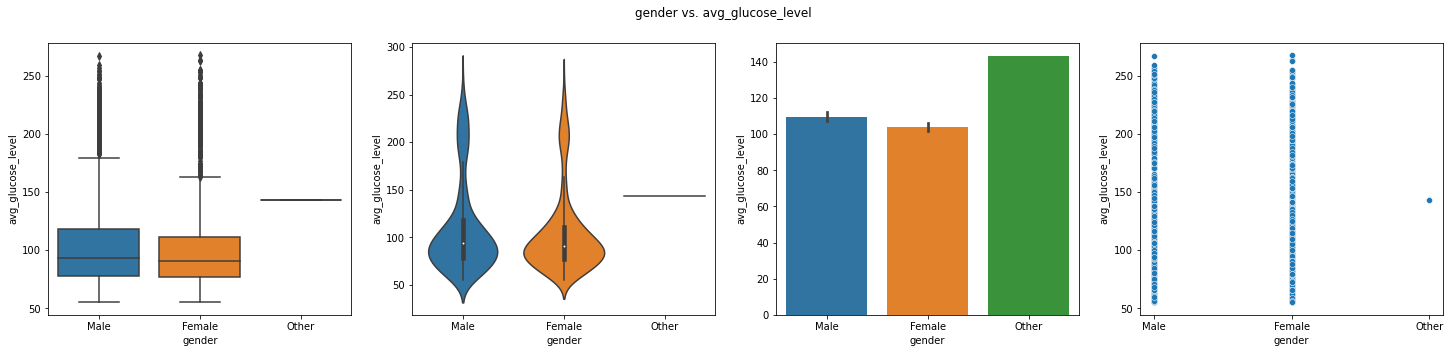

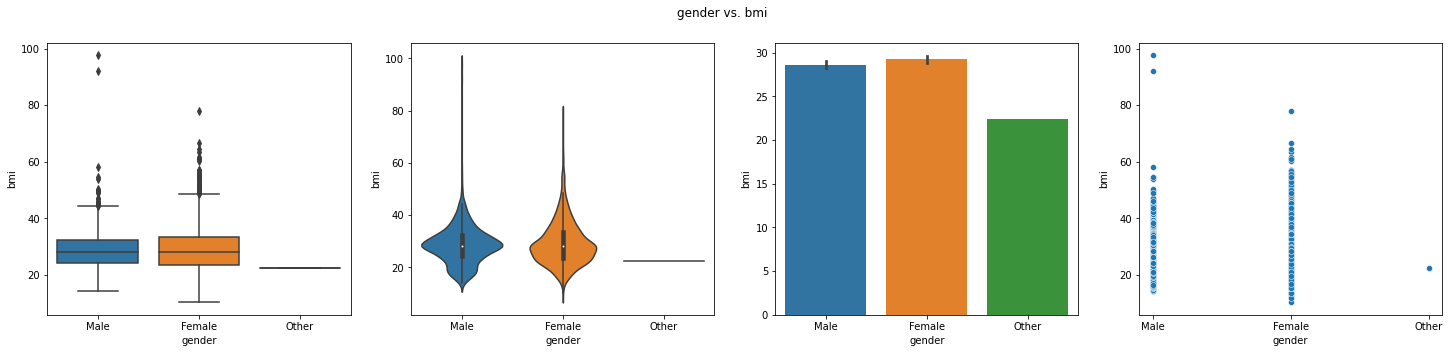

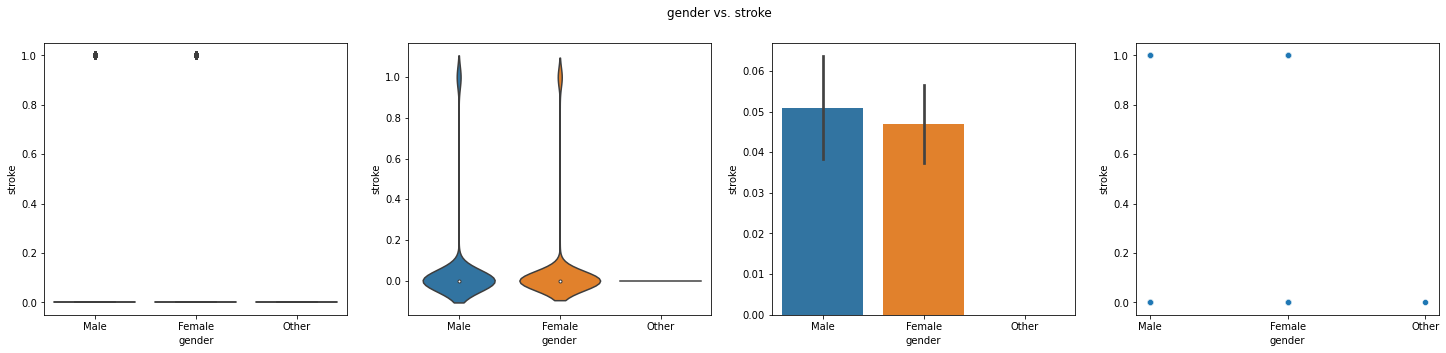

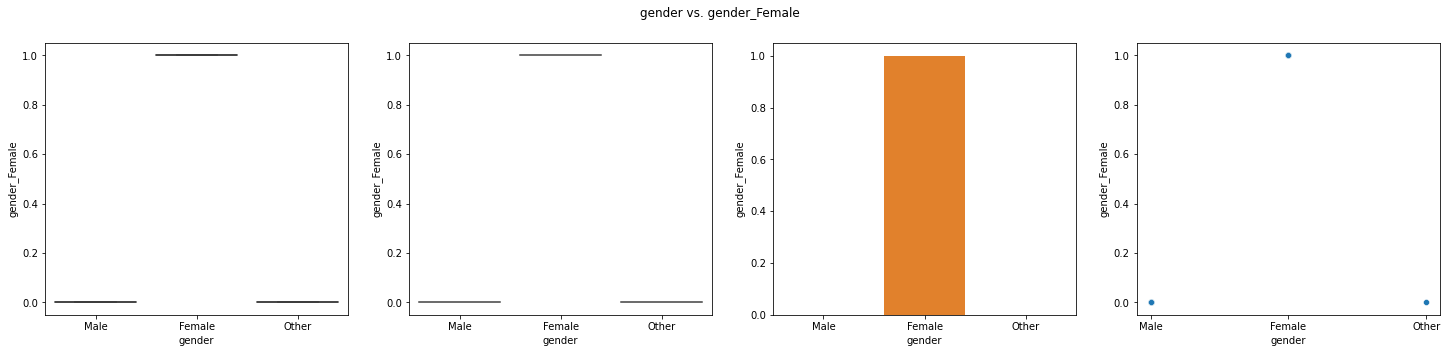

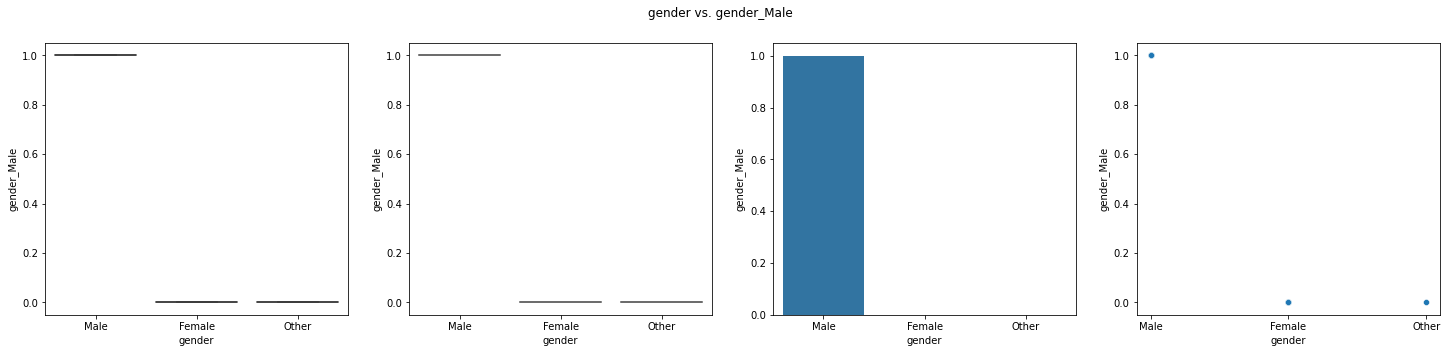

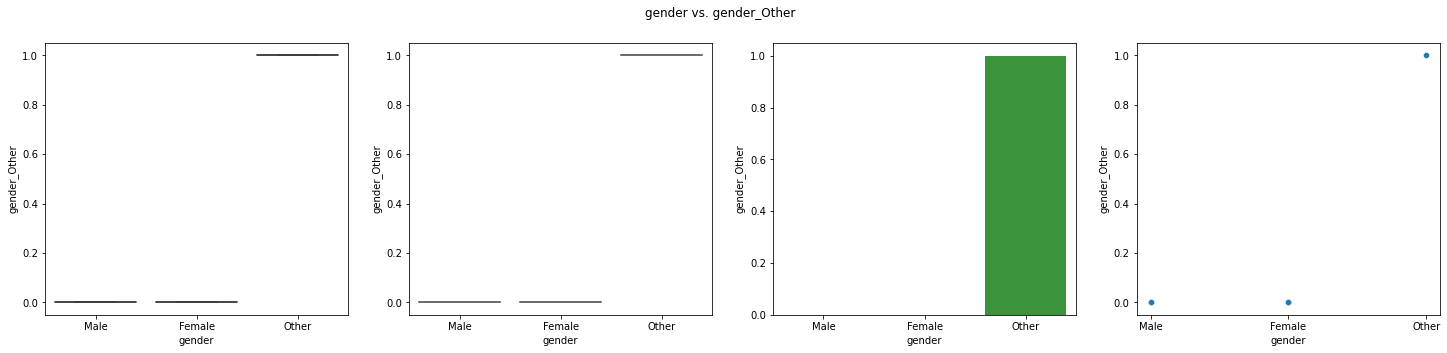

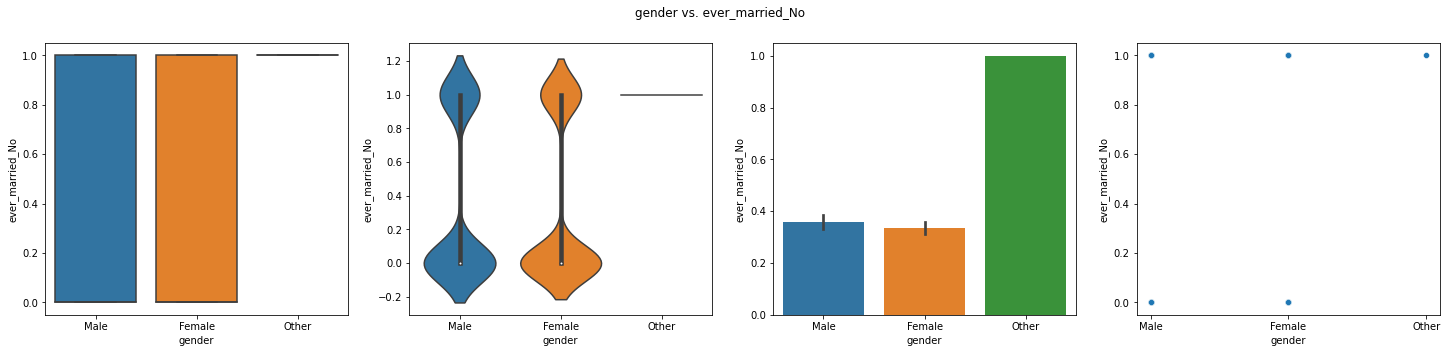

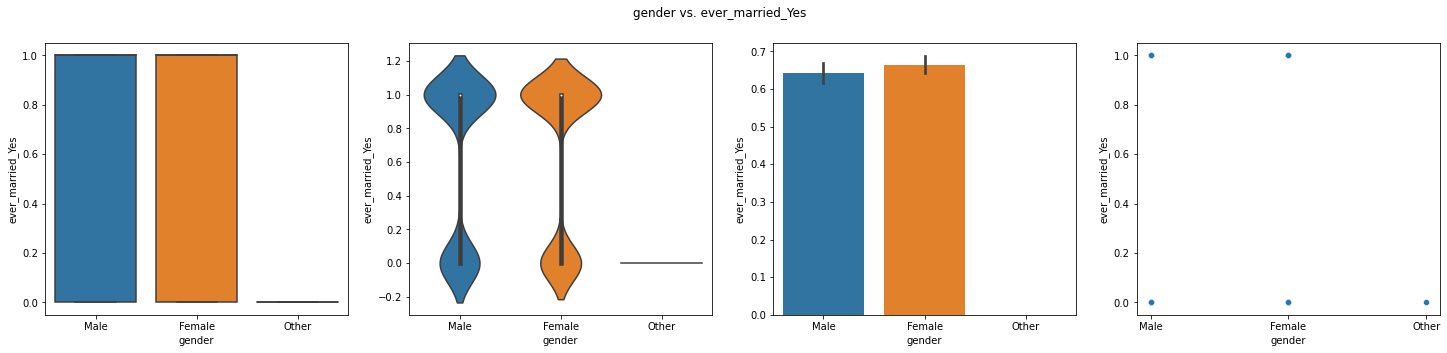

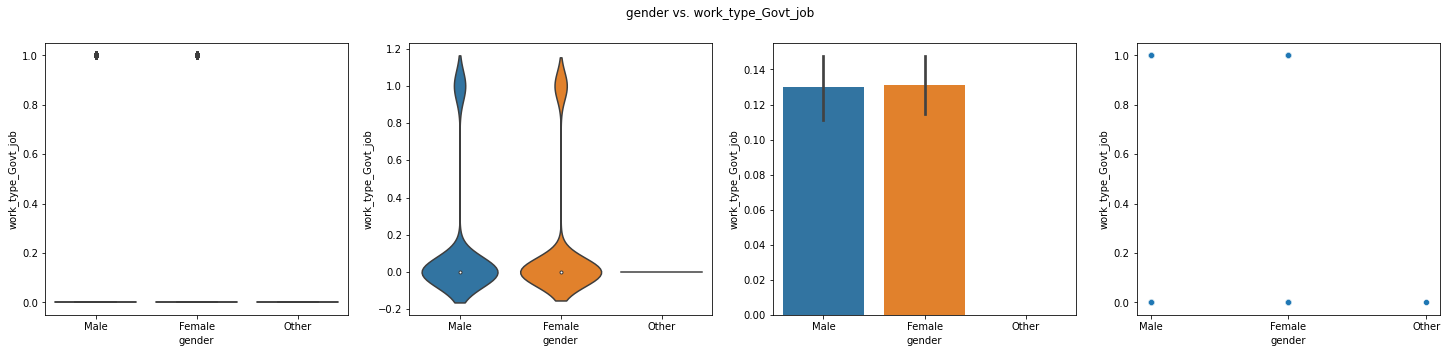

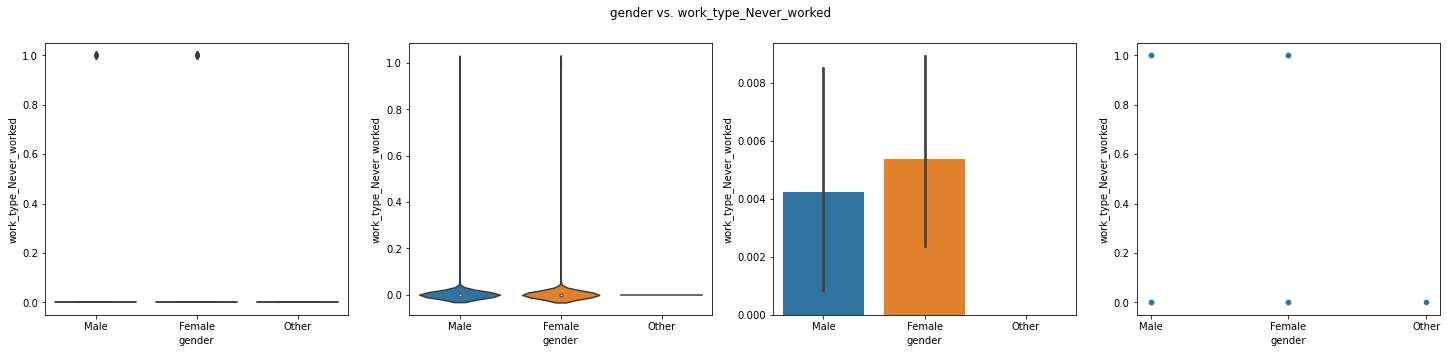

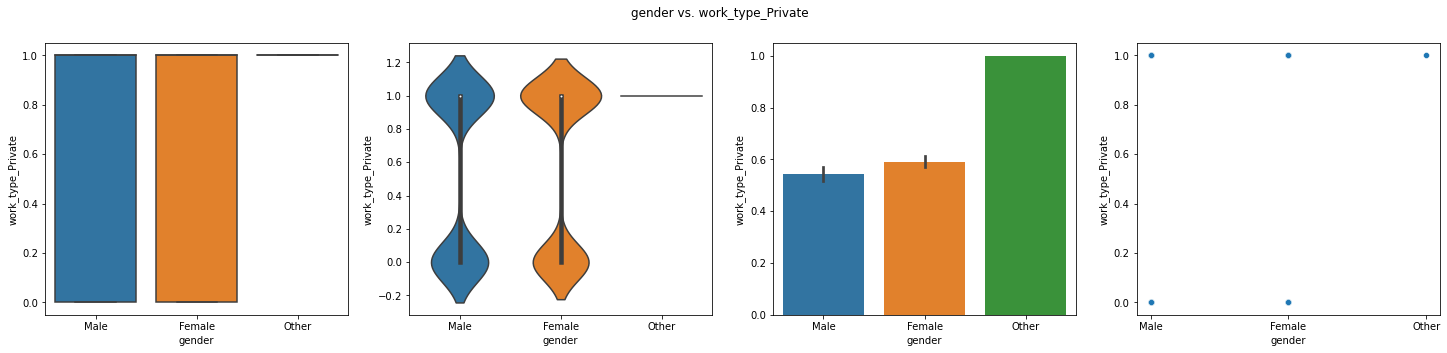

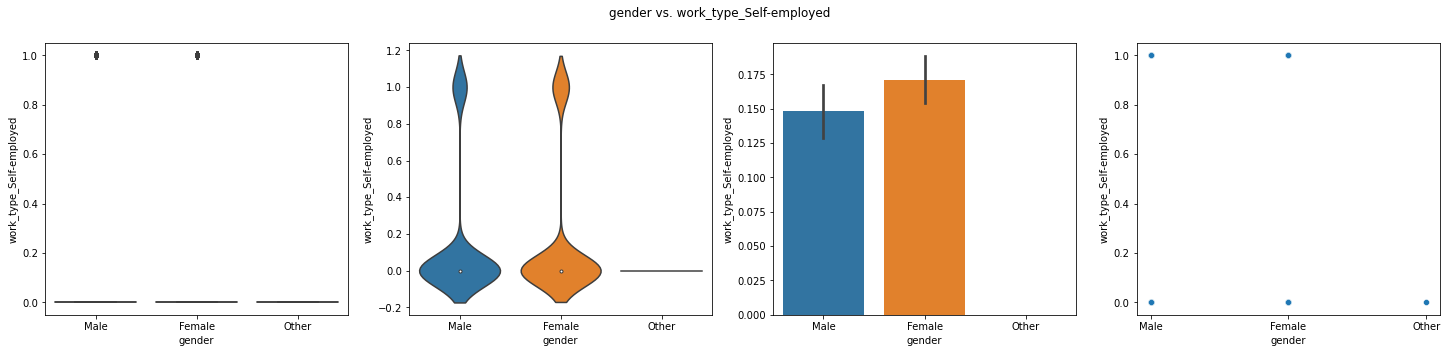

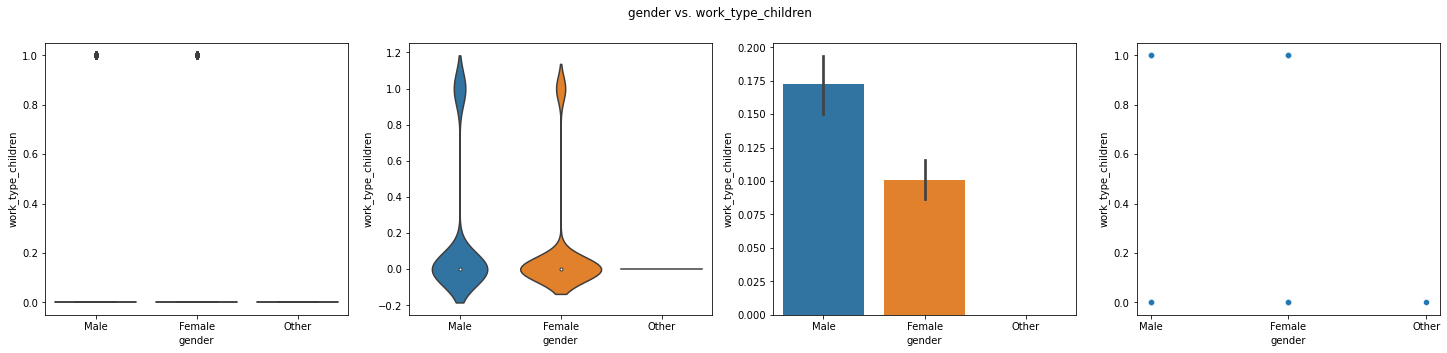

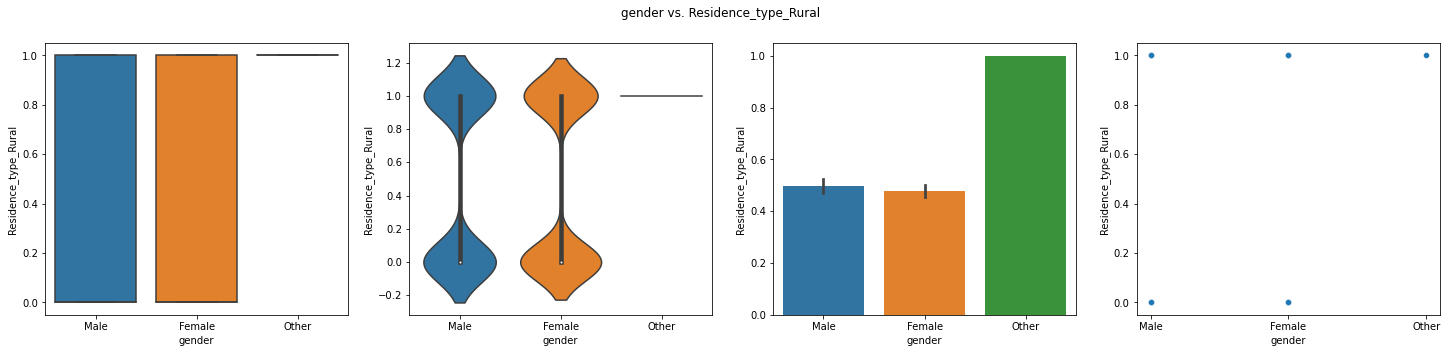

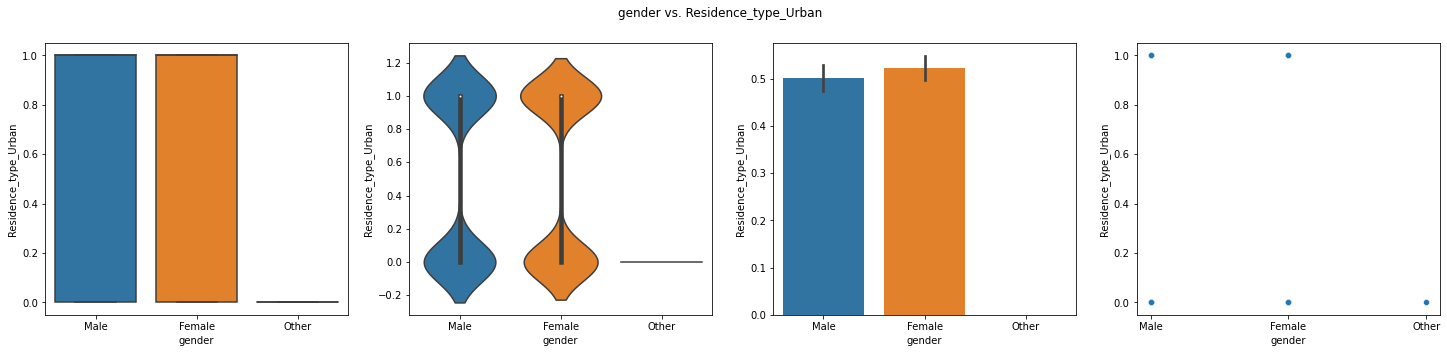

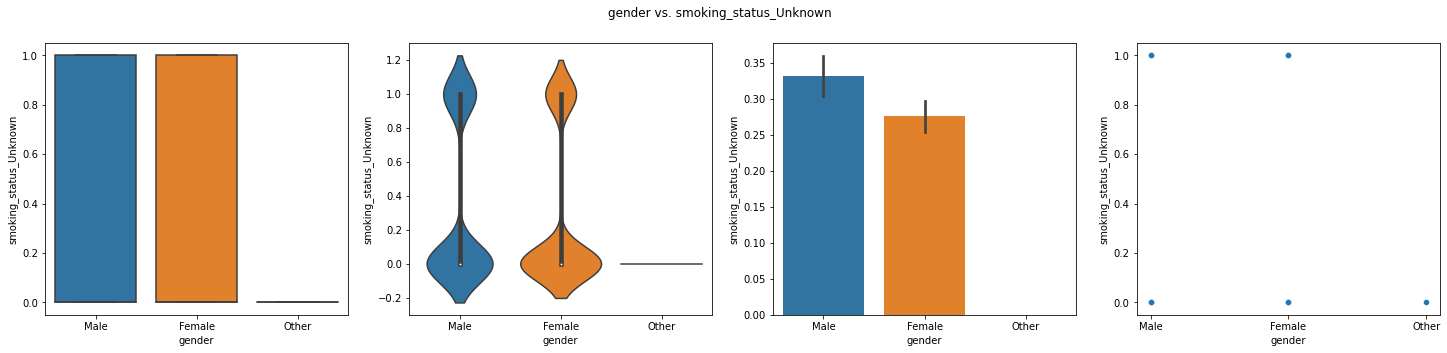

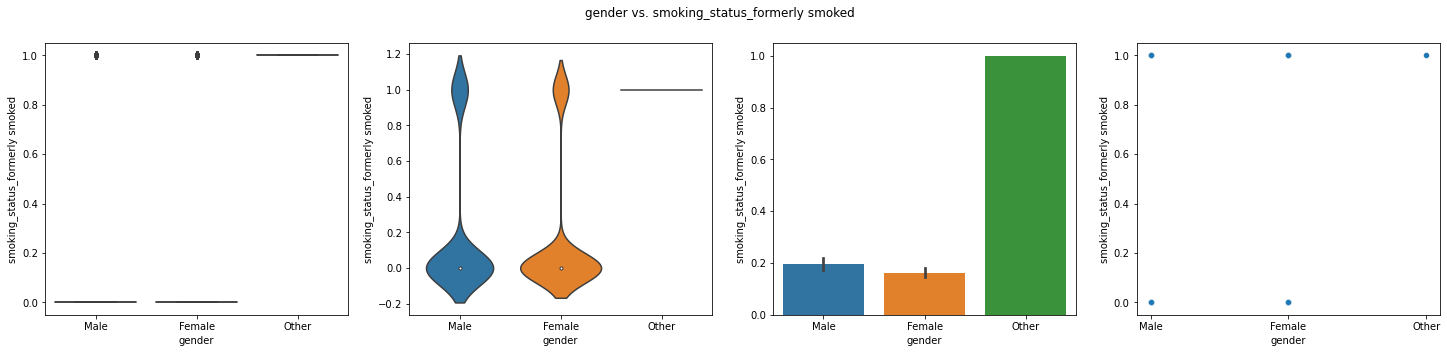

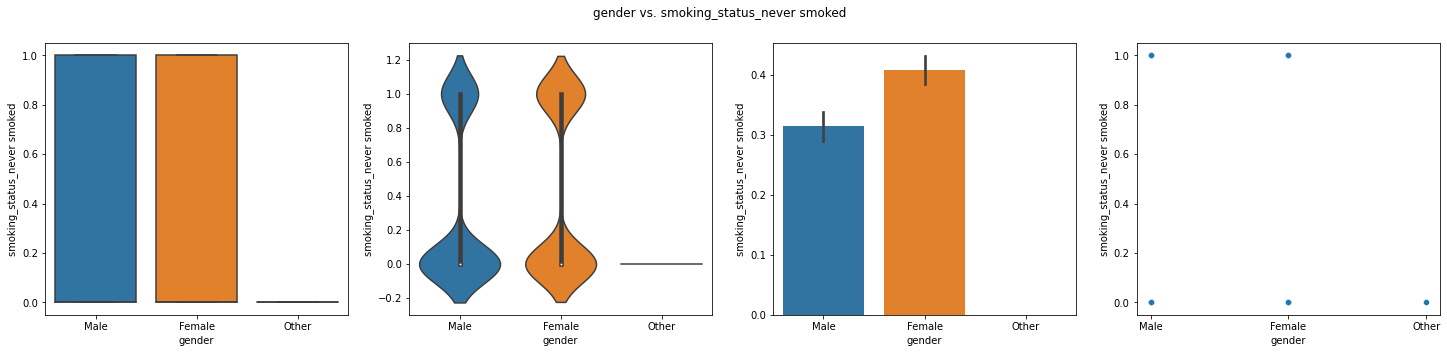

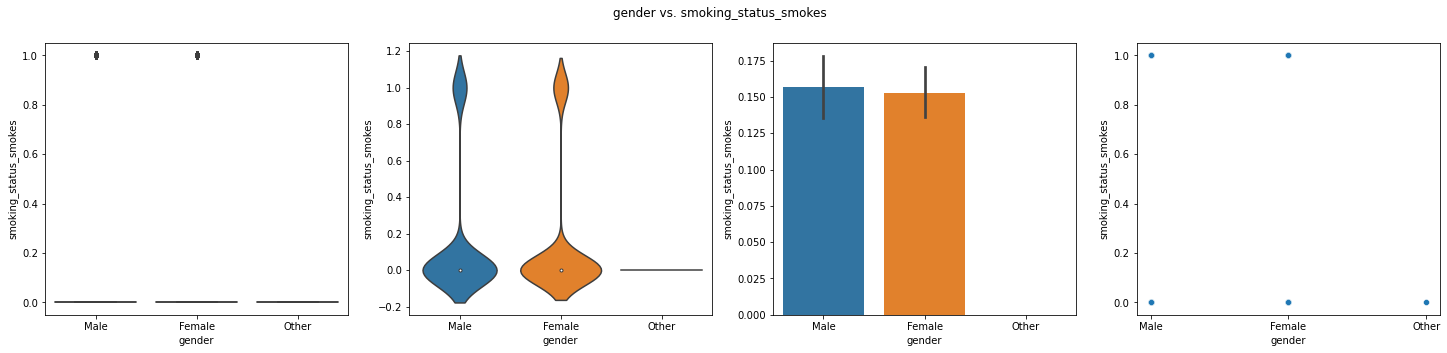

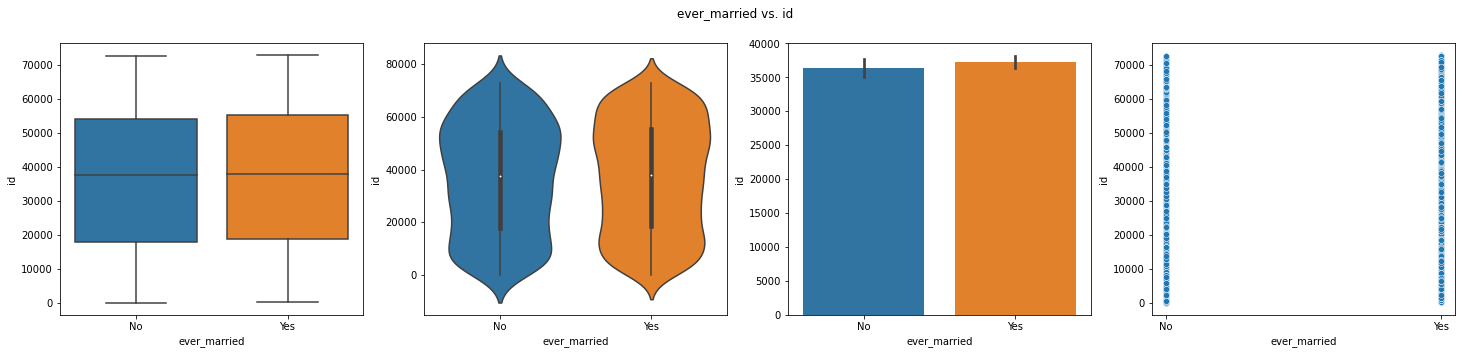

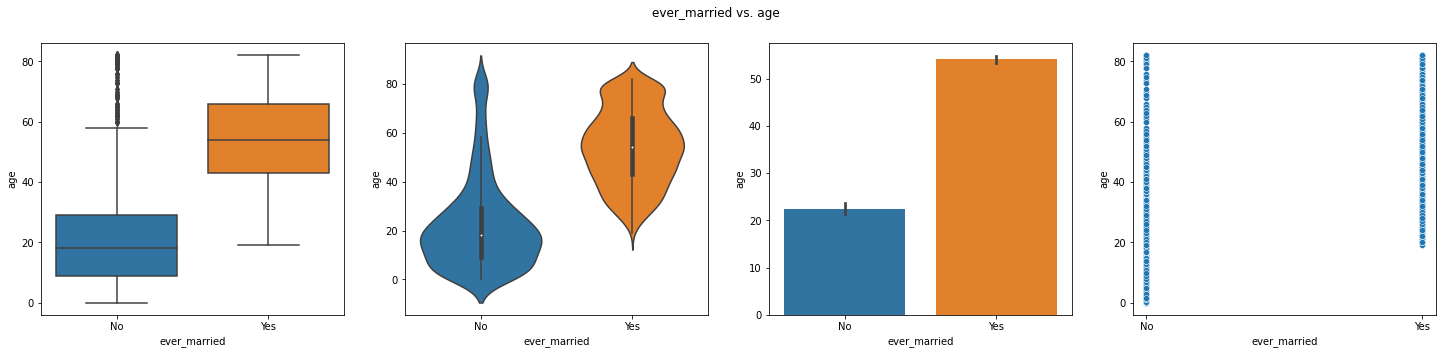

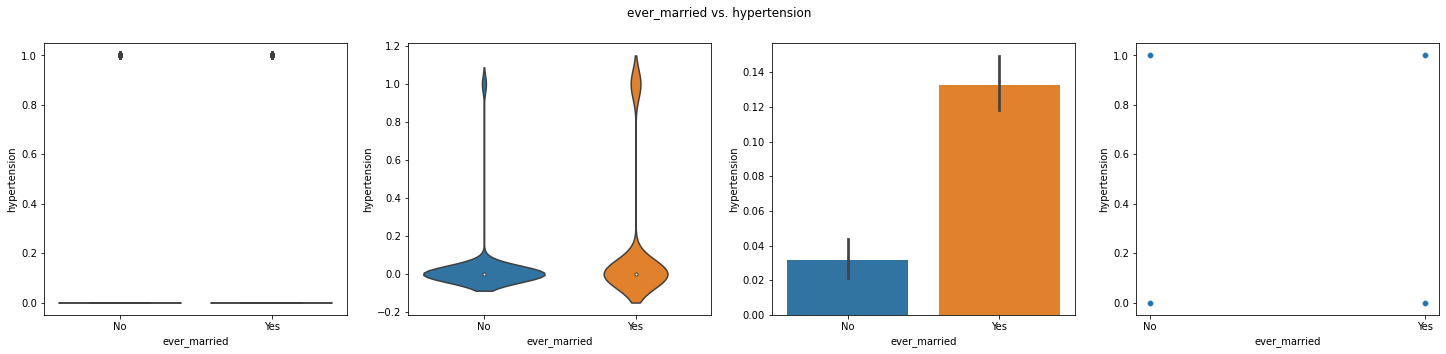

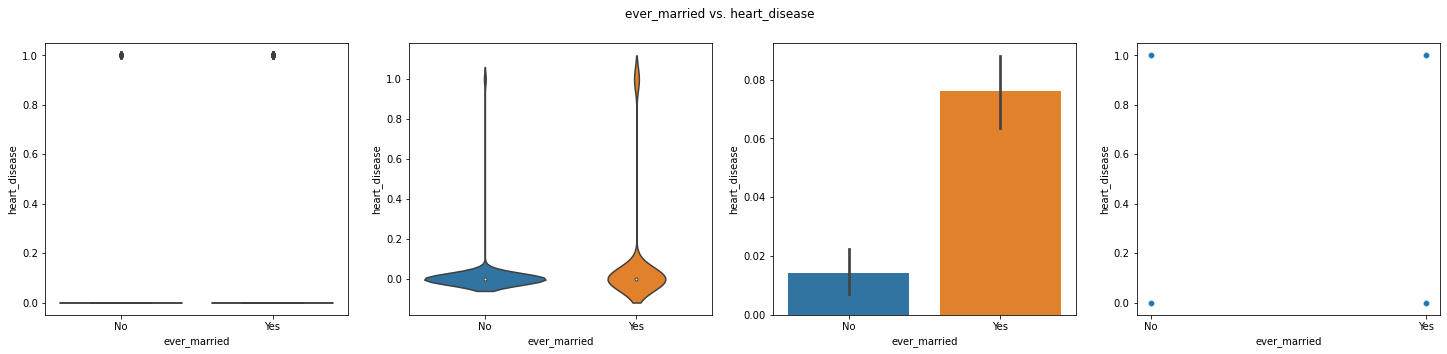

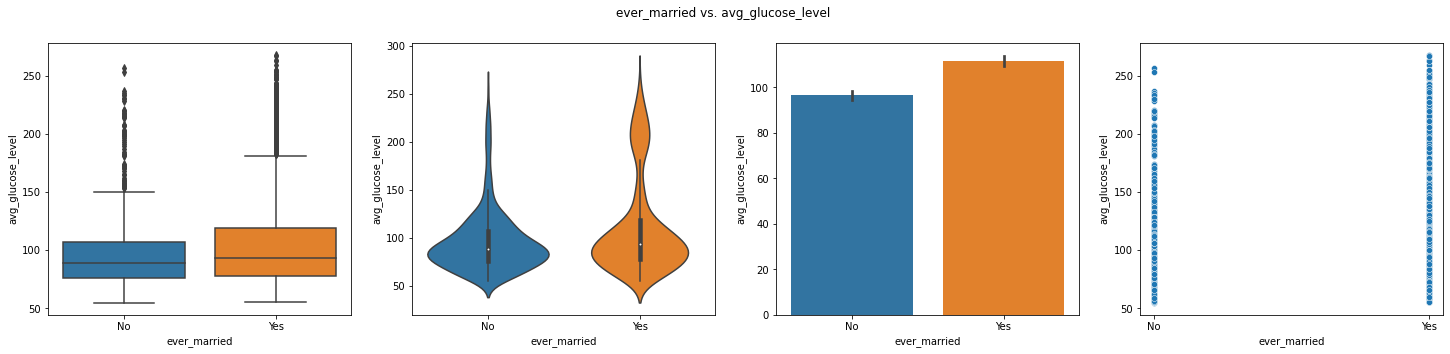

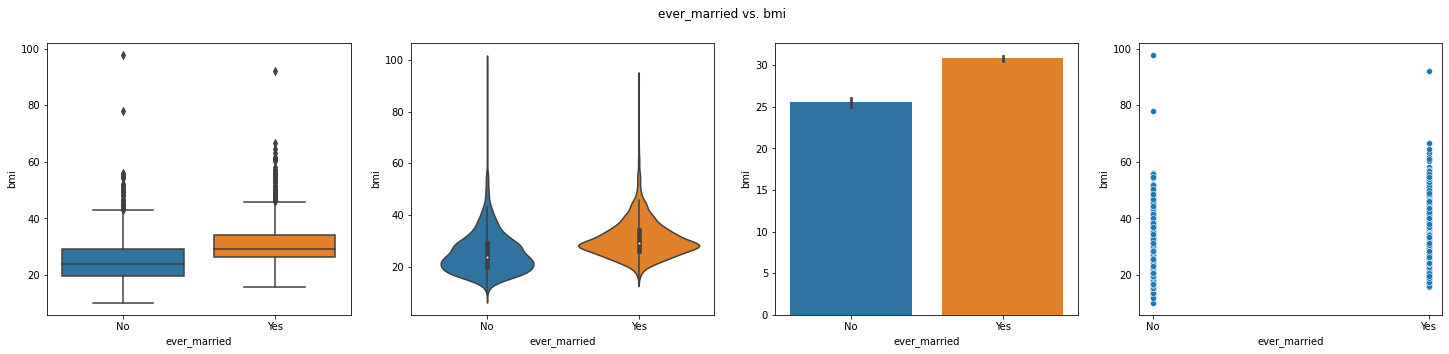

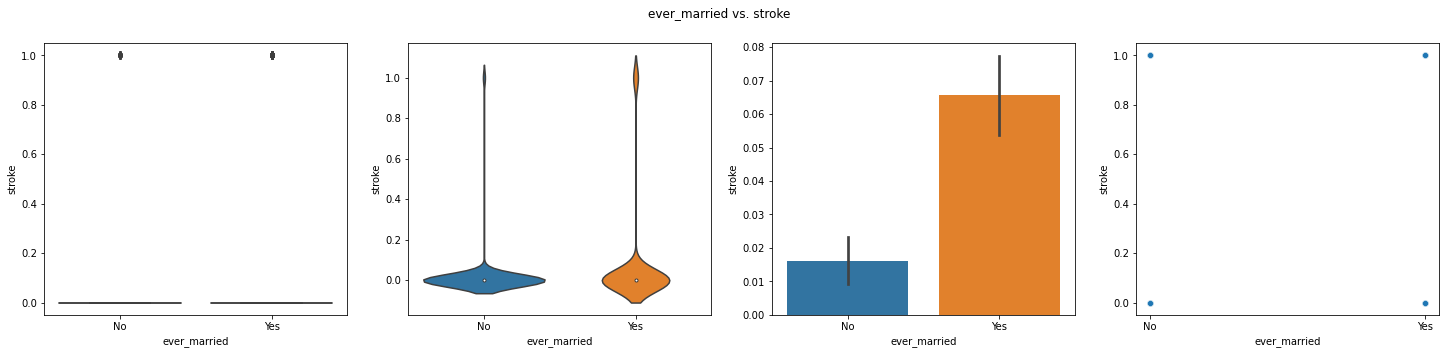

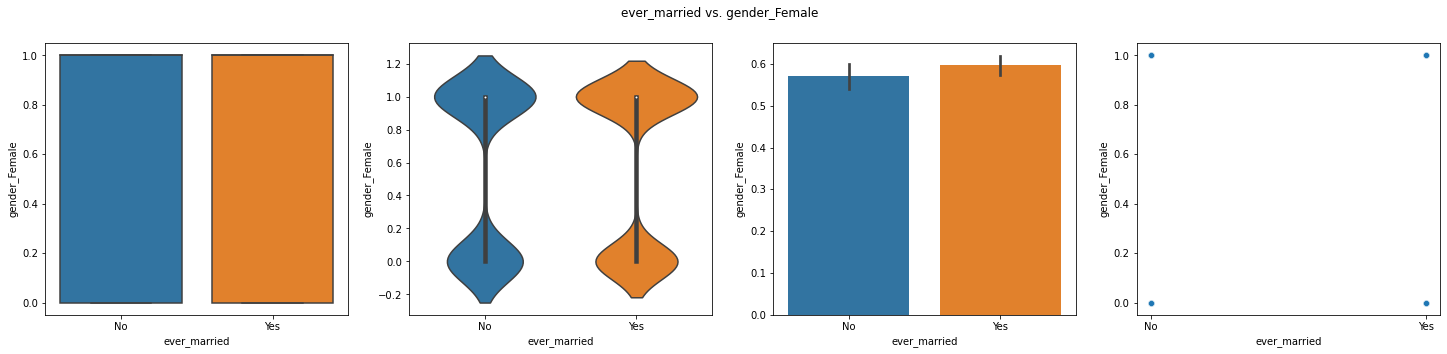

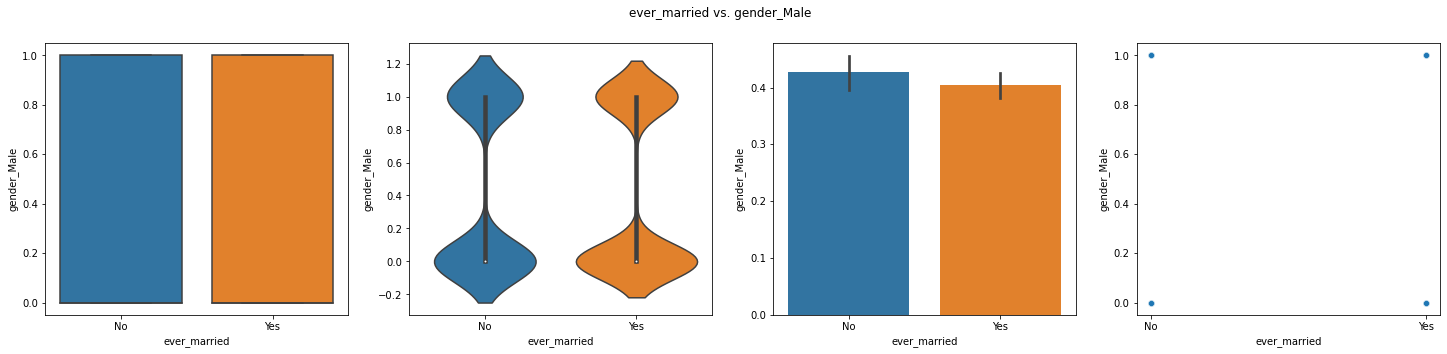

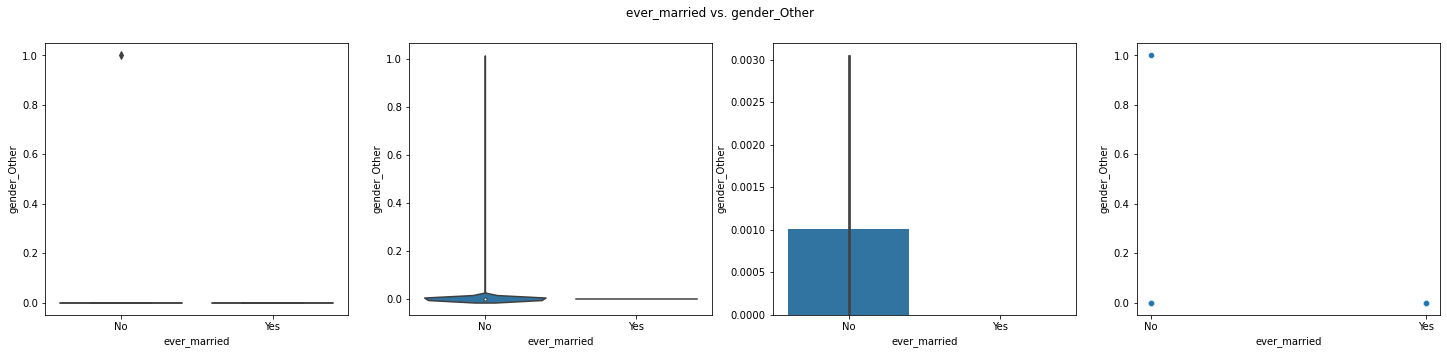

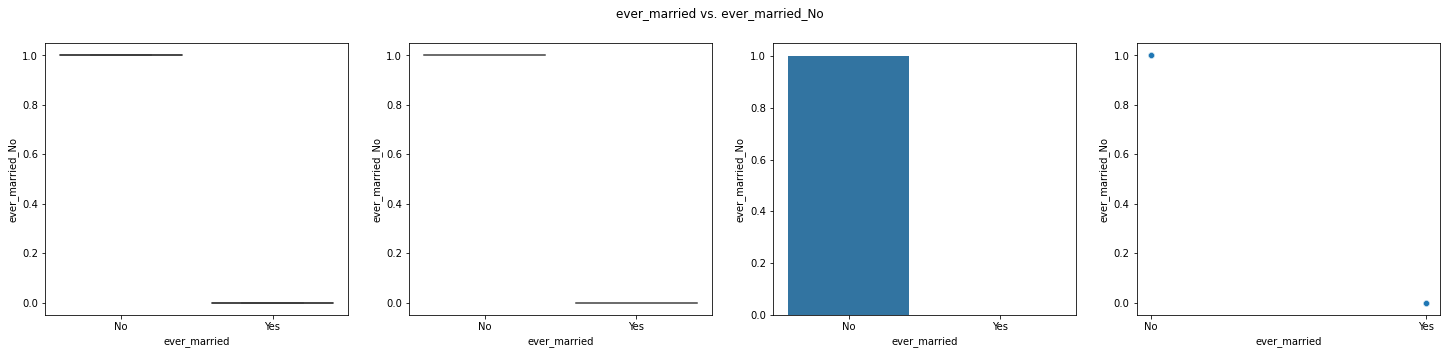

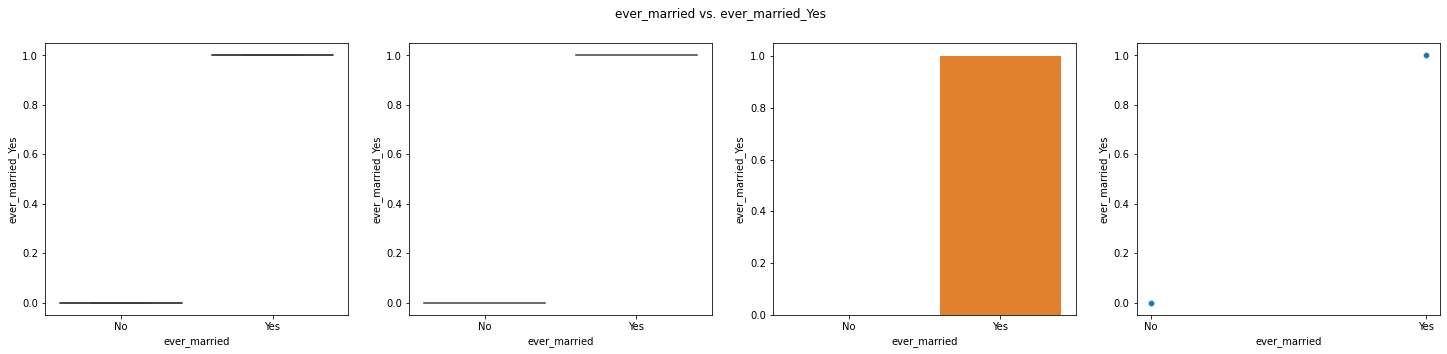

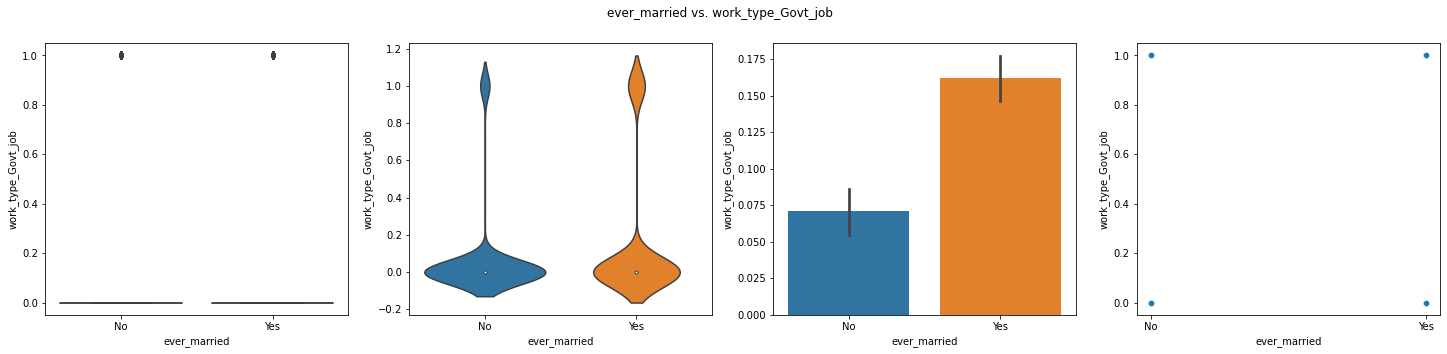

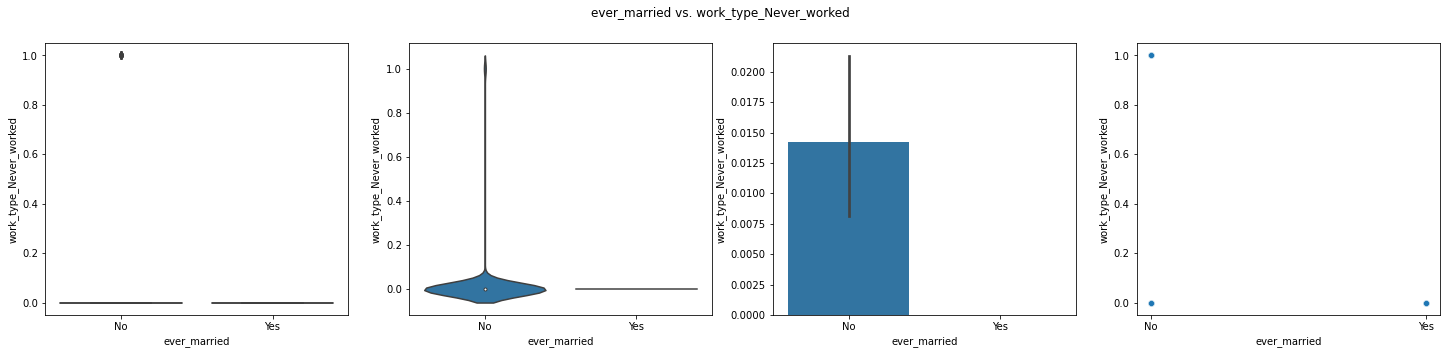

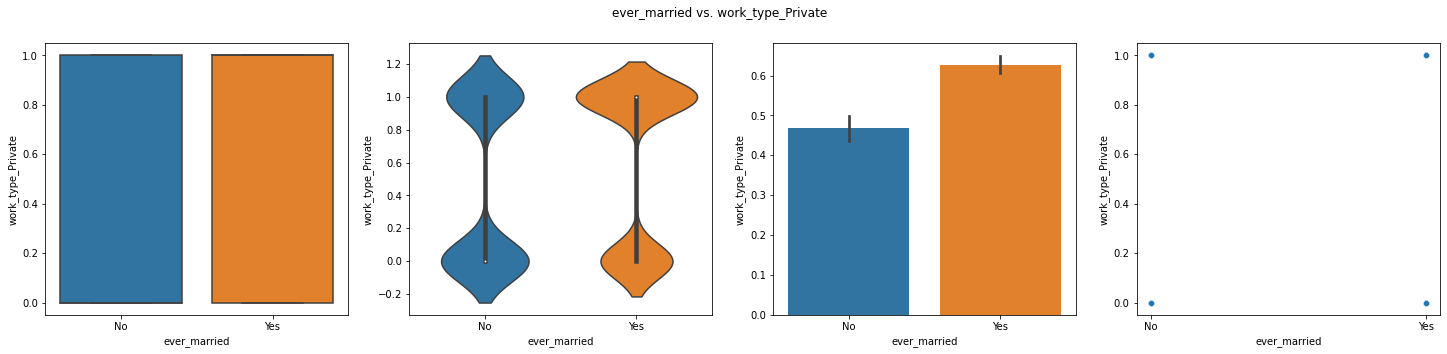

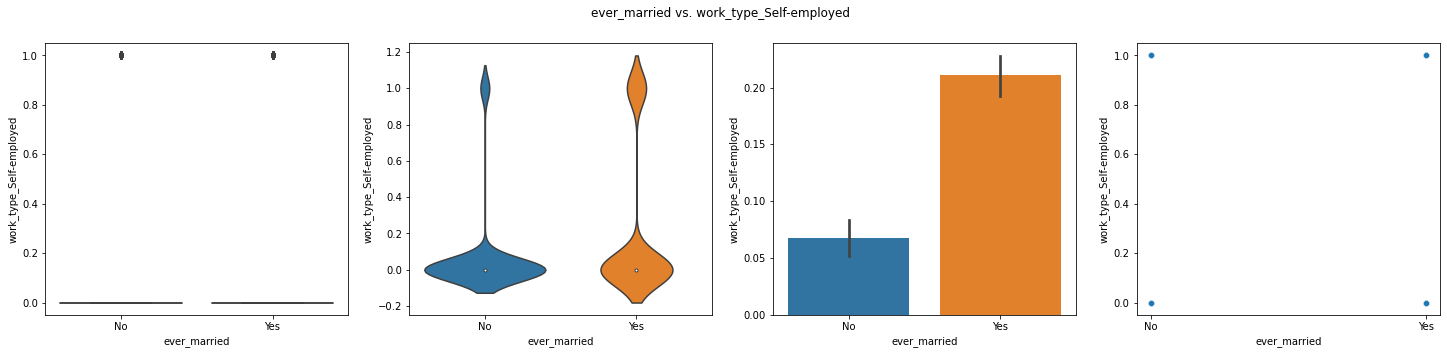

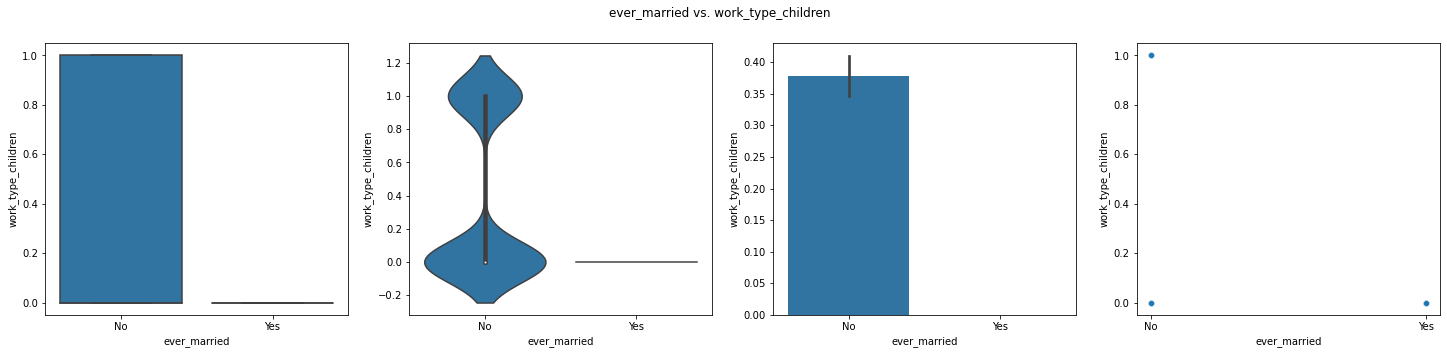

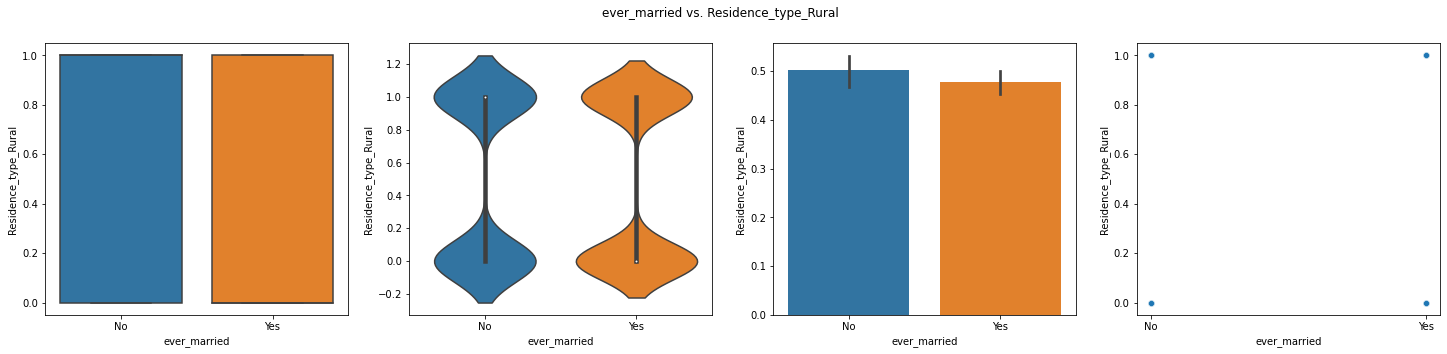

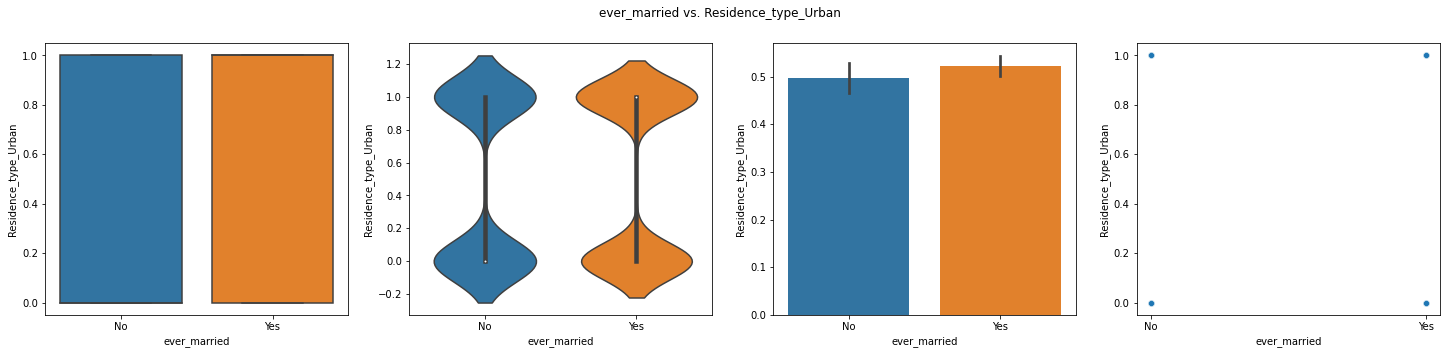

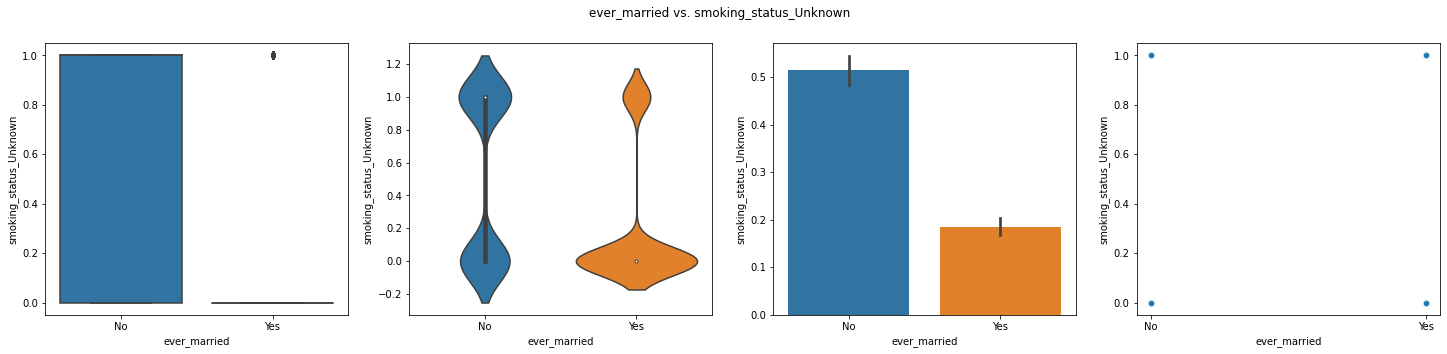

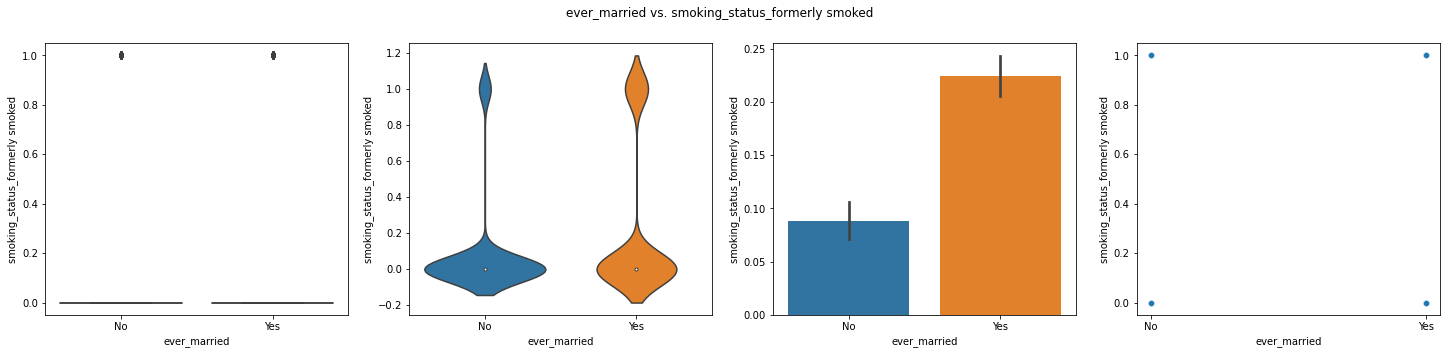

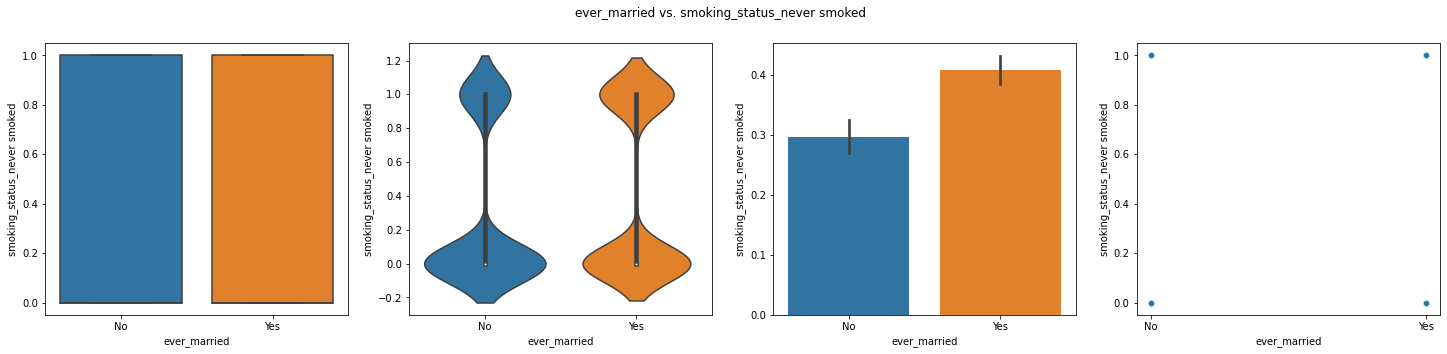

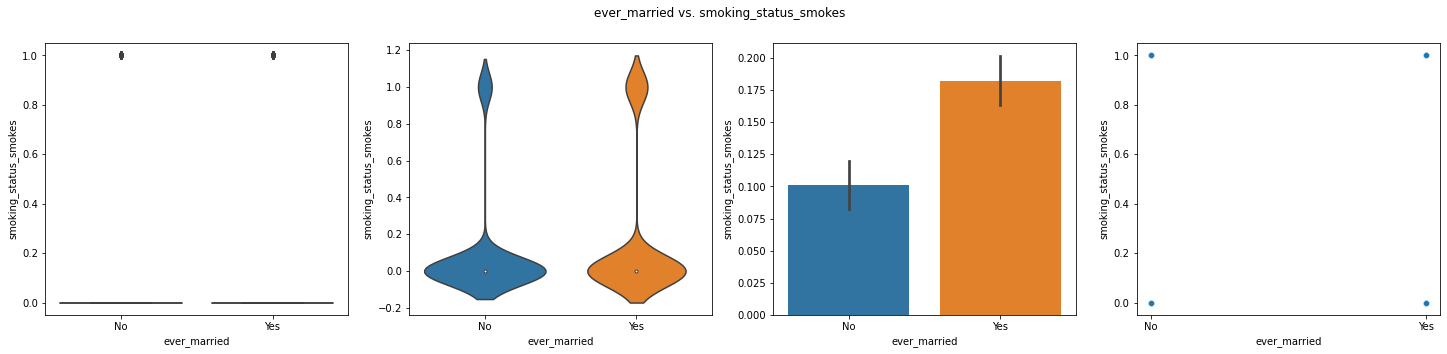

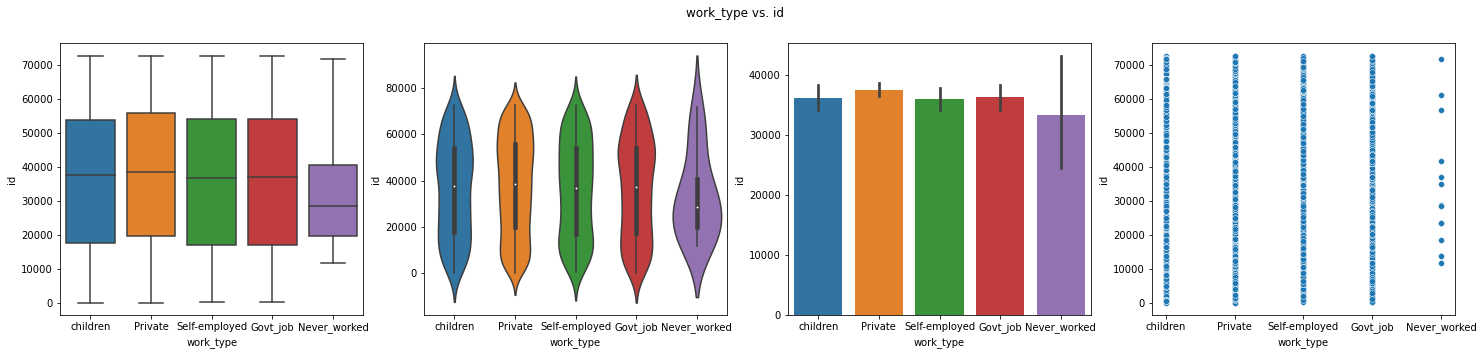

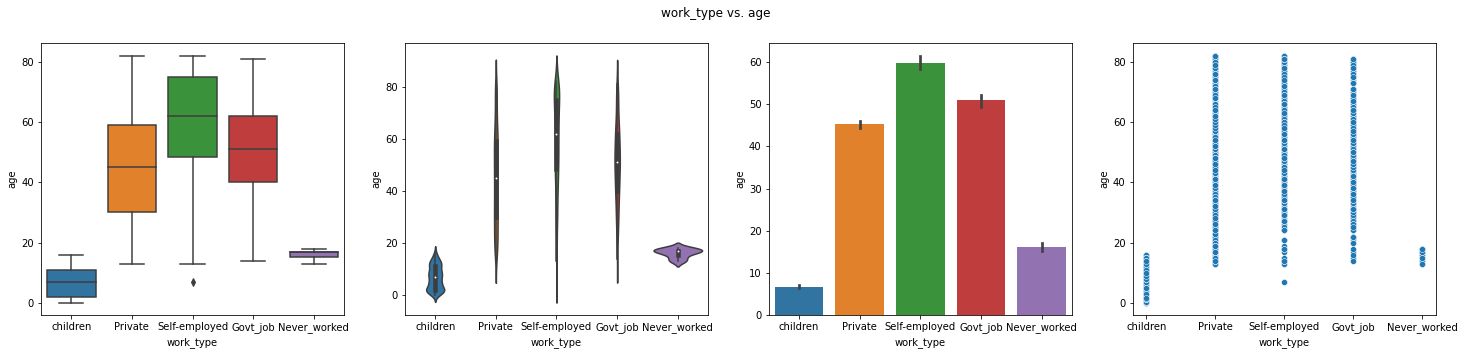

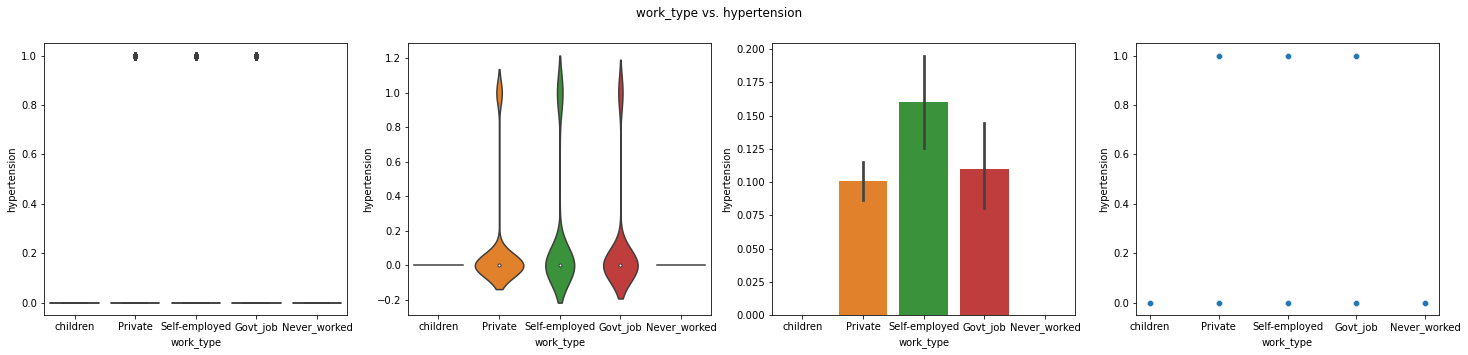

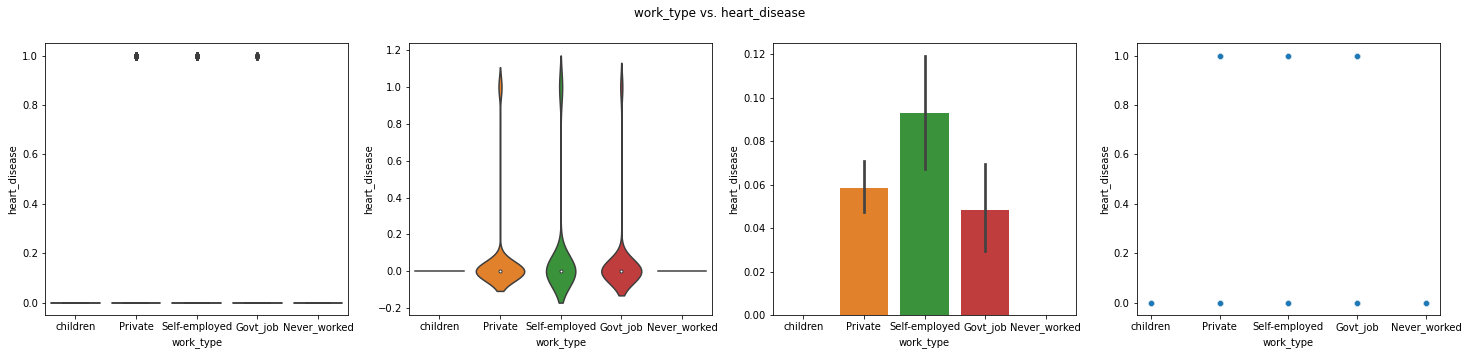

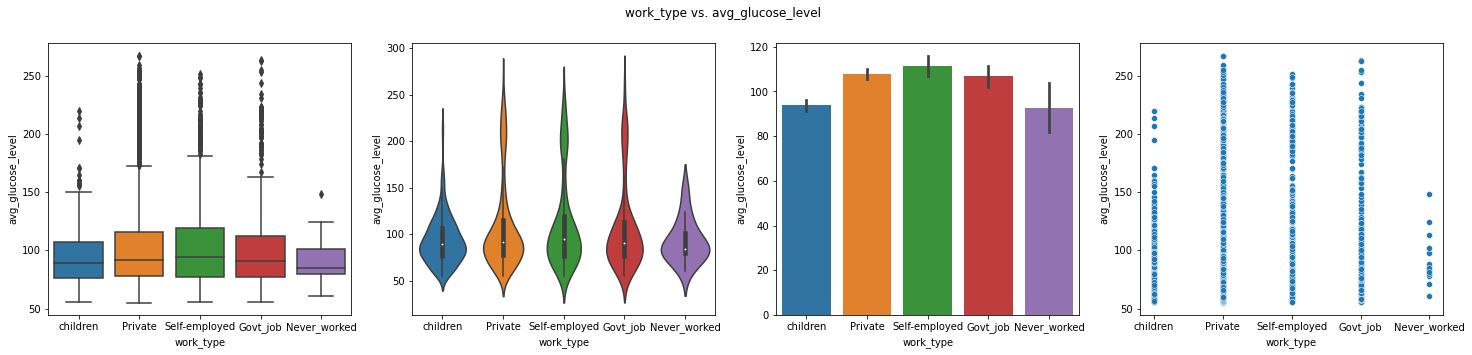

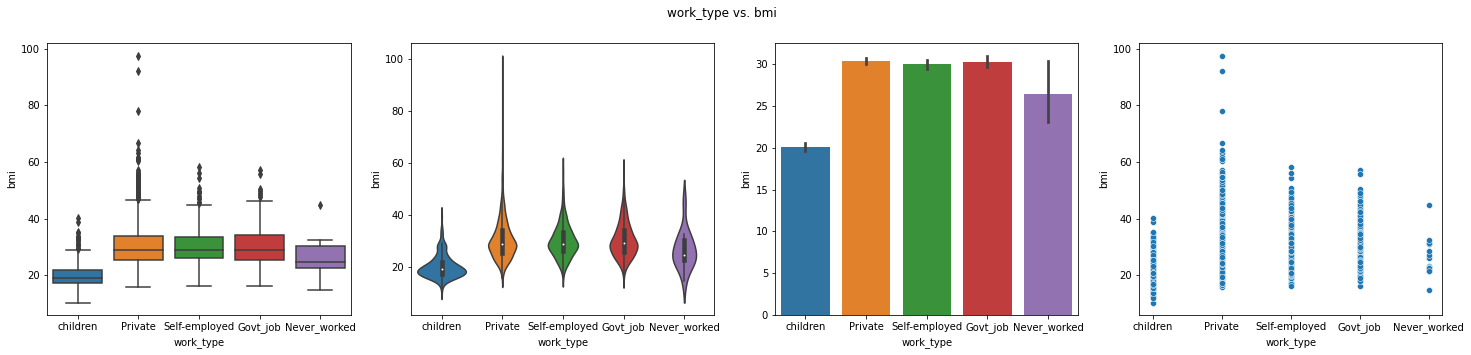

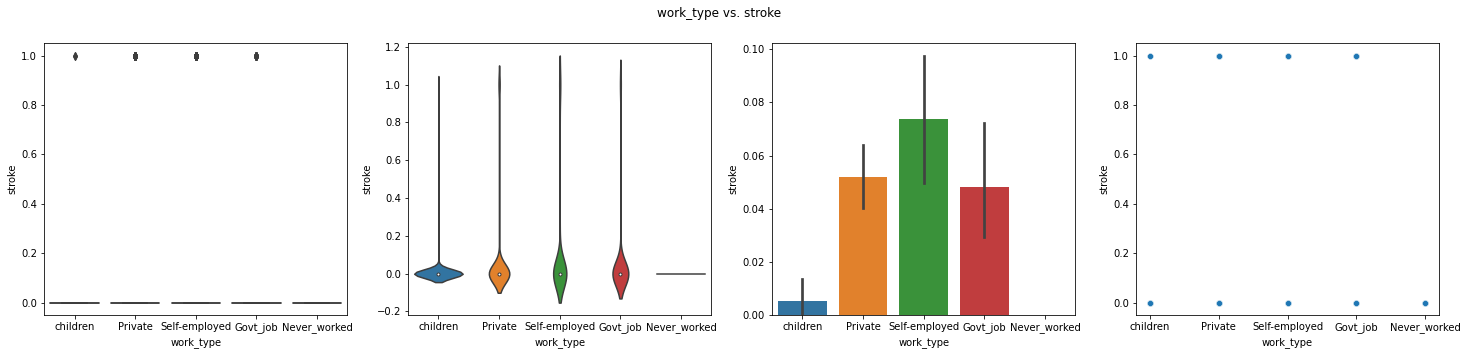

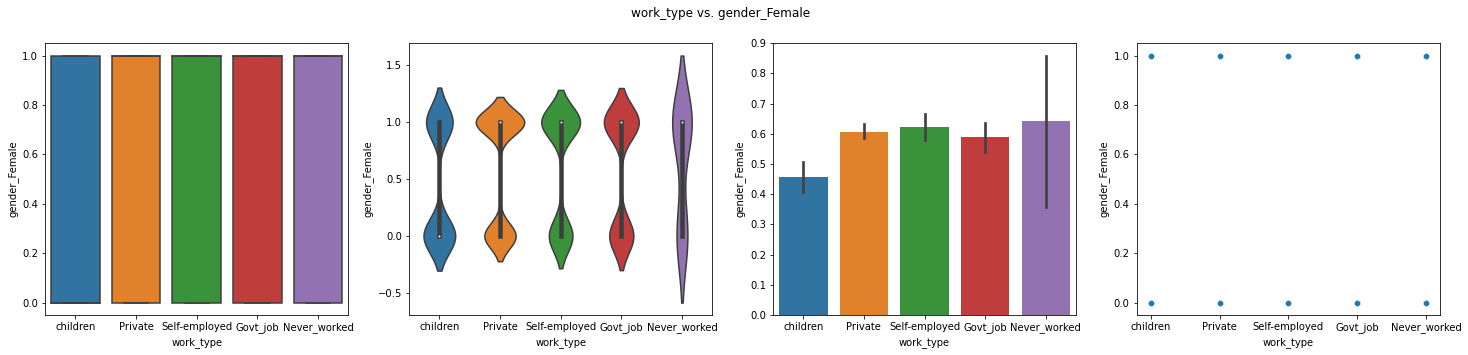

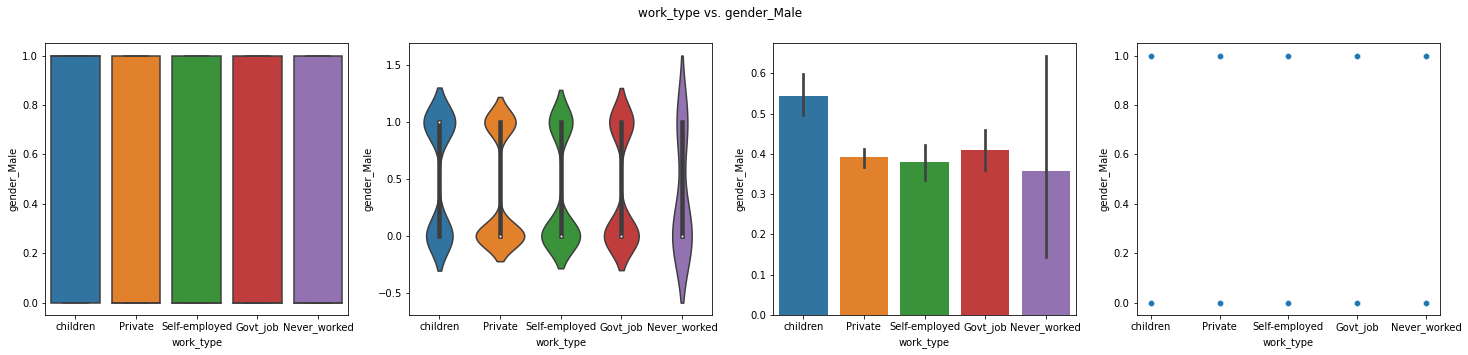

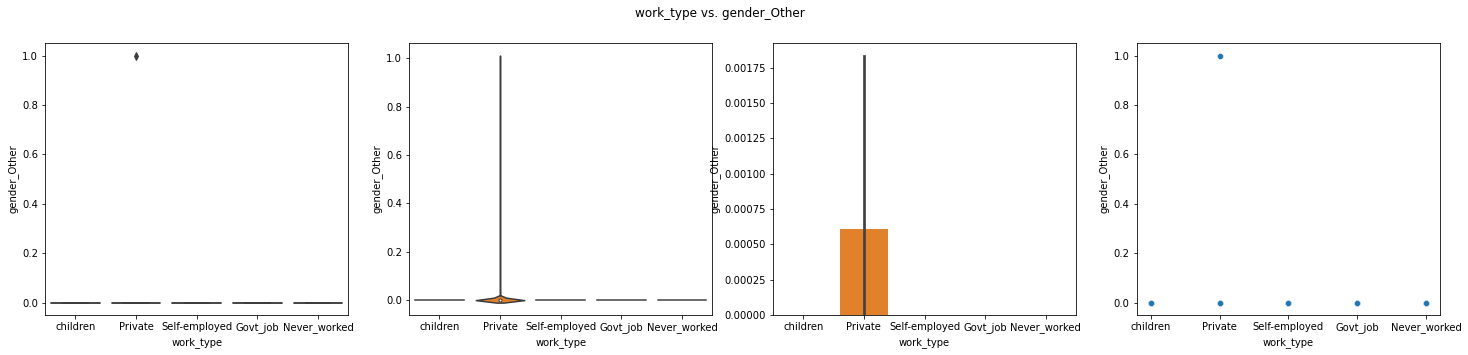

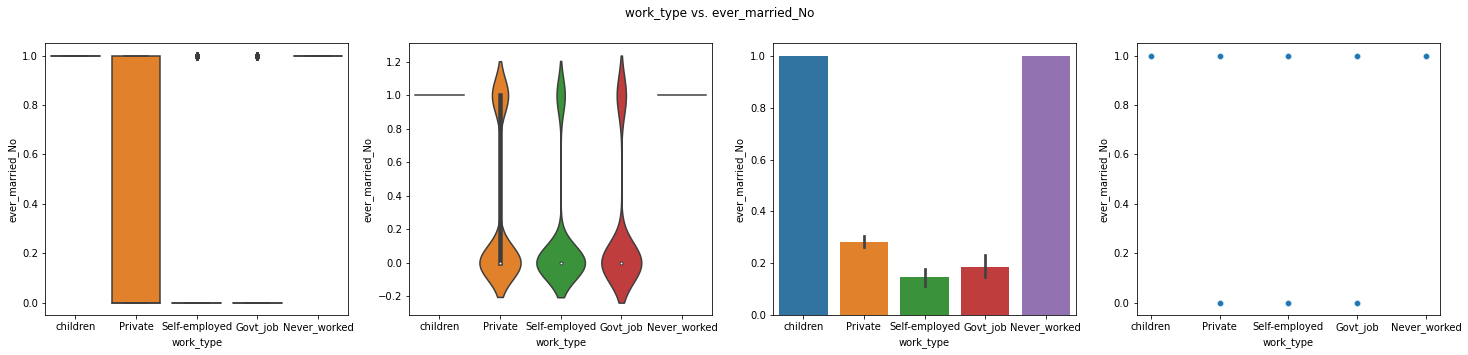

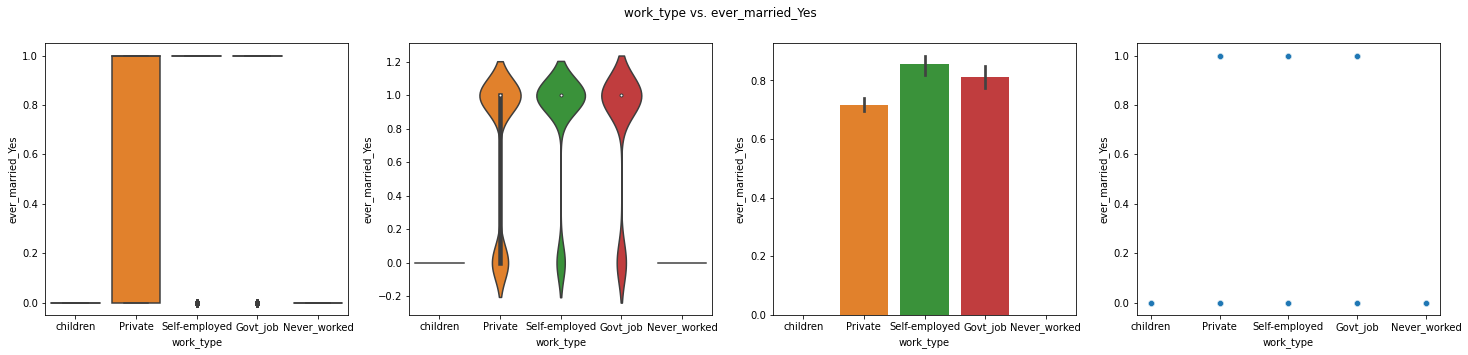

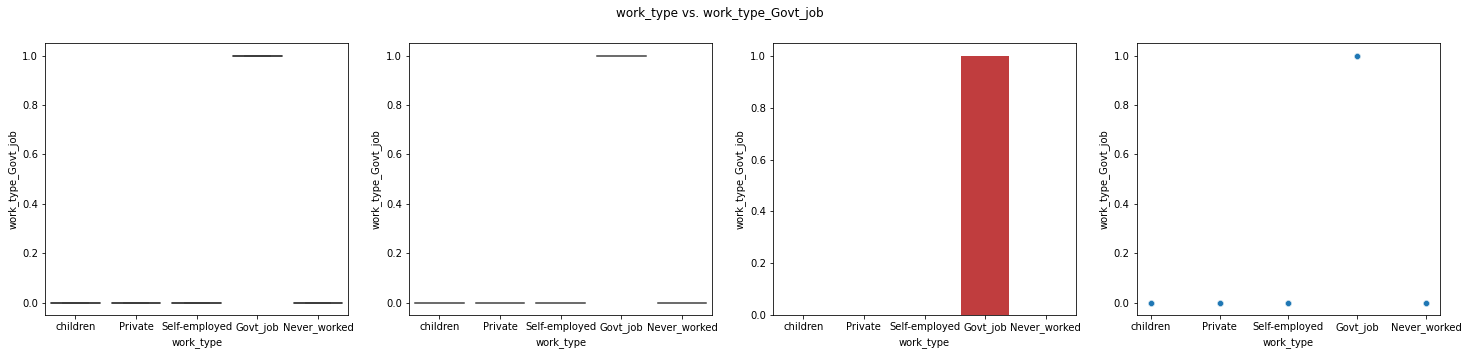

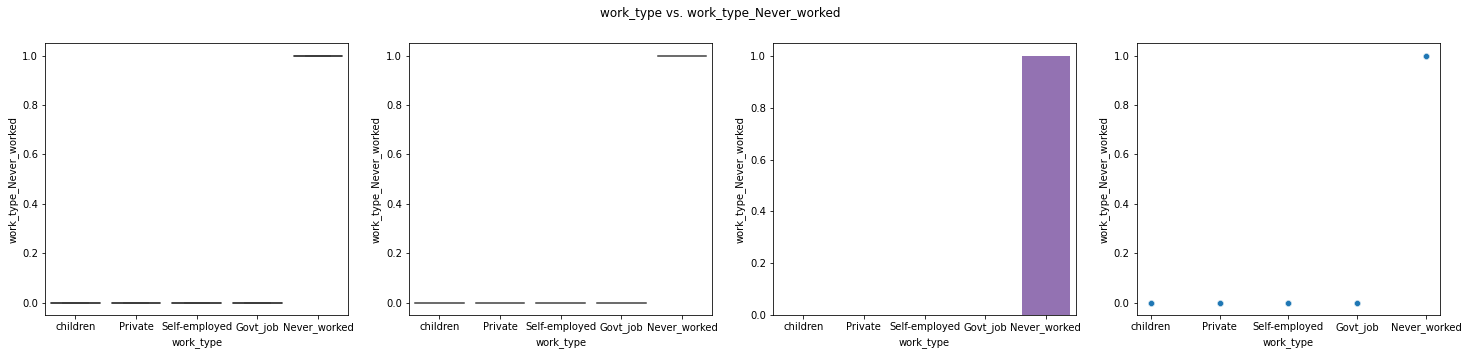

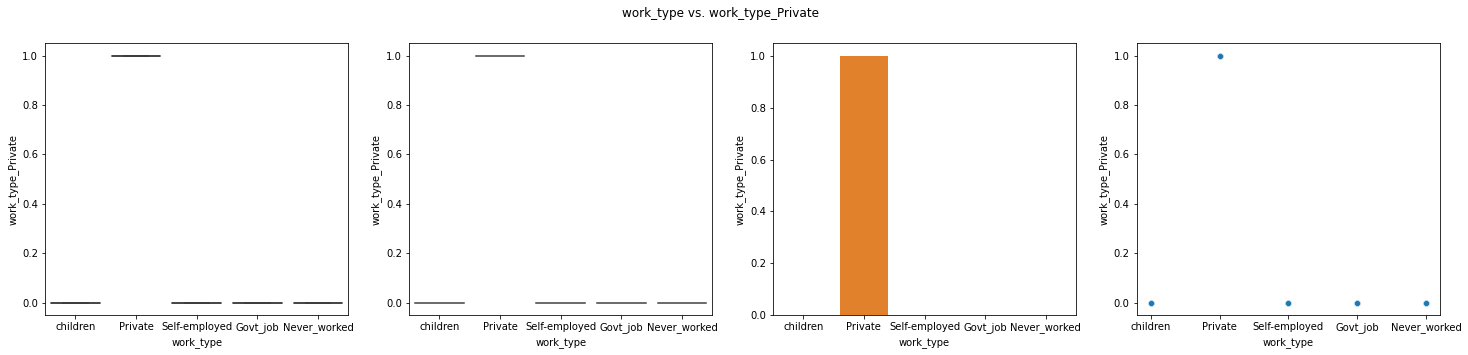

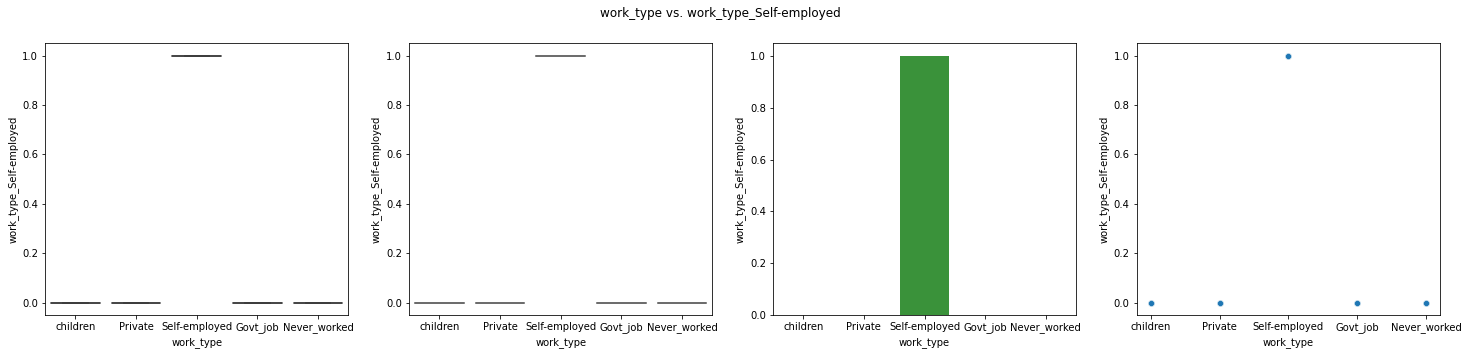

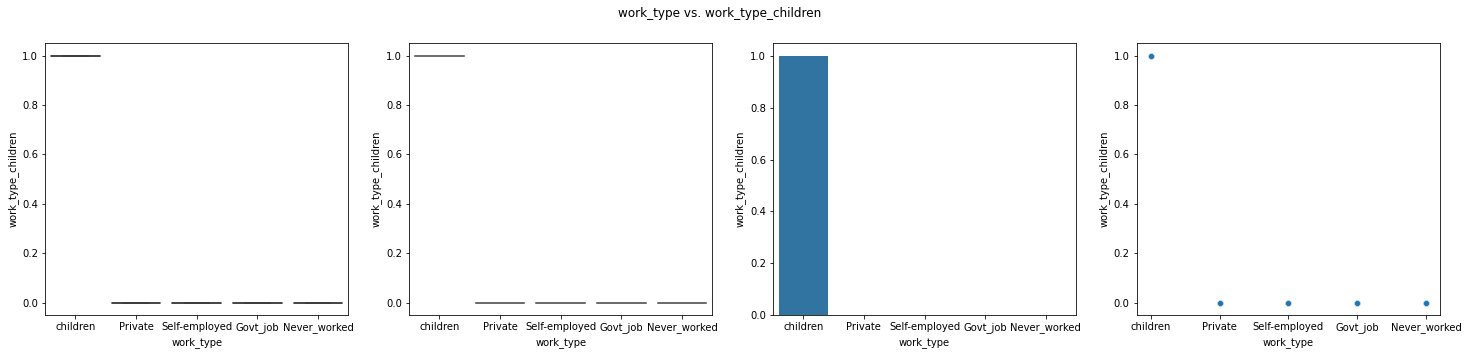

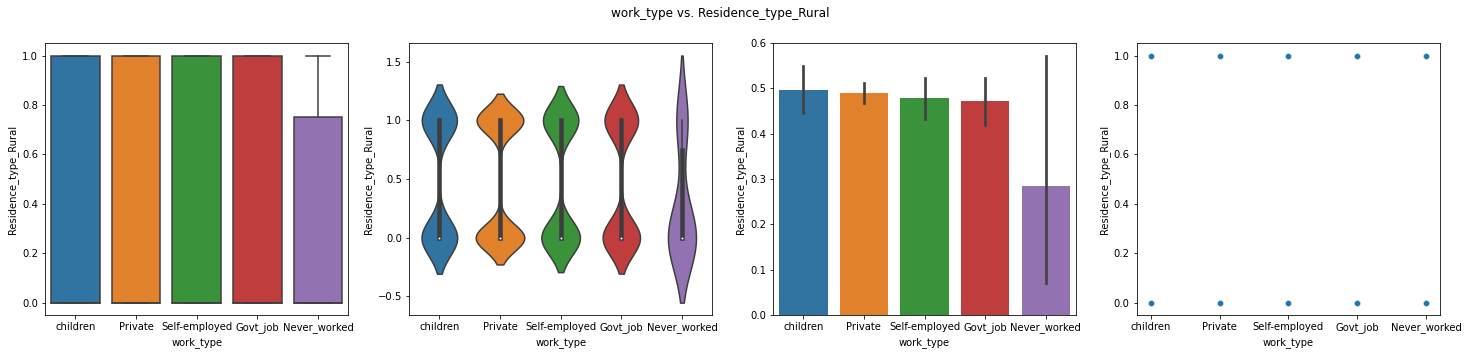

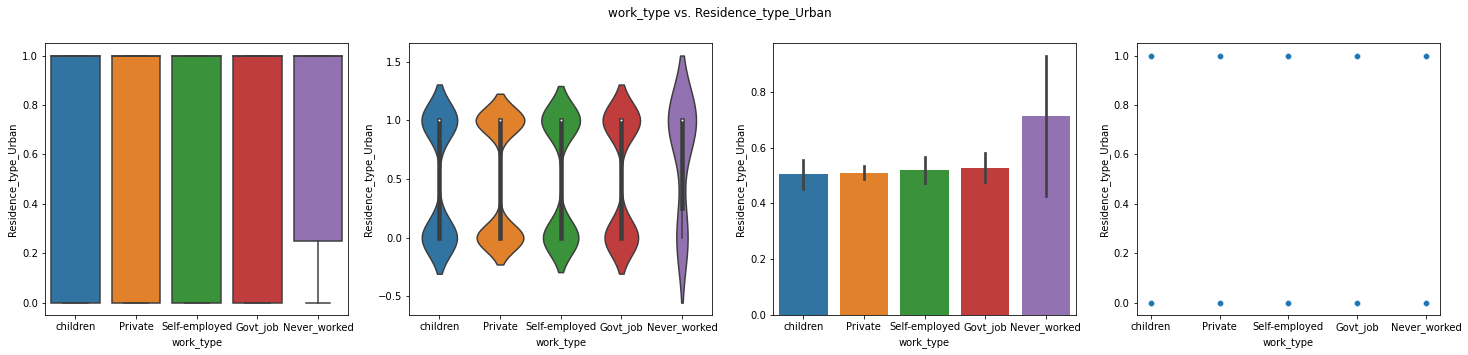

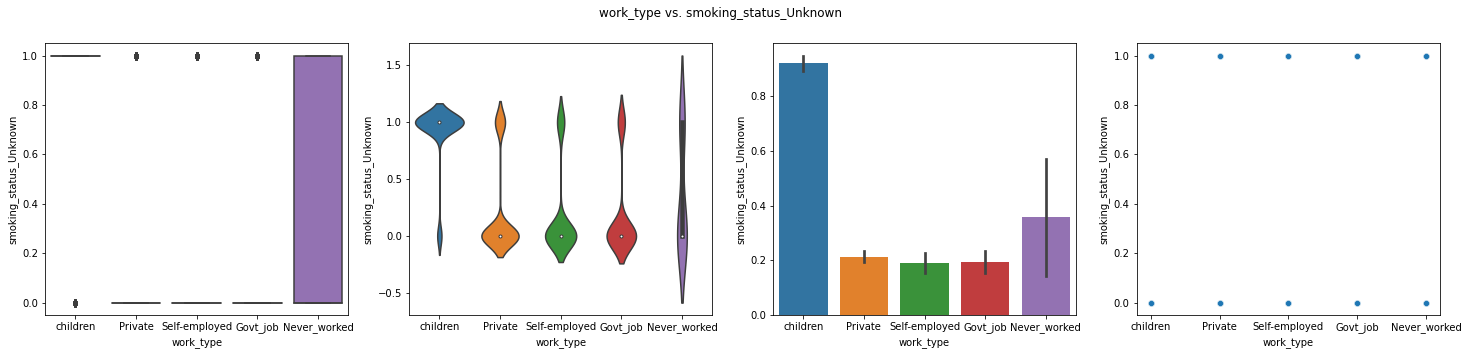

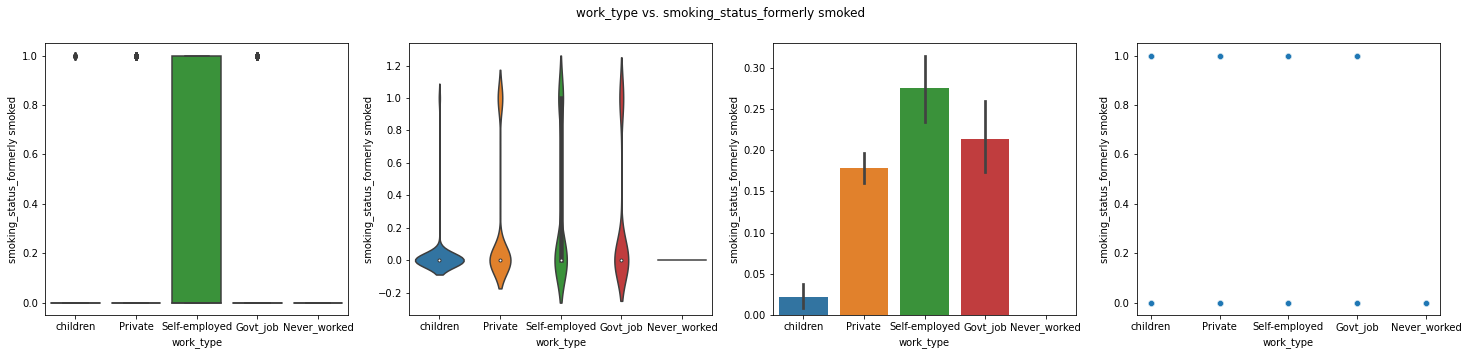

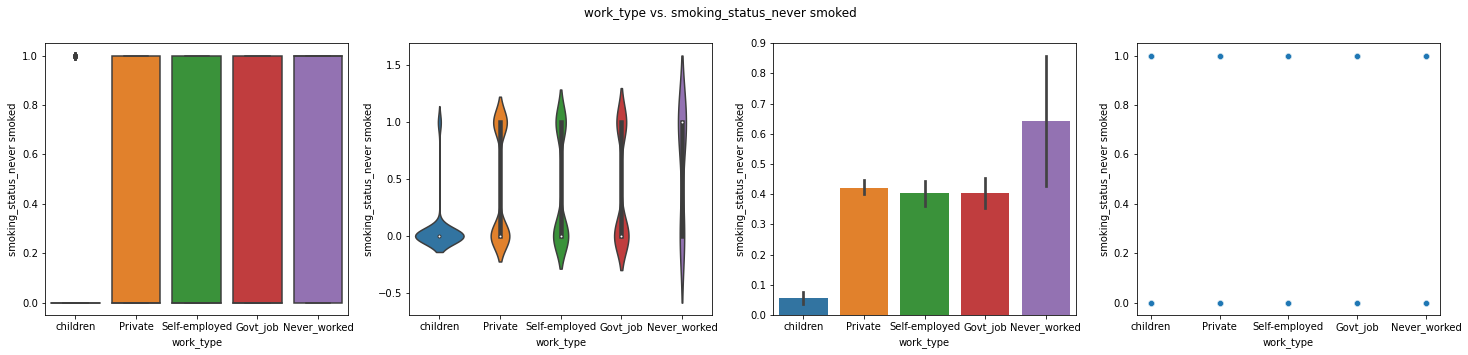

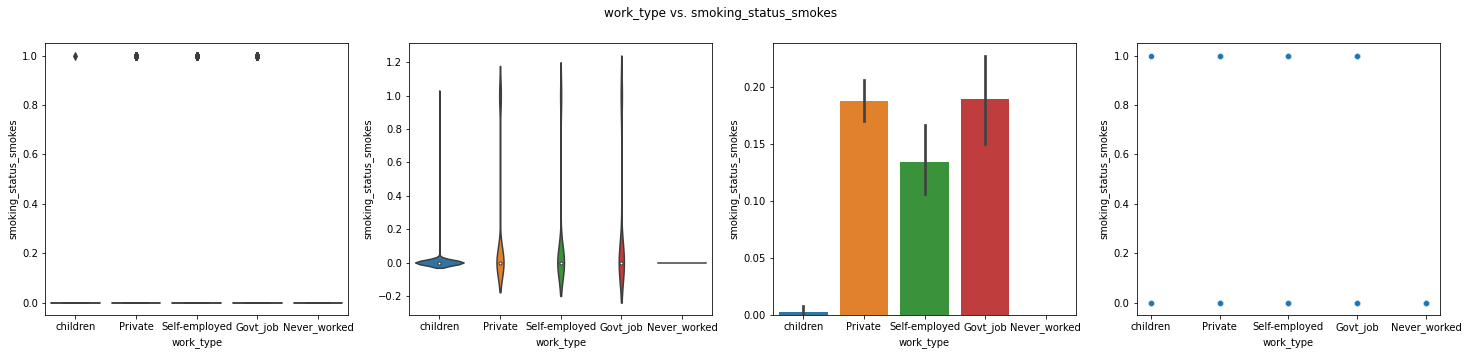

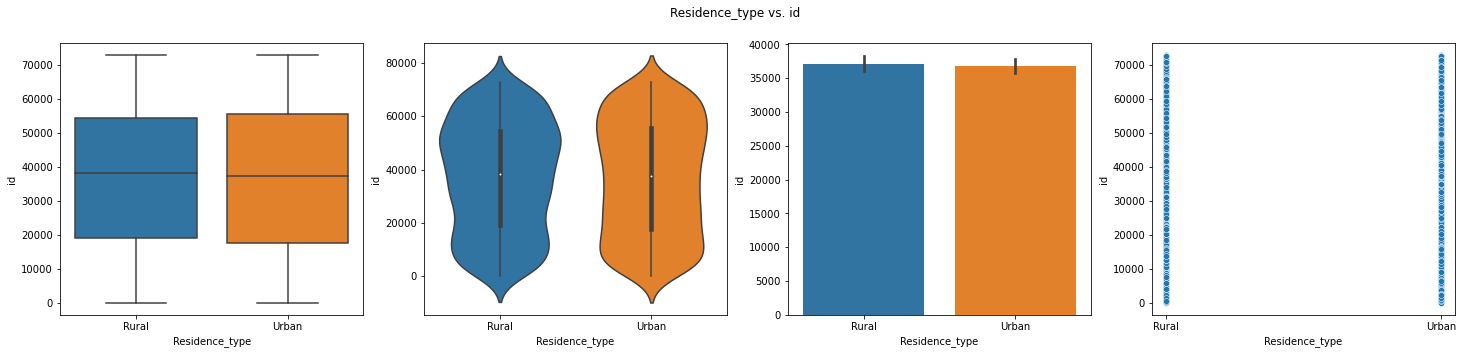

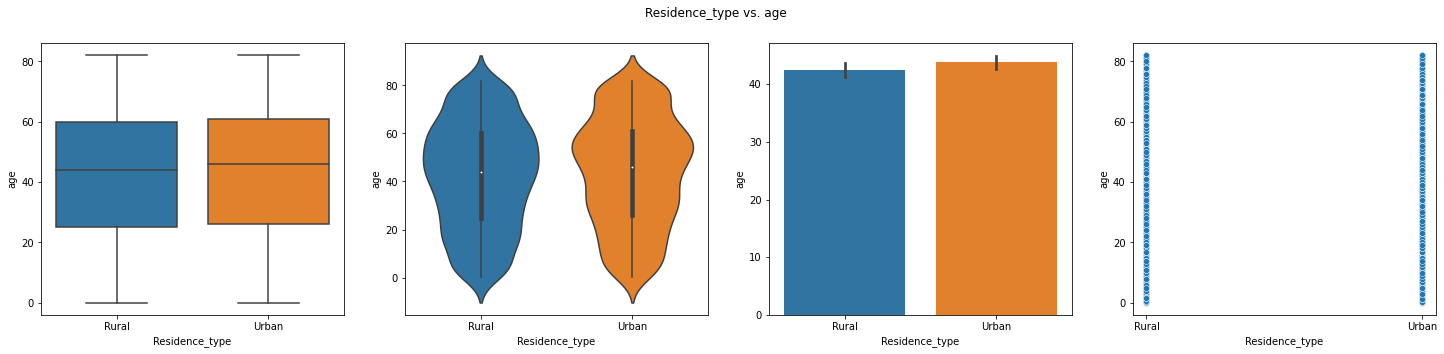

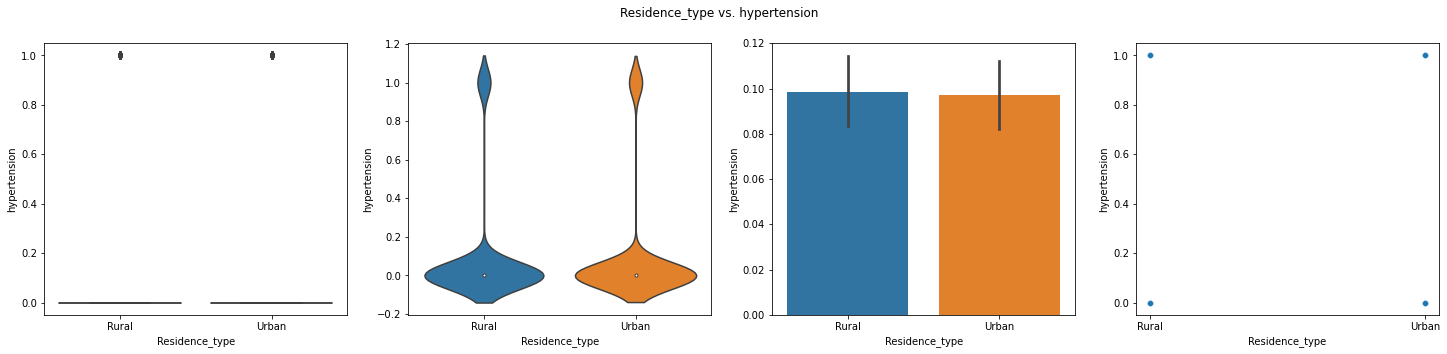

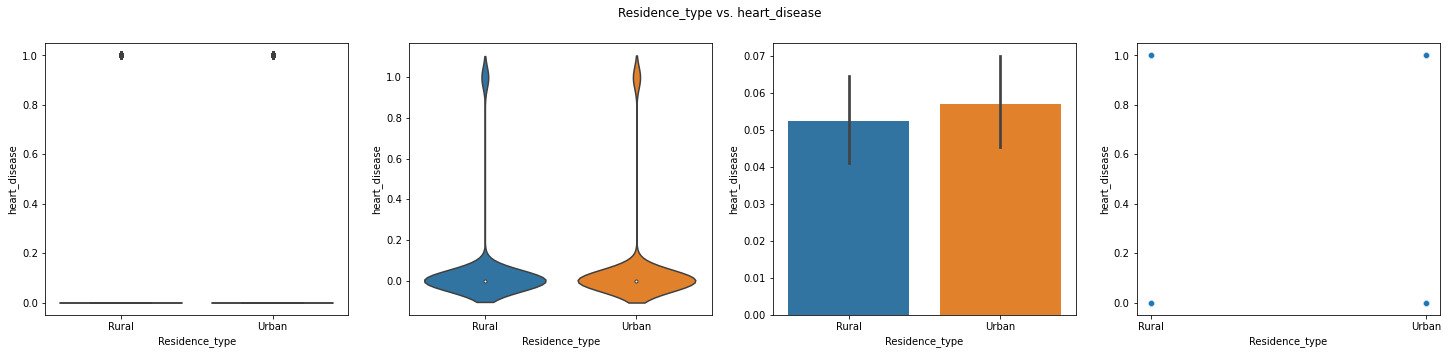

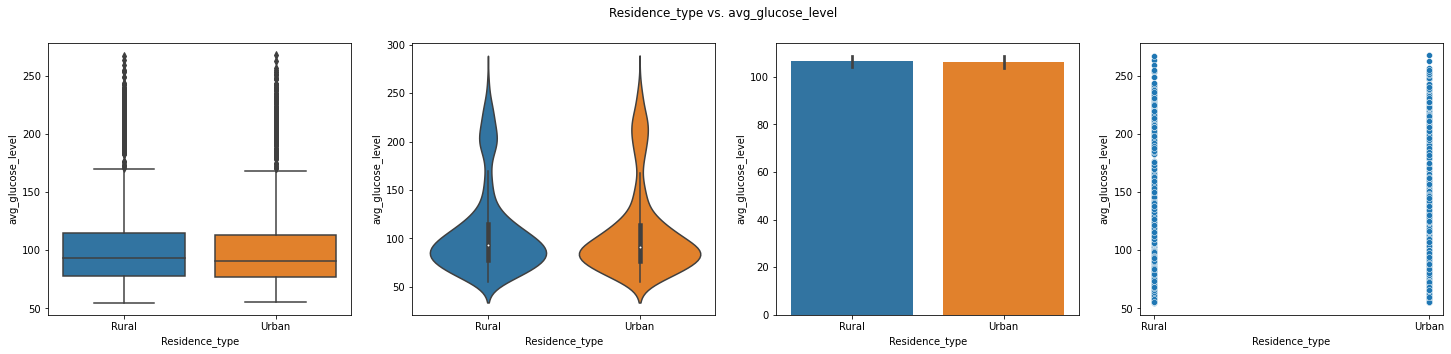

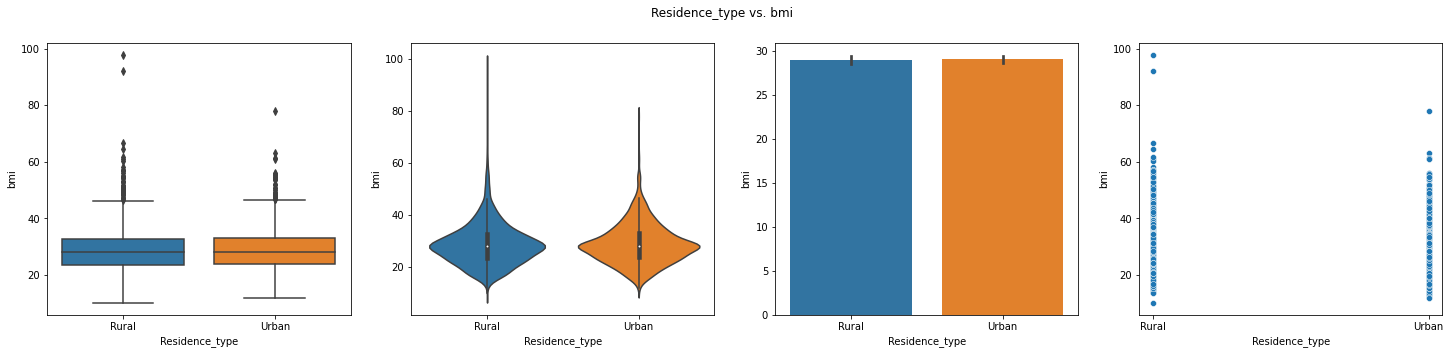

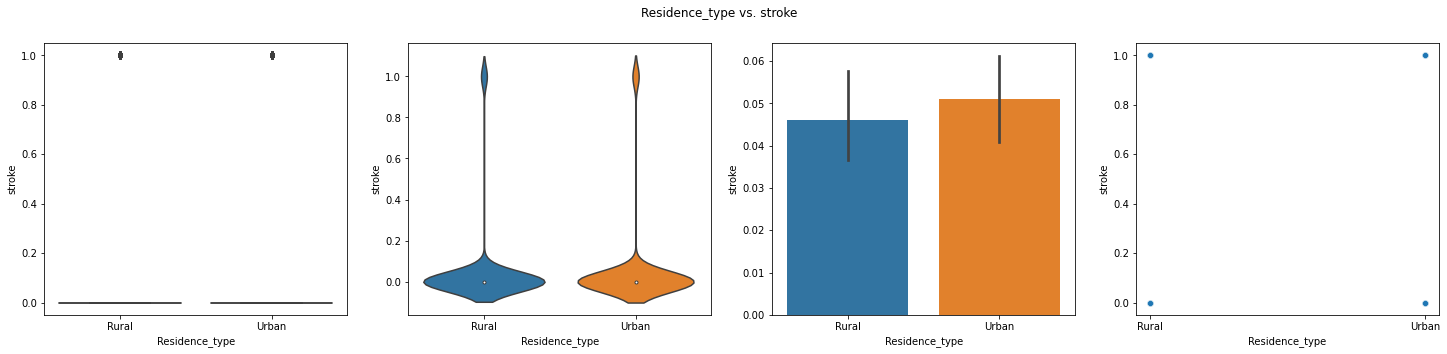

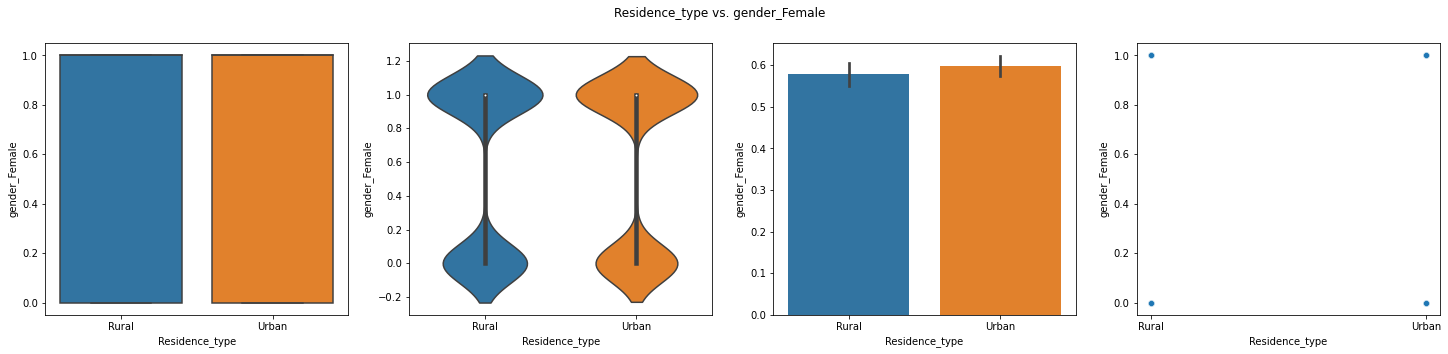

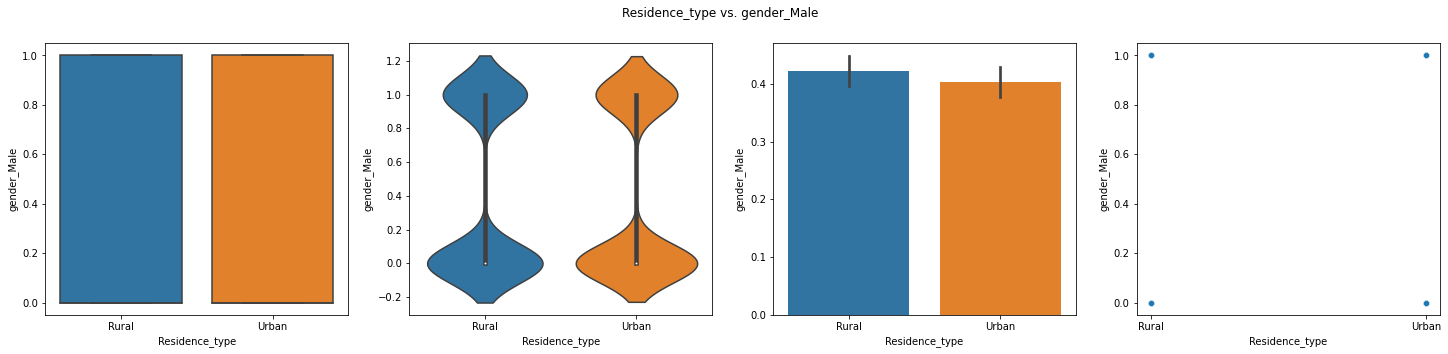

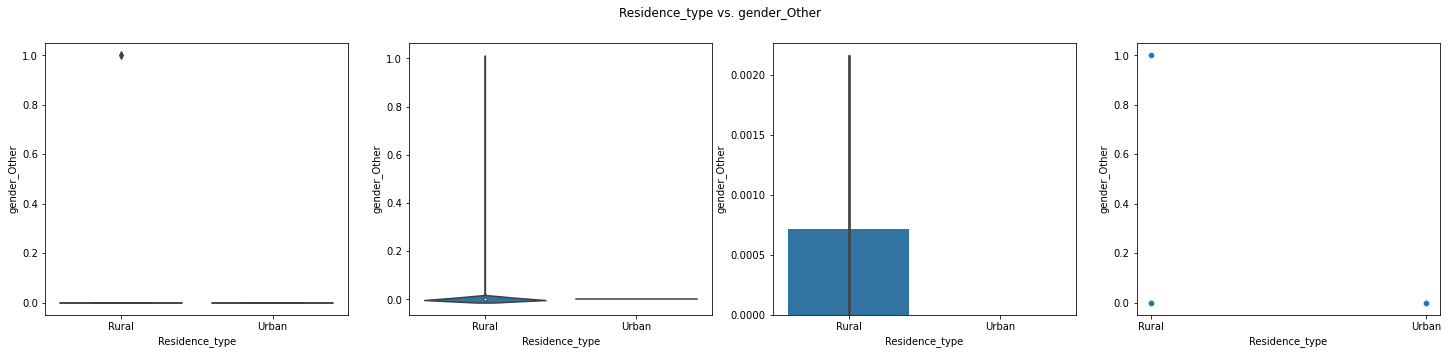

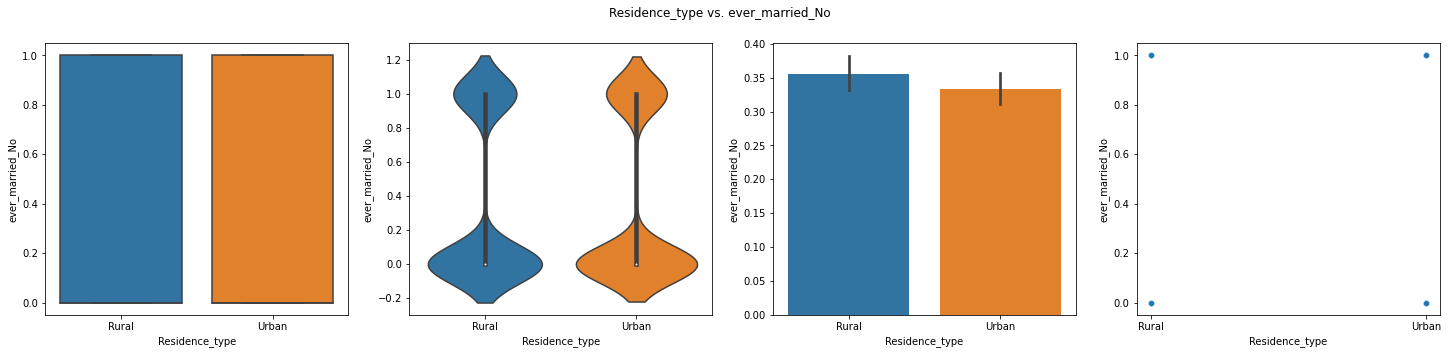

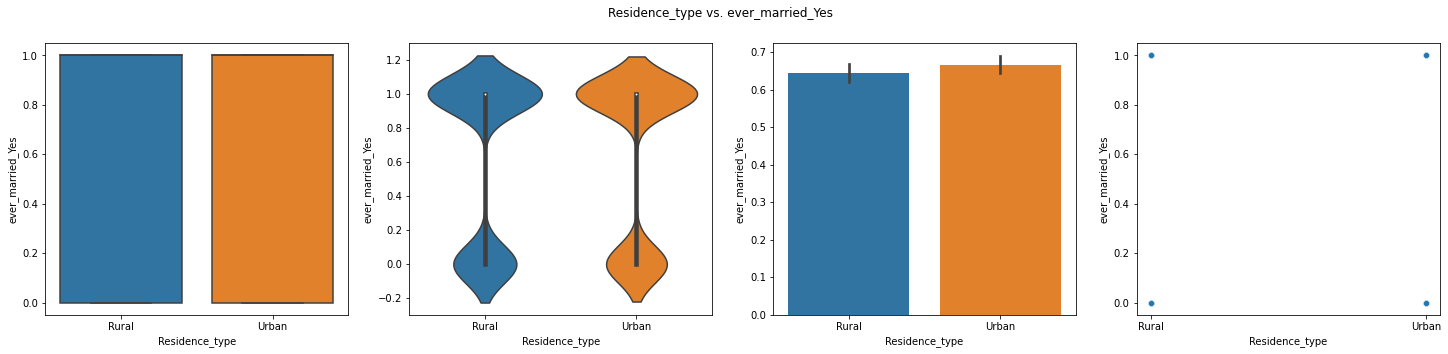

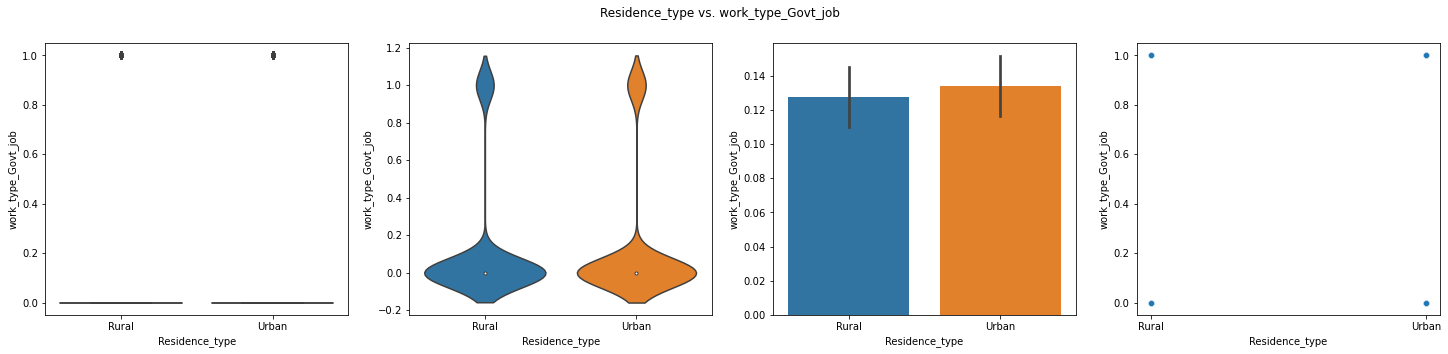

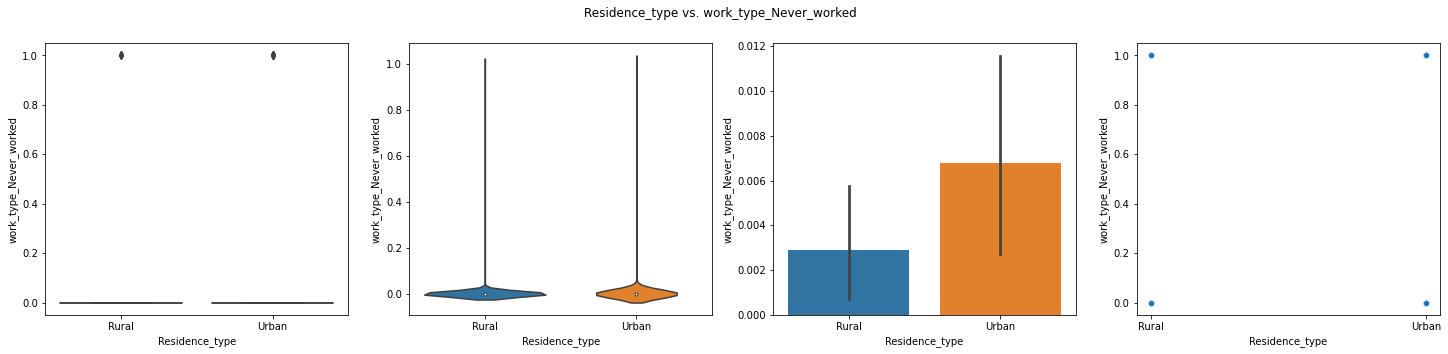

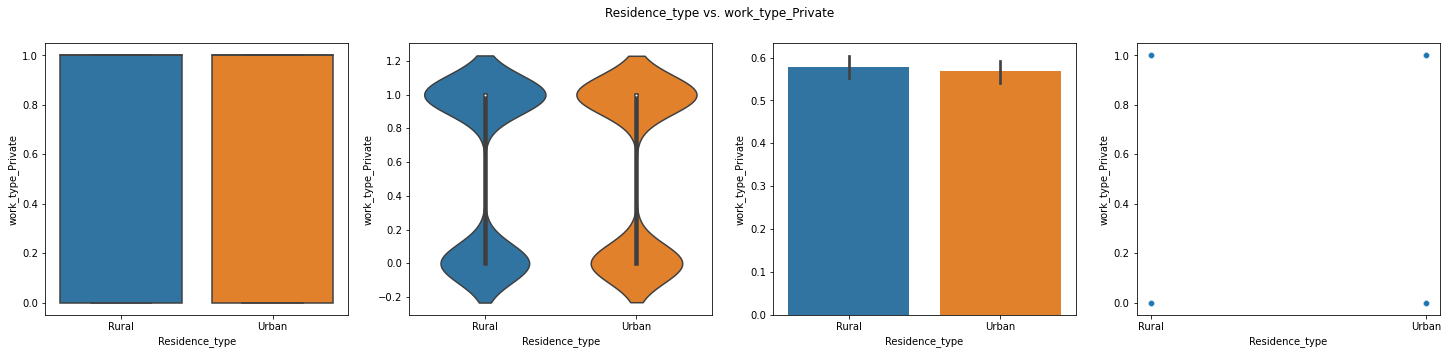

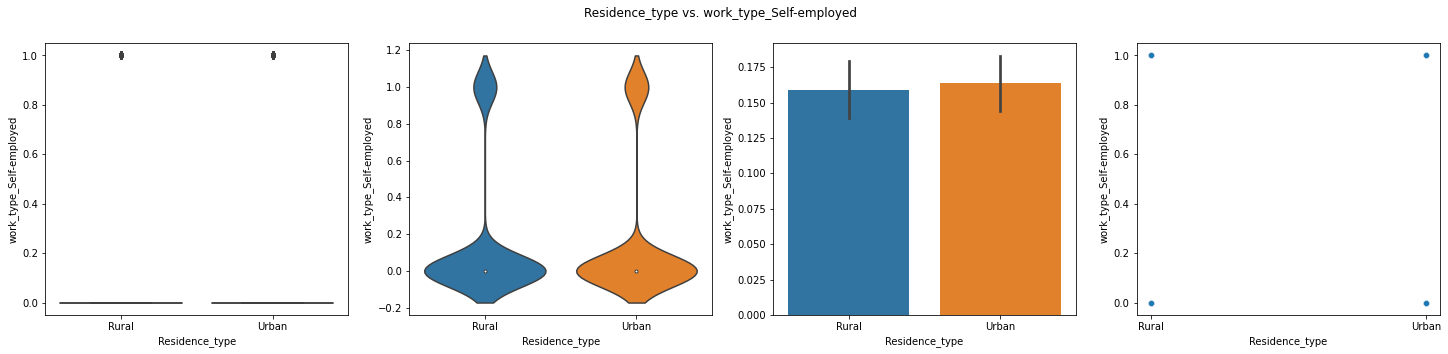

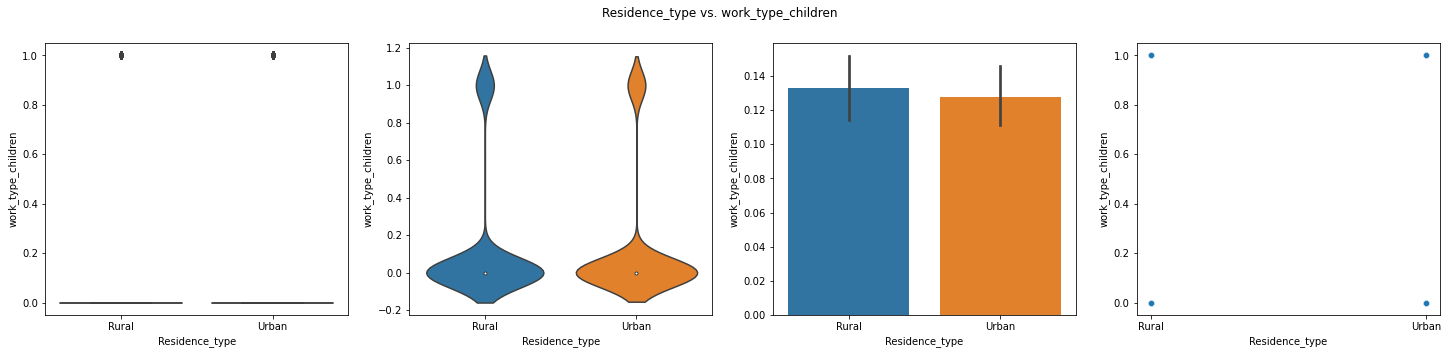

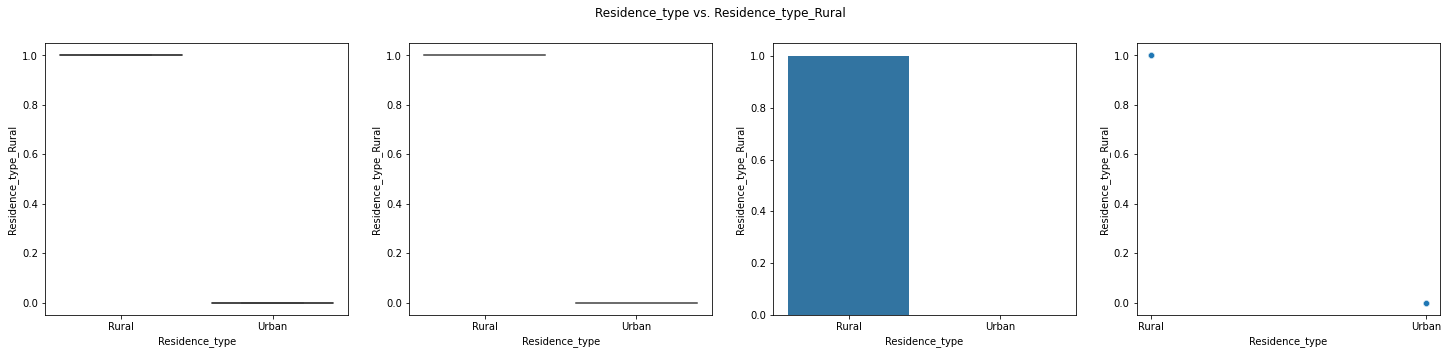

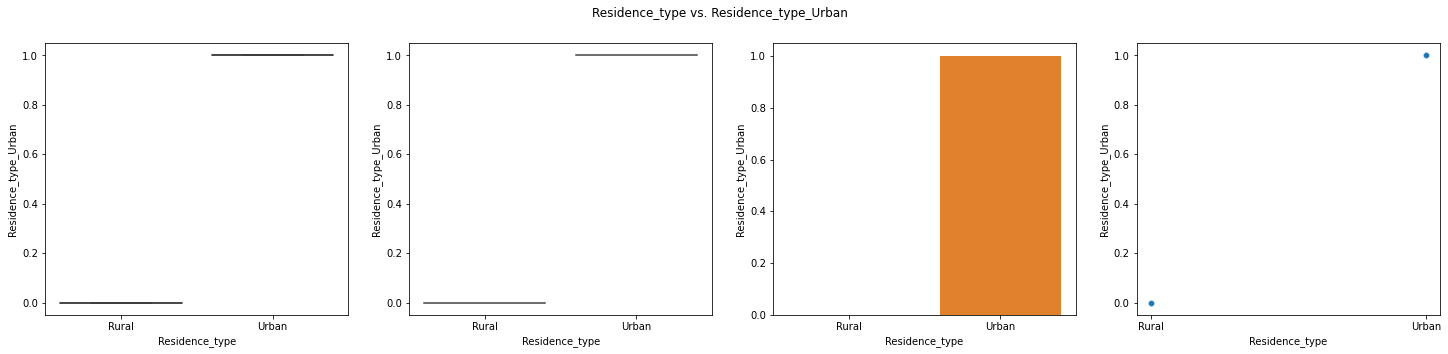

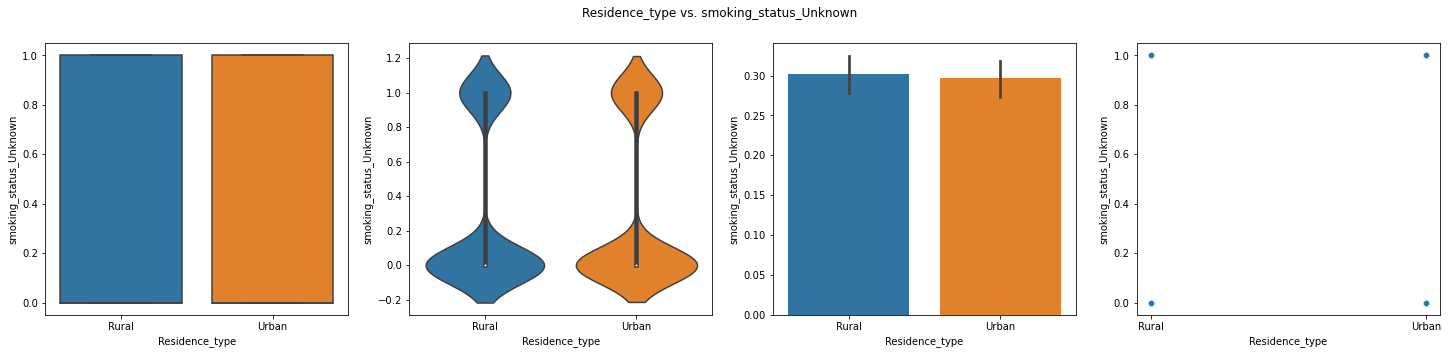

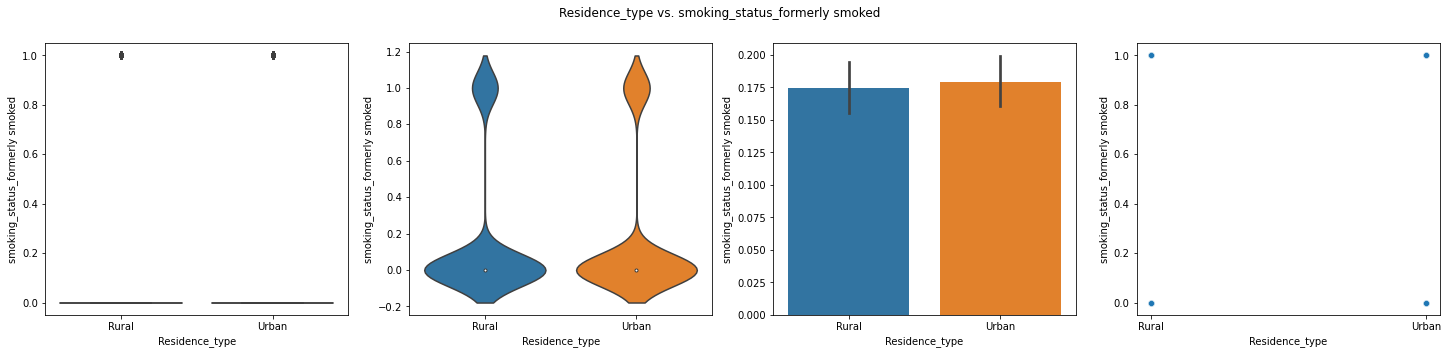

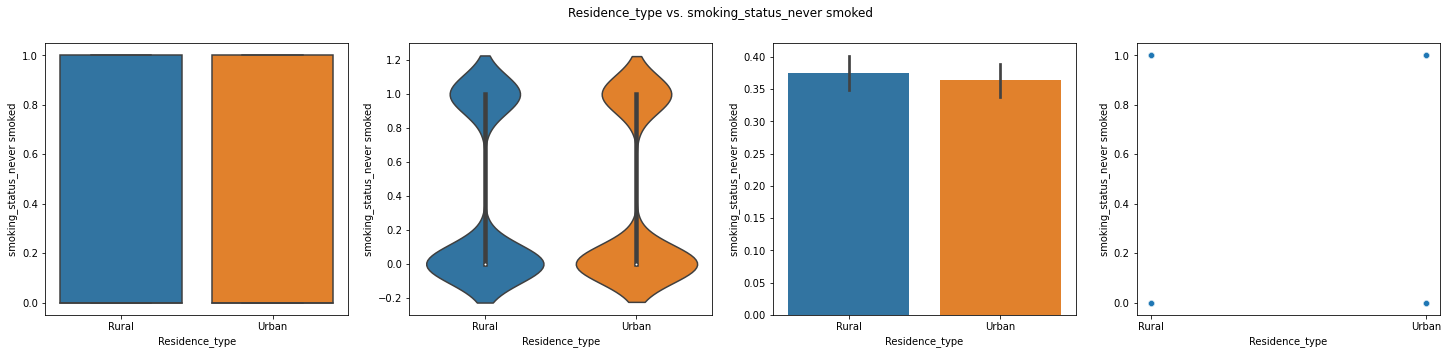

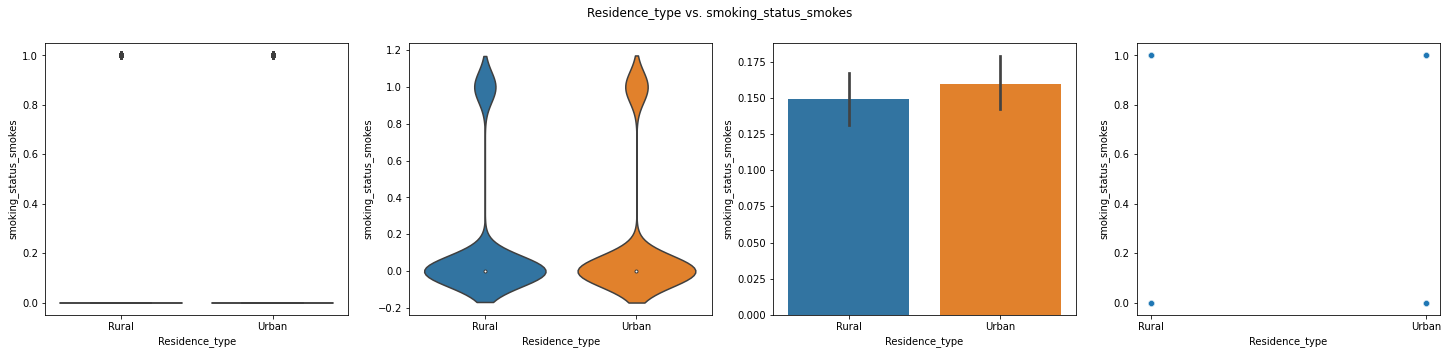

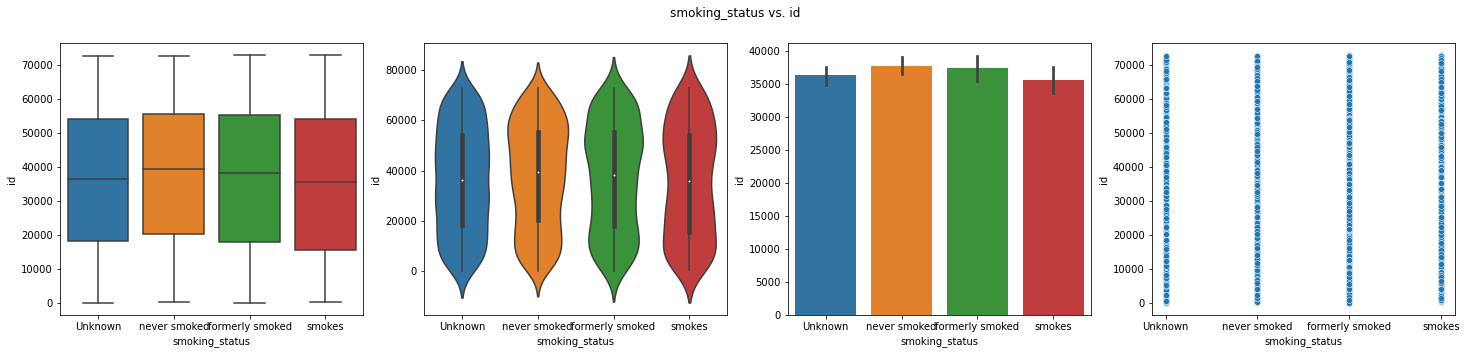

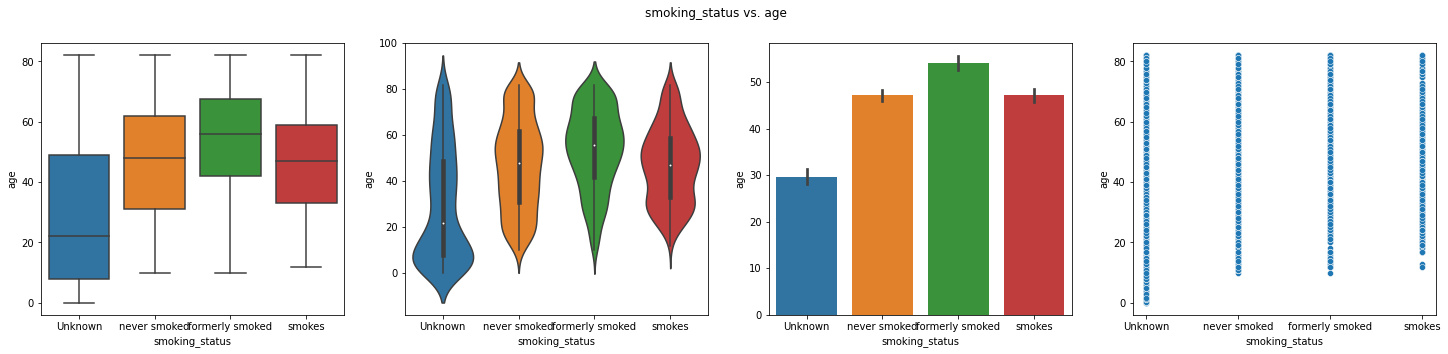

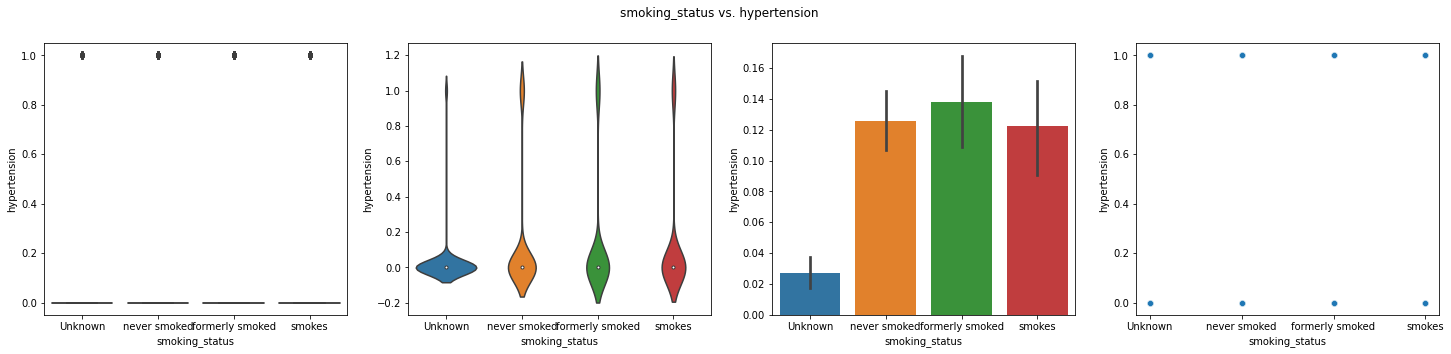

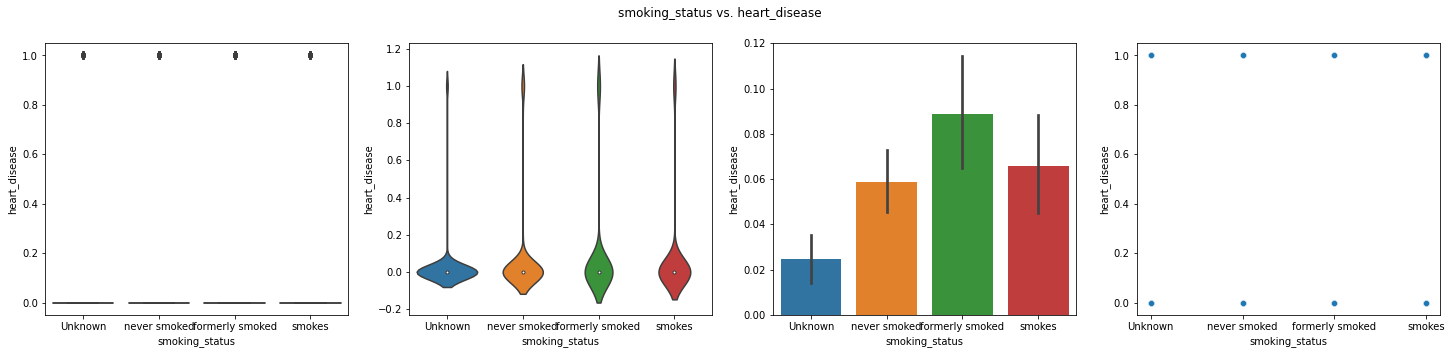

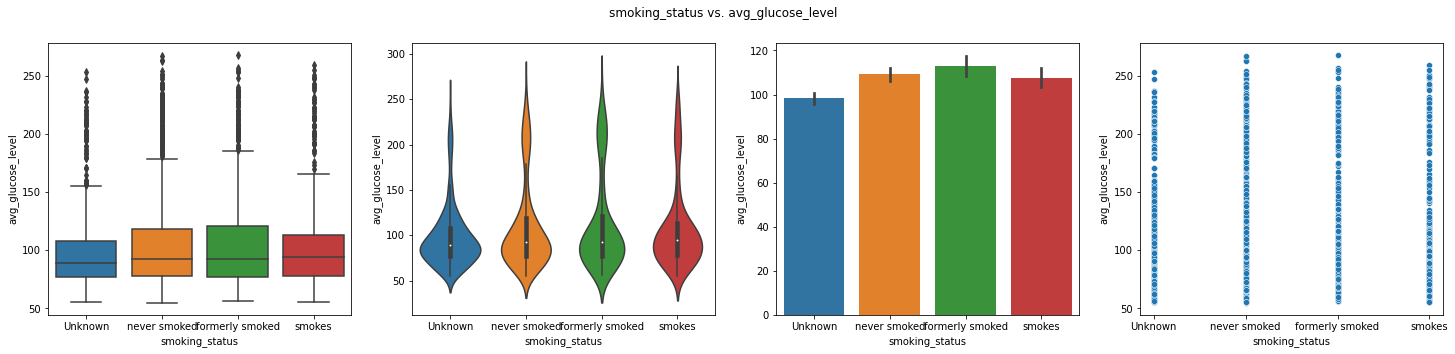

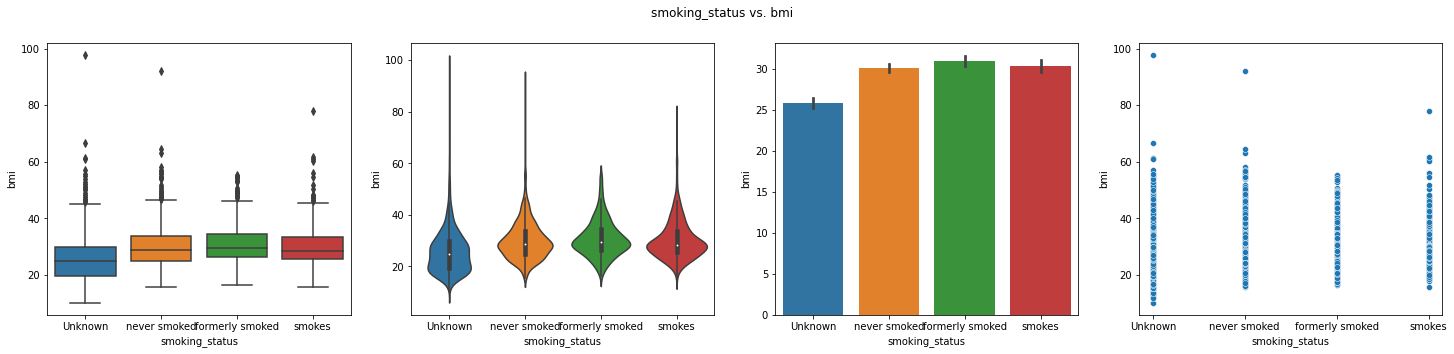

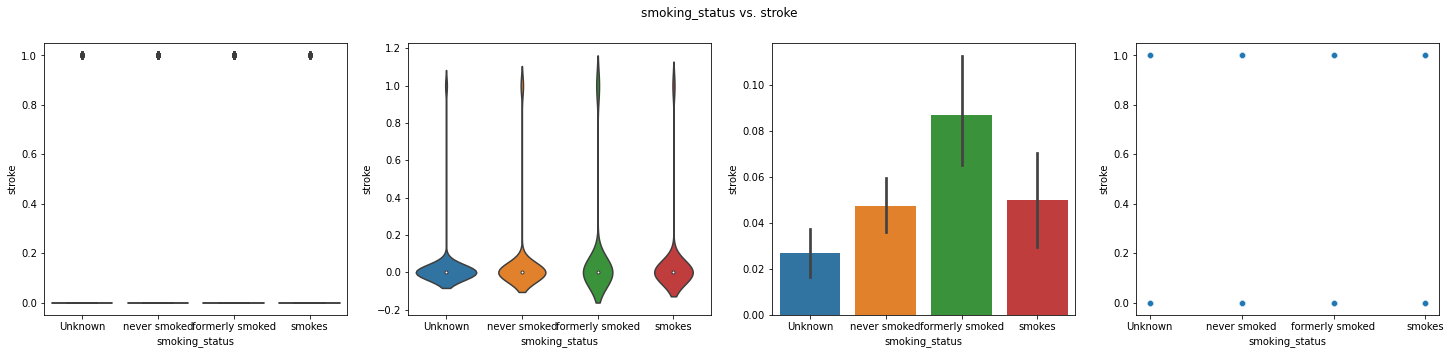

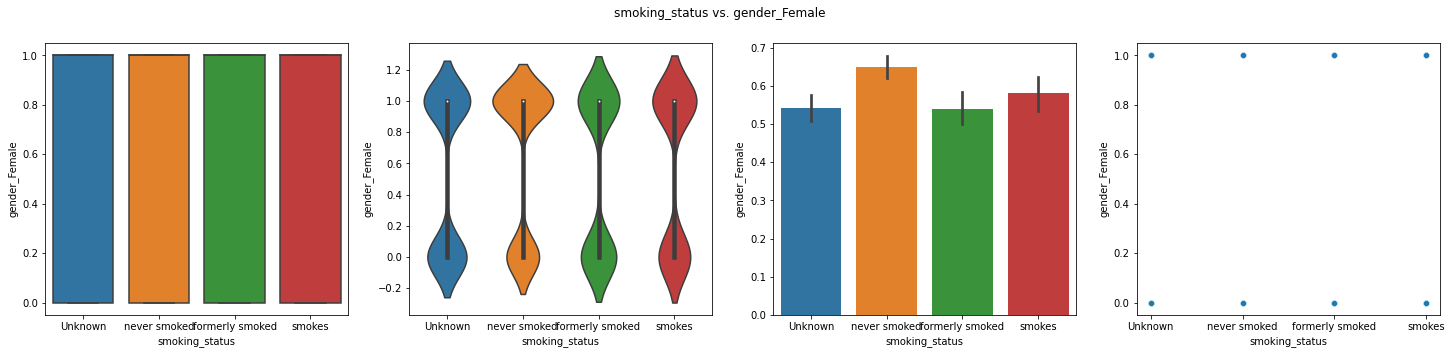

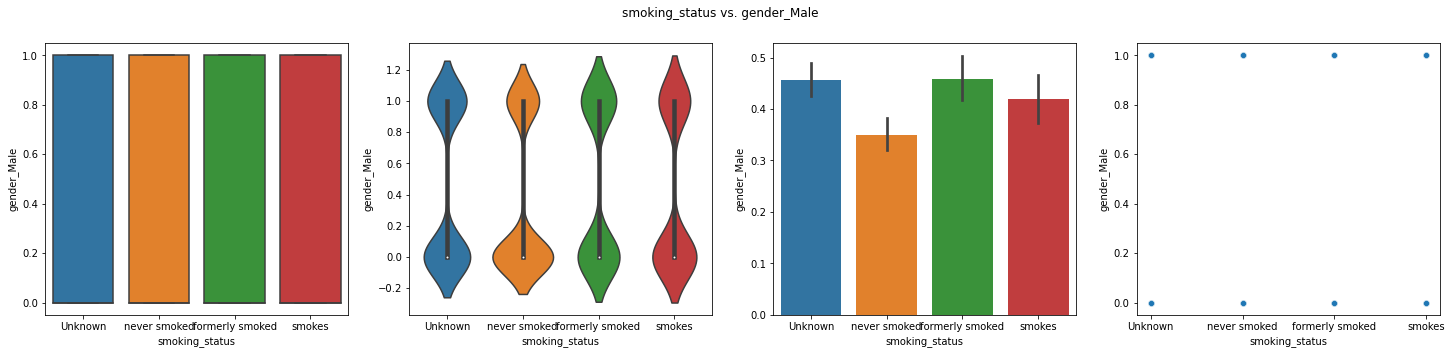

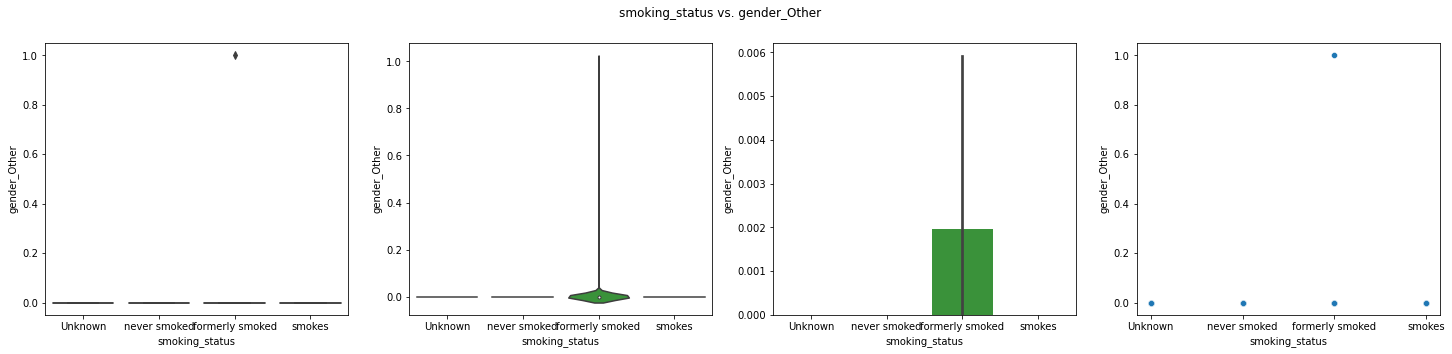

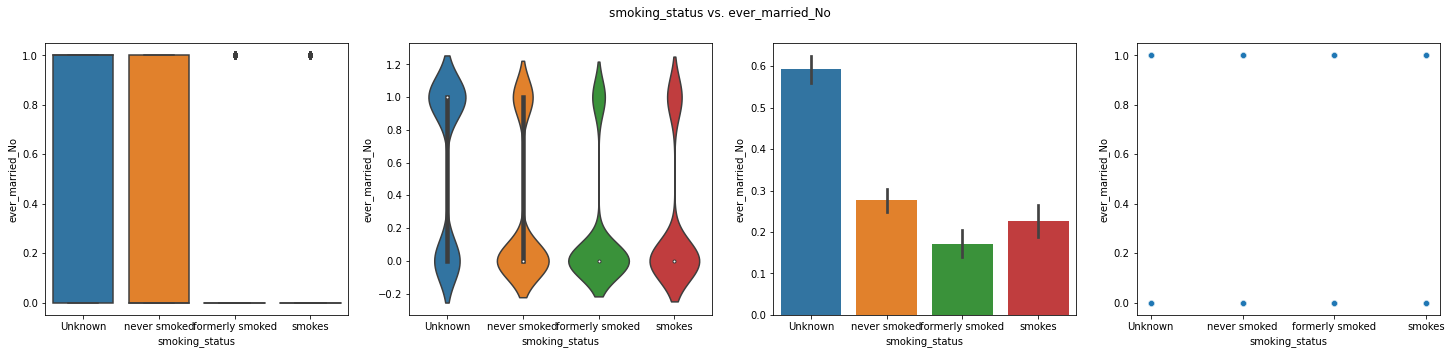

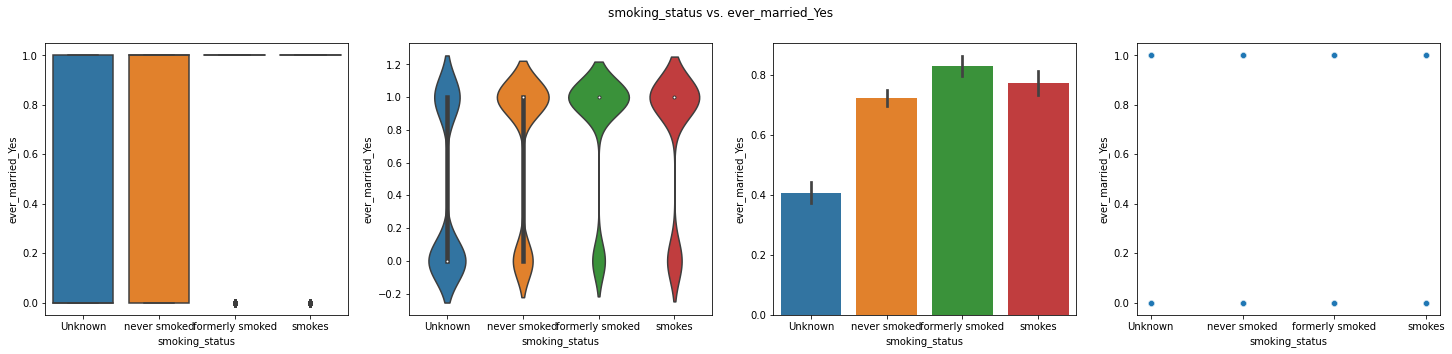

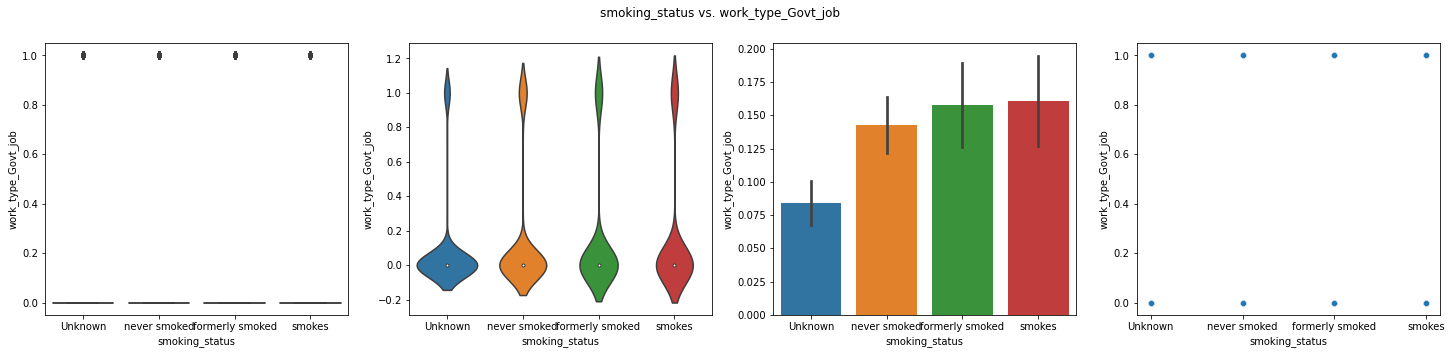

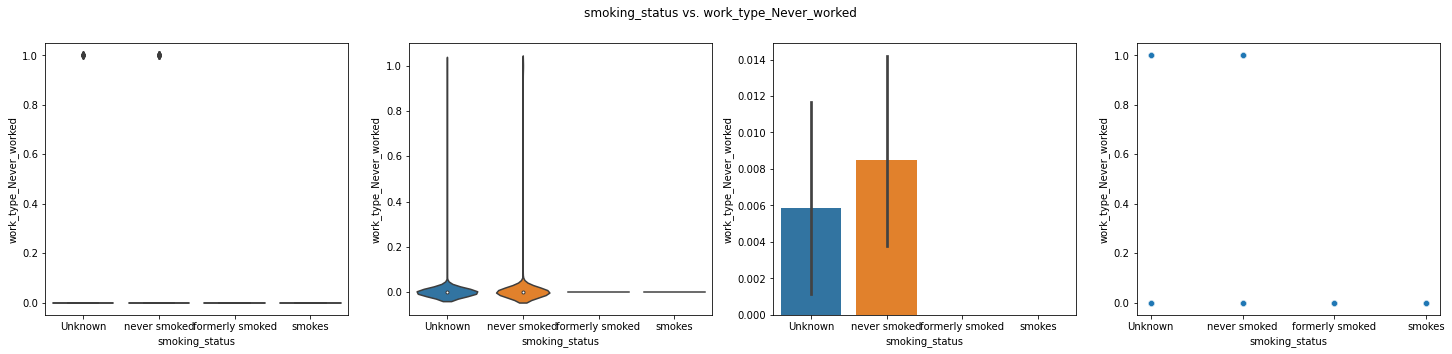

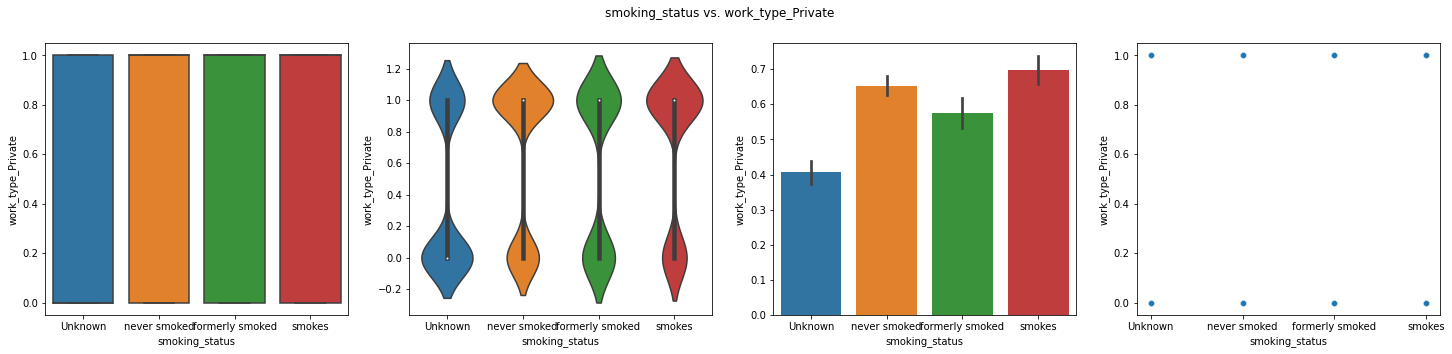

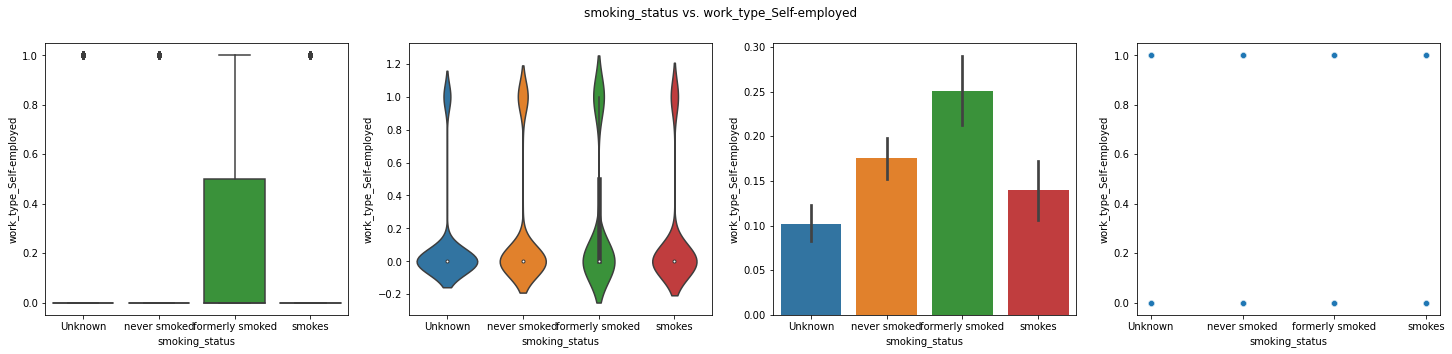

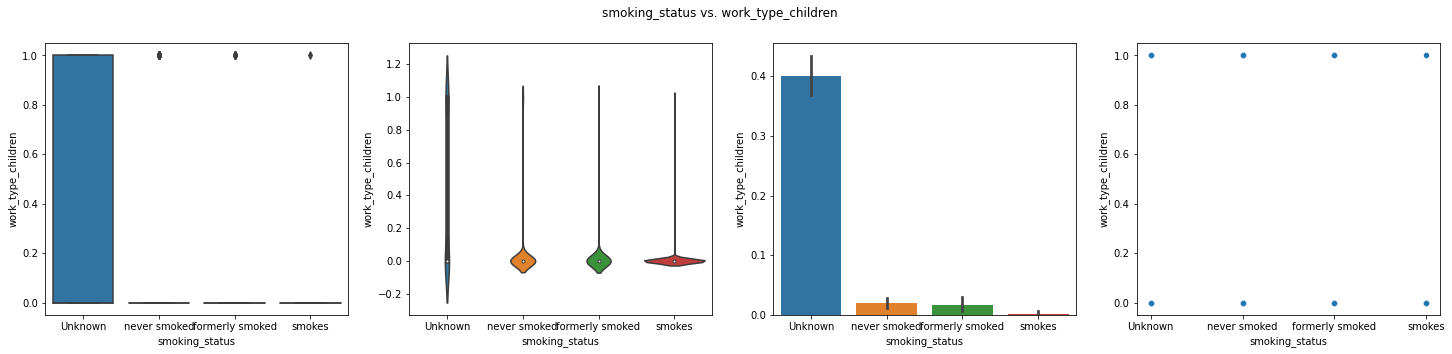

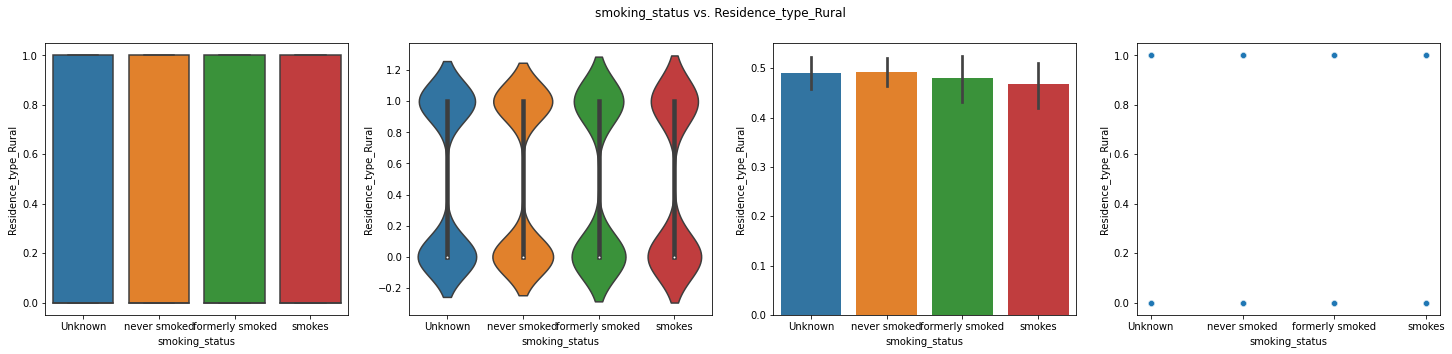

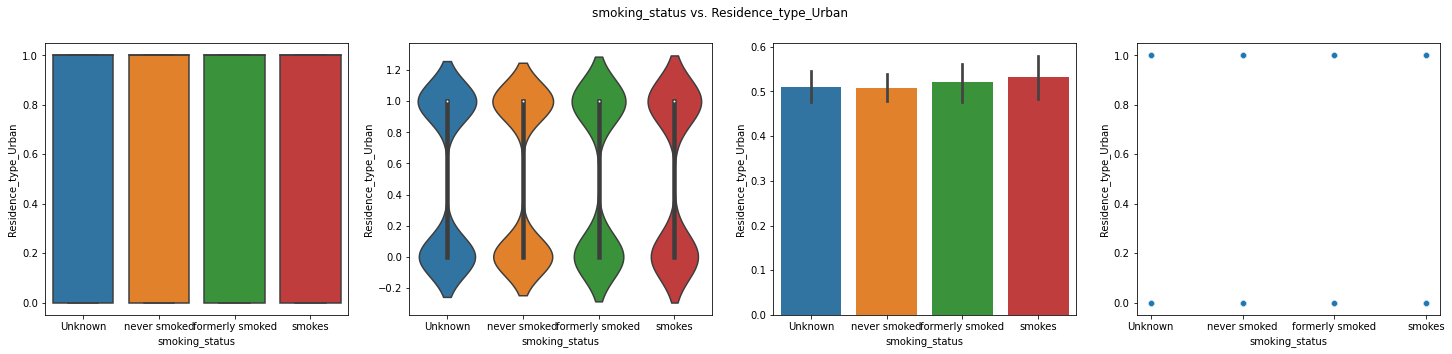

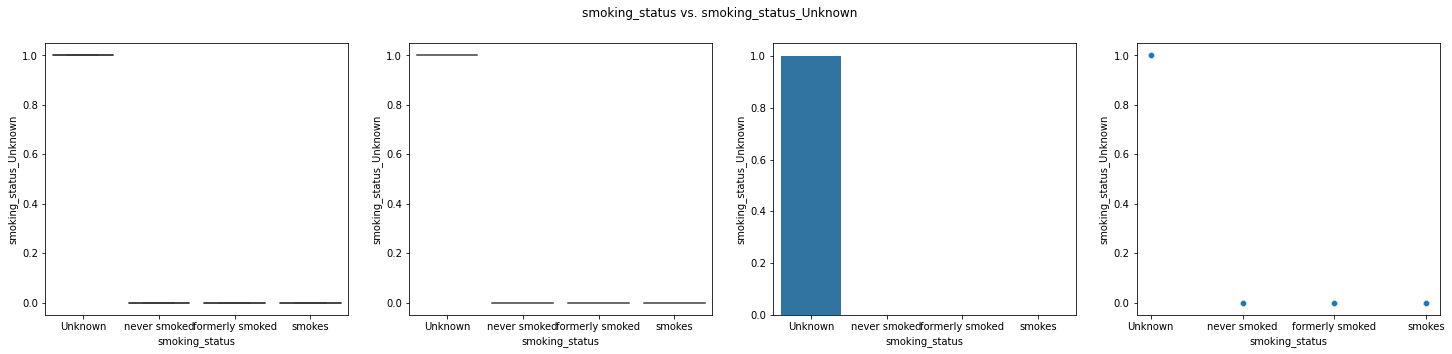

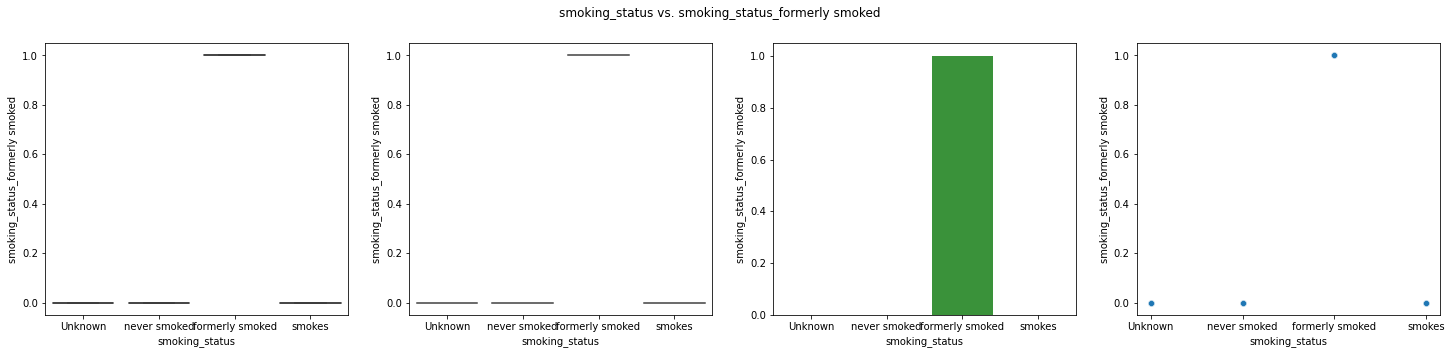

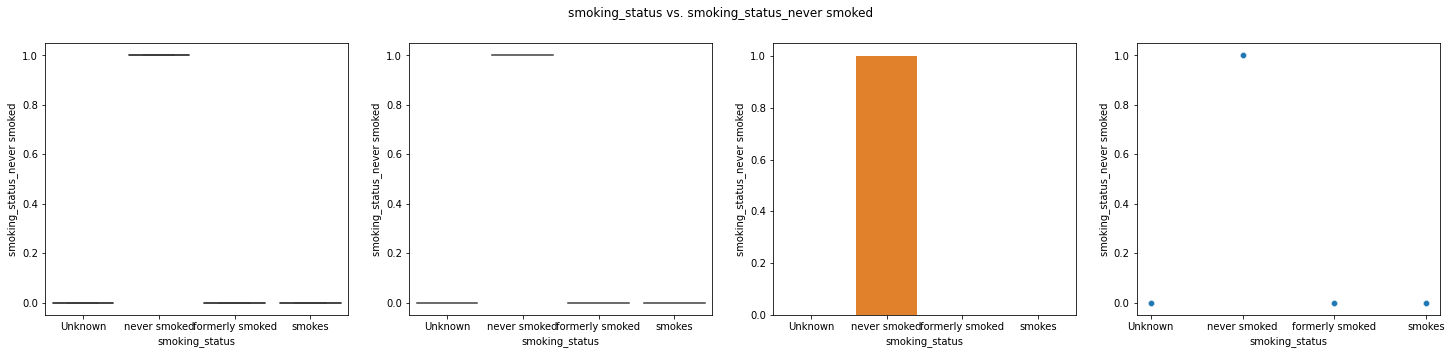

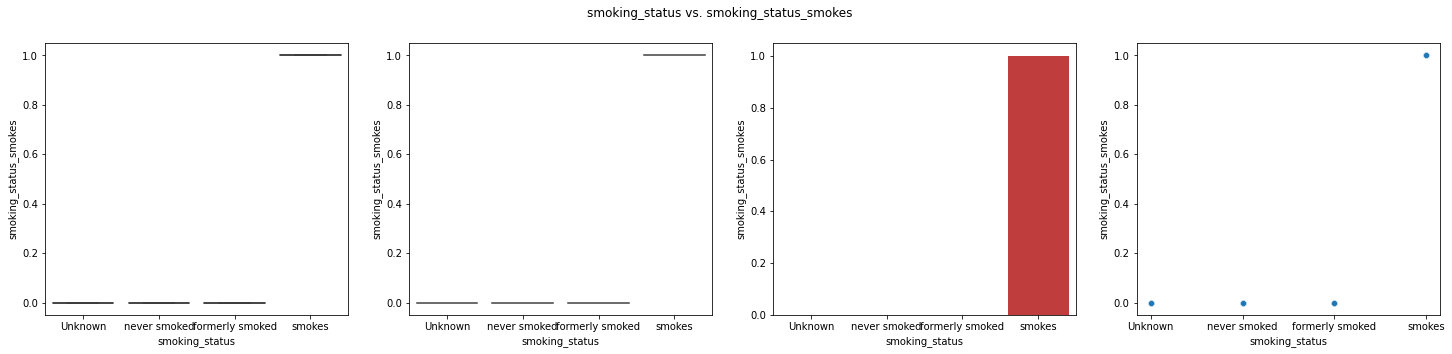

In [37]:
plot_categorical_and_continuous_vars2(train)

<AxesSubplot:xlabel='gender', ylabel='age'>

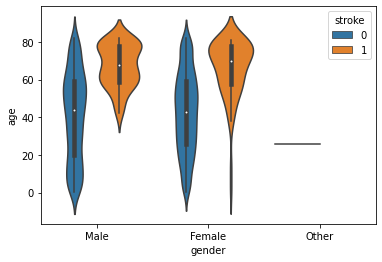

In [38]:
sns.violinplot(data=train, x='gender',y='age',hue='stroke')

<AxesSubplot:xlabel='gender', ylabel='age'>

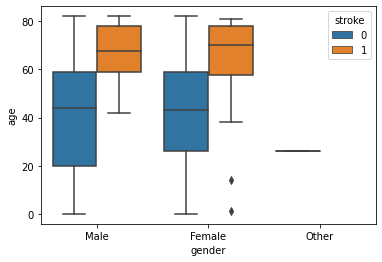

In [39]:
sns.boxplot(data=train, x='gender',y='age',hue='stroke')

<AxesSubplot:xlabel='ever_married', ylabel='age'>

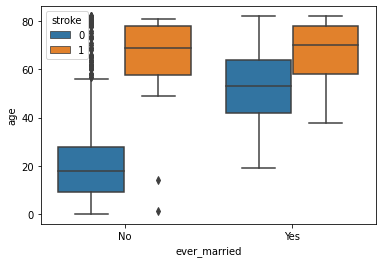

In [40]:
sns.boxplot(data=train, x='ever_married',y='age',hue='stroke')

# second set stroke as hue

In [41]:
def plot_categorical_and_continuous_vars(df, cat_vars, cont_vars):
    for col in cat_vars:
        for col2 in cont_vars:
            fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
            fig.suptitle(f'{col} vs. {col2}')
            sns.boxplot(data=df, x=col, y=col2, ax=ax1,hue='stroke')
            sns.violinplot(data=df, x=col, y=col2, ax=ax2,hue='stroke')
            sns.barplot(data=df, x=col, y=col2, ax=ax3,hue='stroke')
            plt.show()

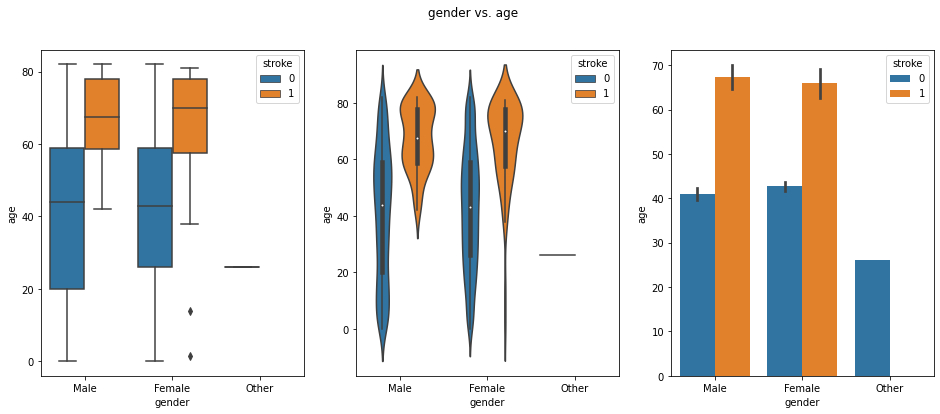

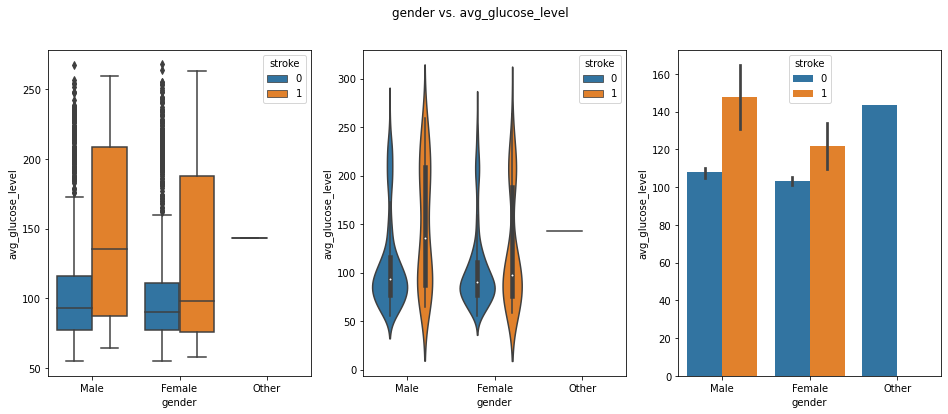

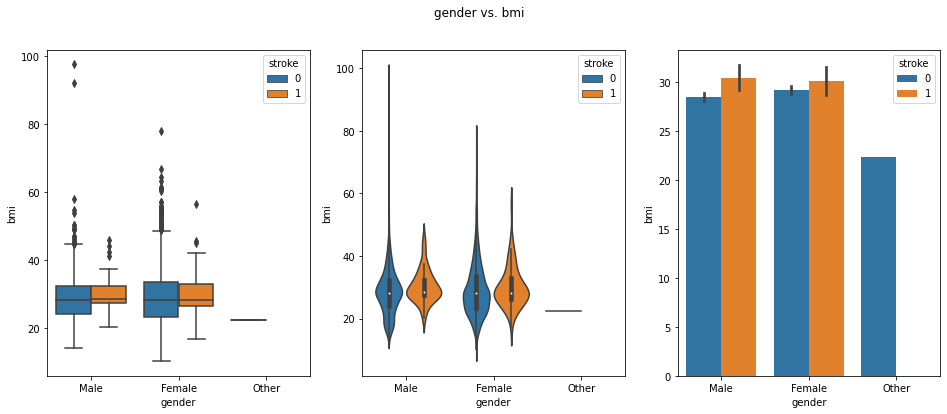

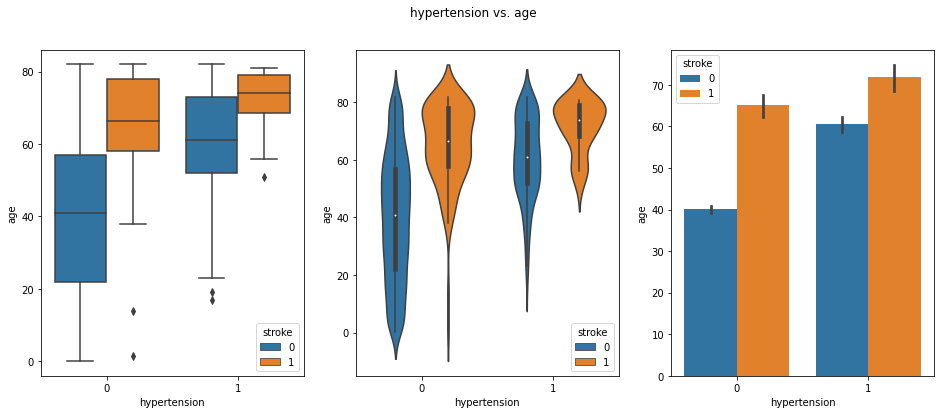

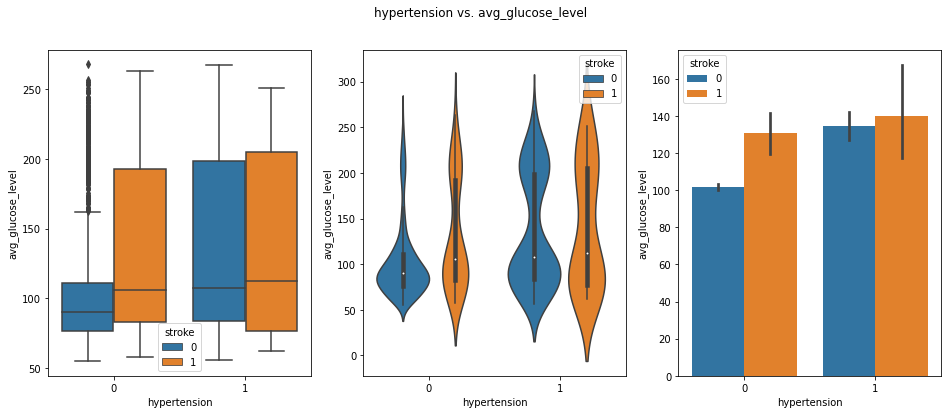

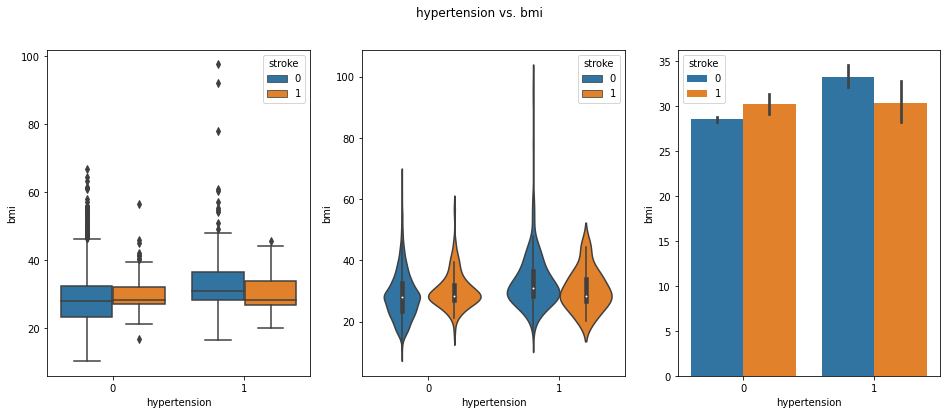

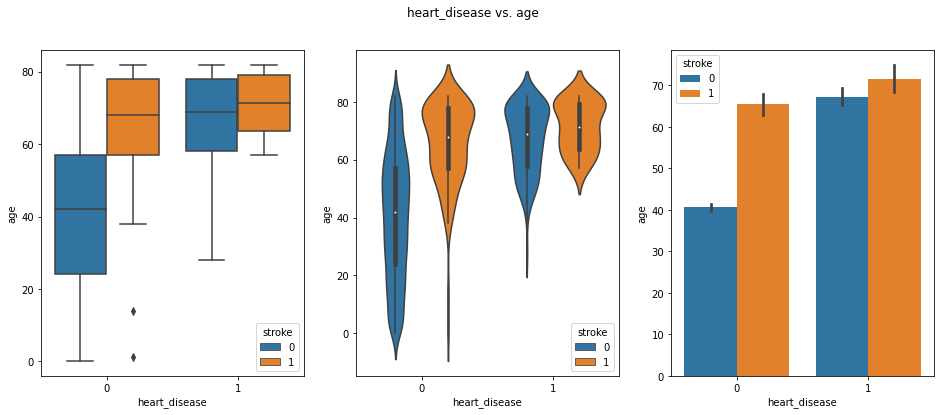

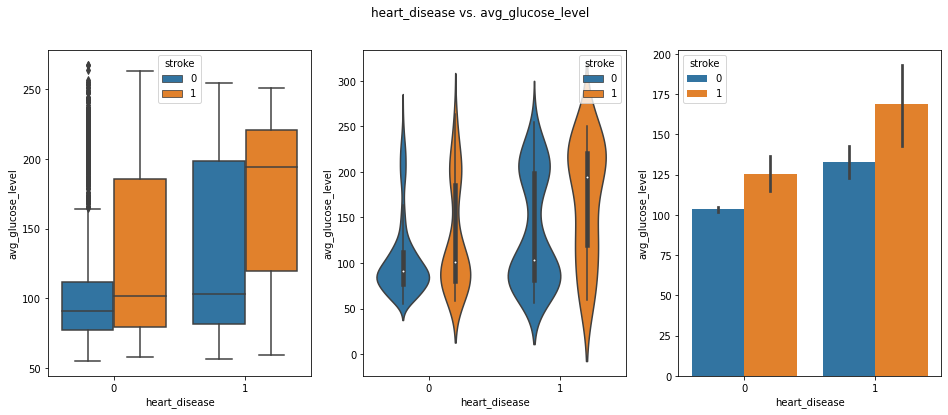

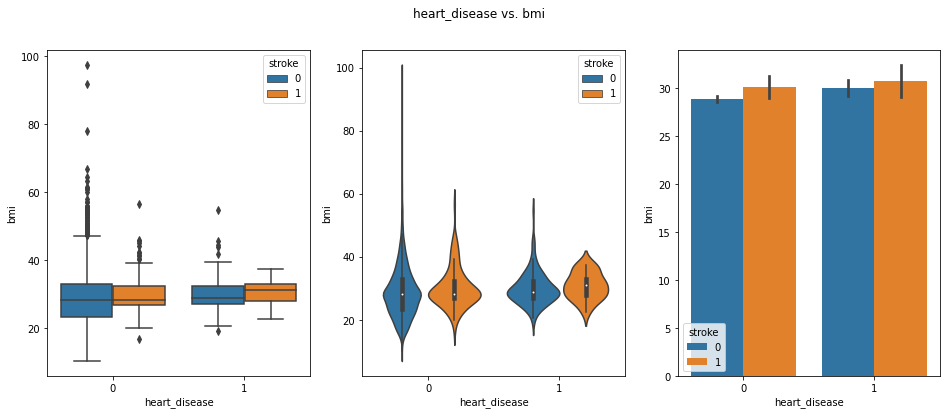

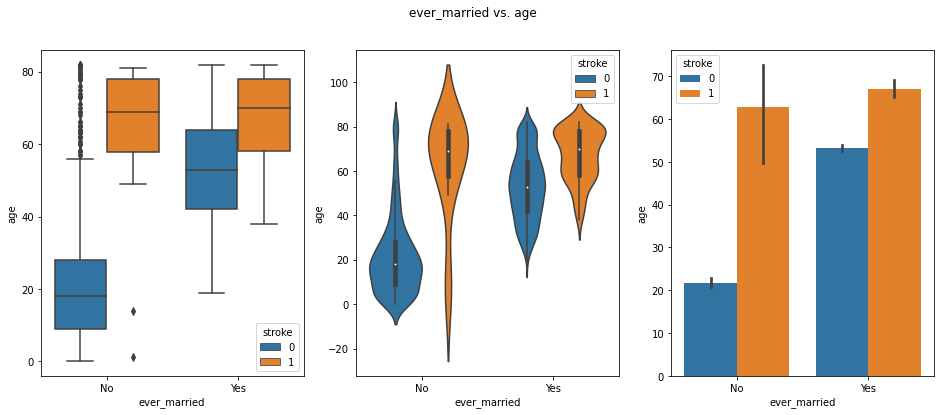

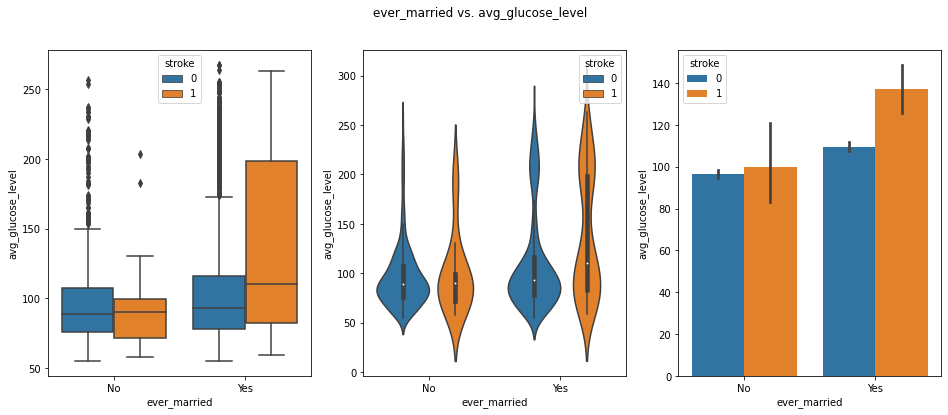

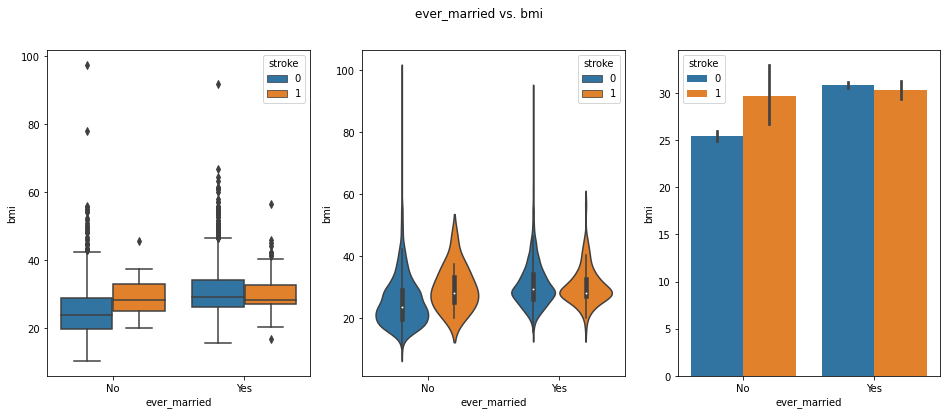

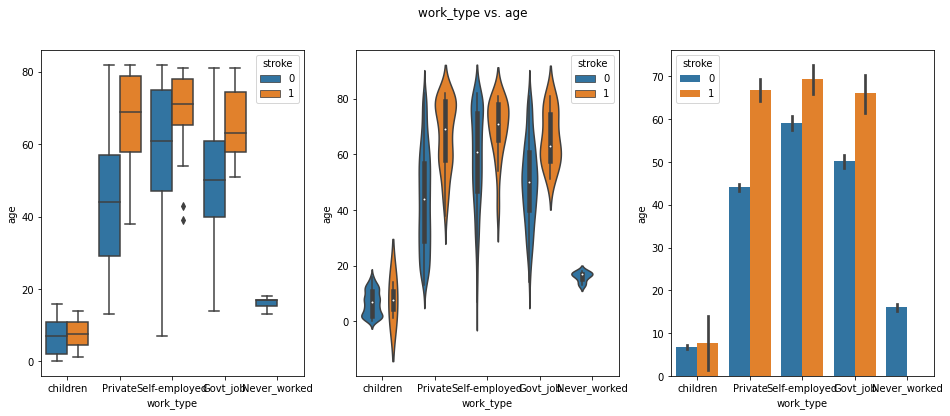

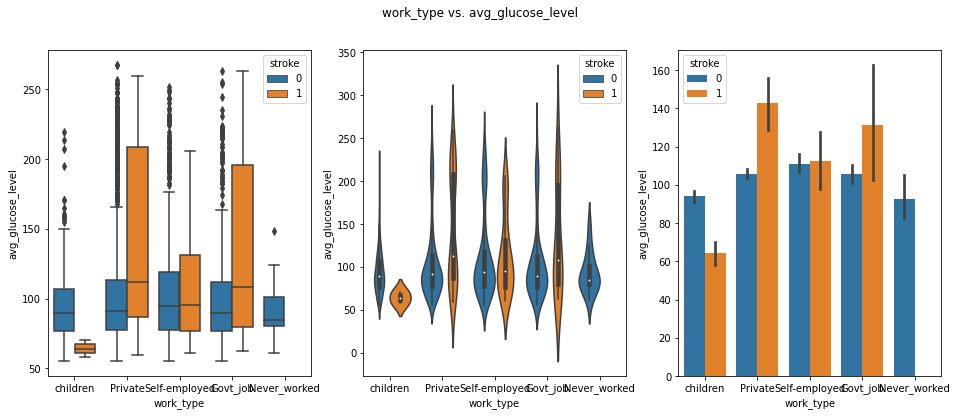

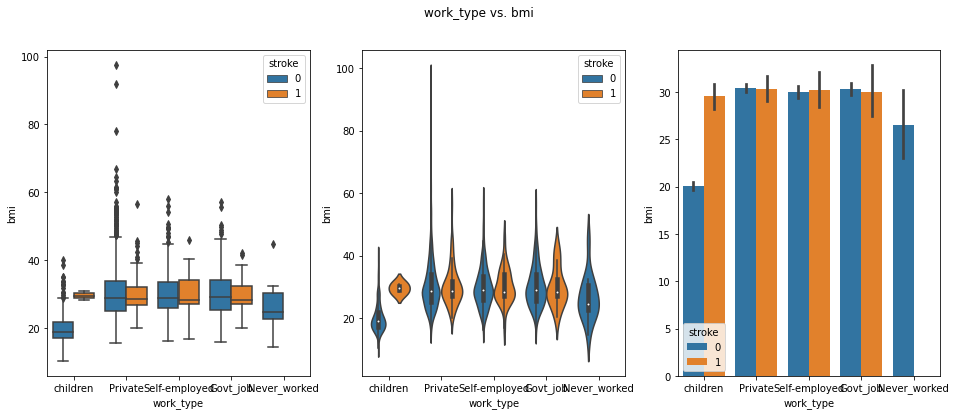

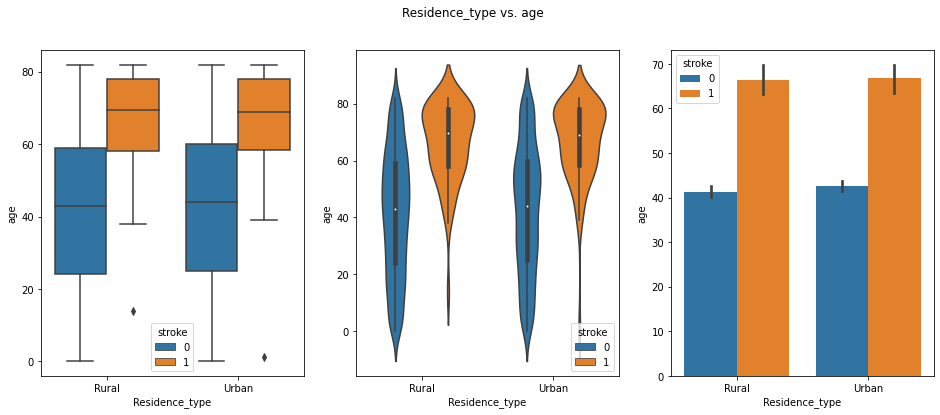

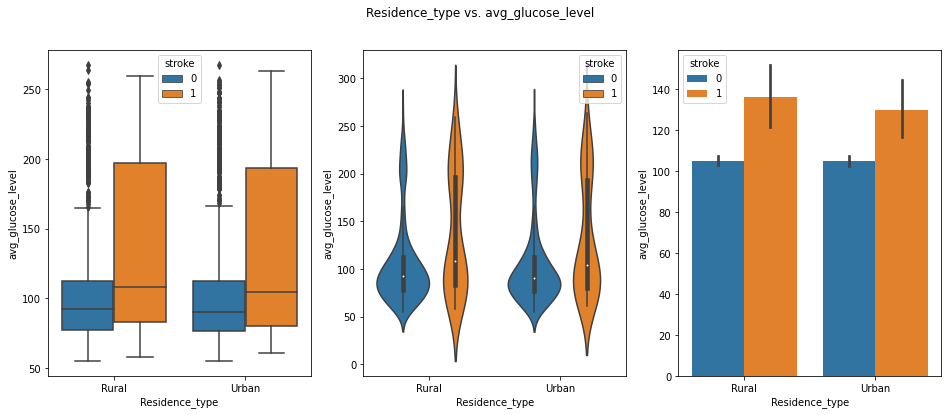

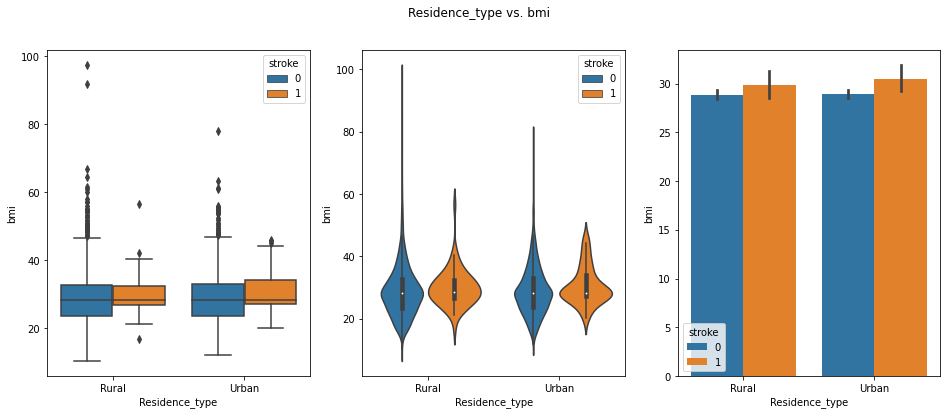

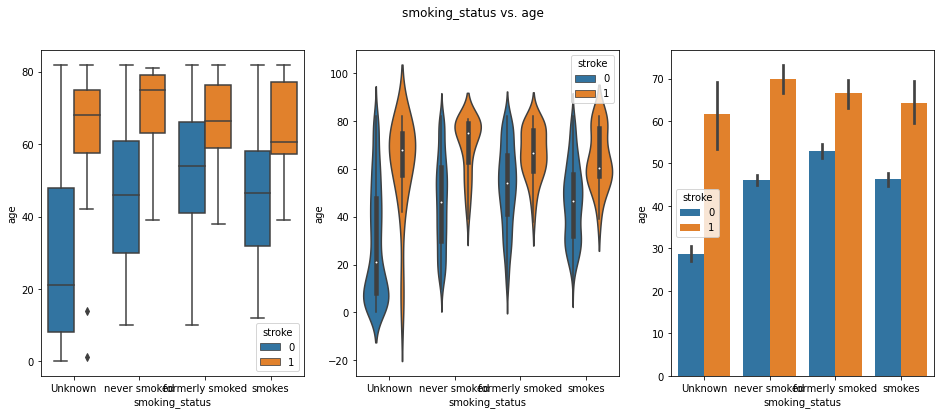

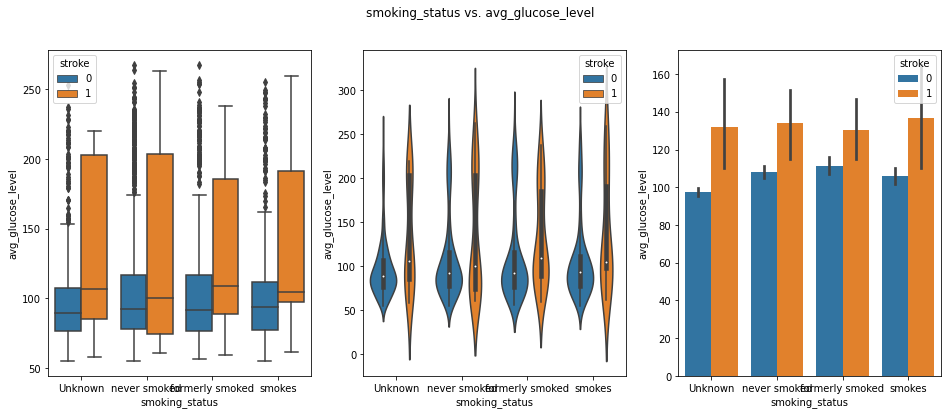

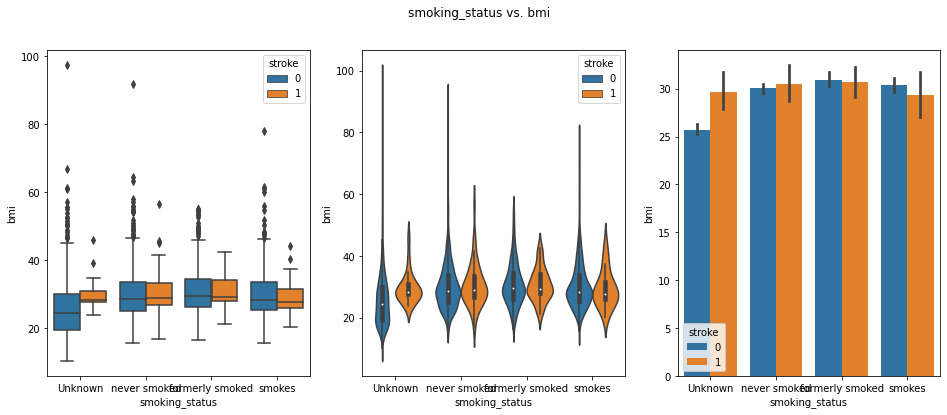

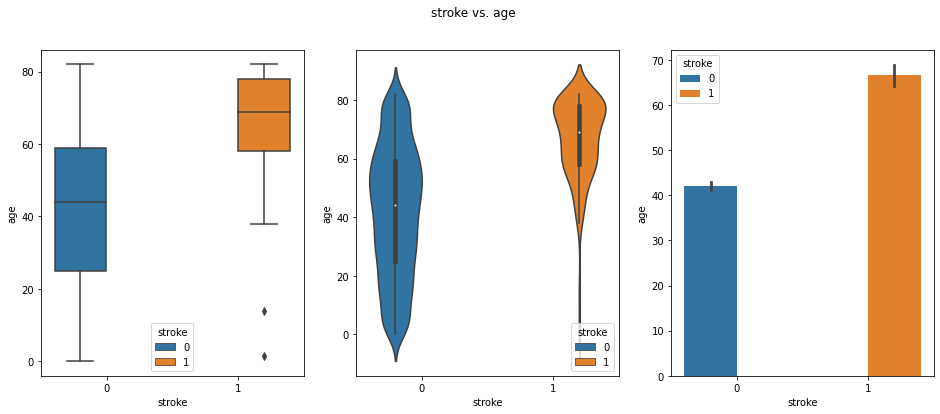

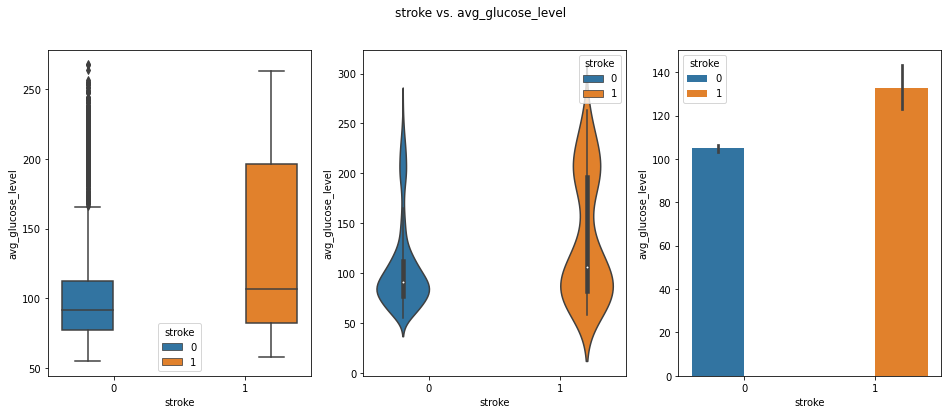

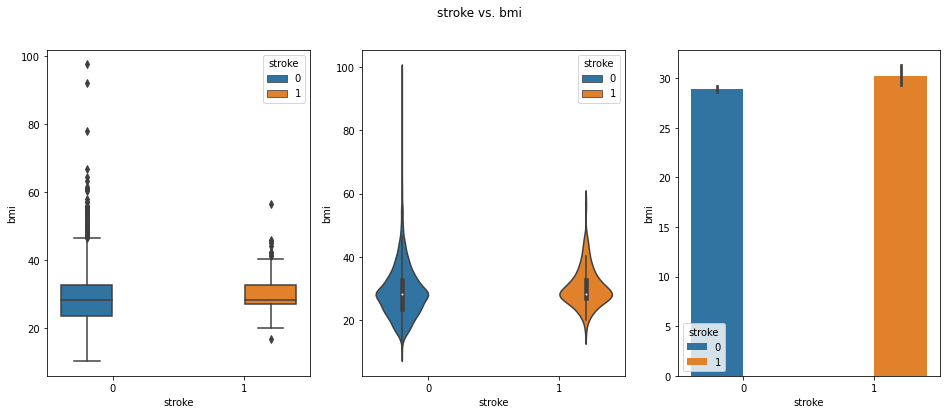

In [42]:
plot_categorical_and_continuous_vars(train, categorical, continuous)

<AxesSubplot:title={'center':'storke and age'}, xlabel='age', ylabel='Count'>

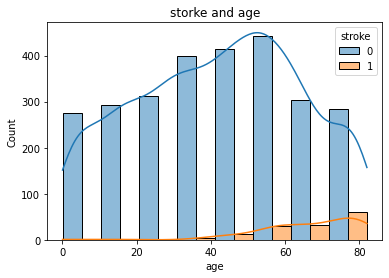

In [43]:
plt.title('storke and age')
sns.histplot(x='age', data=train, hue='stroke',multiple='dodge', kde= True, bins = 8)

<AxesSubplot:title={'center':'storke and age'}, xlabel='age', ylabel='Percent'>

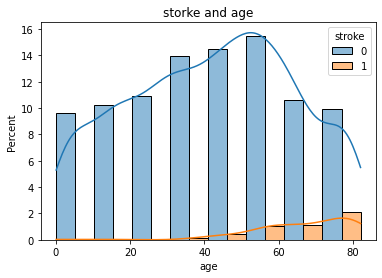

In [44]:
plt.title('storke and age')
sns.histplot(x='age', data=train, hue='stroke',multiple='dodge', kde= True, bins = 8,stat='percent')

# Stats

In [75]:
# pearsonr r for continuous variables
for i in continuous:
    α =0.05
    corr, p = stats.pearsonr(train[i], train.stroke)
    print('_____________________________________________________')
    print('HYPOTHESIS')
    print(f'H0: There is no significant difference between stroke in different {i}')
    print(f'Ha:(There is a significant difference between stroke in different {i}')
    print(f'{i} correlation {corr}, p-val{p}')
    if p < α:
        print('We reject the null hypothesis.')
        print(f'There is a correlation between stroke and {i}')
    else:
        print('We fail to reject the null hypothesis.')
        print(f'There is no correlation between stroke and {i}')

_____________________________________________________
HYPOTHESIS
H0: There is no significant difference between stroke in different age
Ha:(There is a significant difference between stroke in different age
age correlation 0.235579153113306, p-val2.248722003303099e-37
We reject the null hypothesis.
There is a correlation between stroke and age
_____________________________________________________
HYPOTHESIS
H0: There is no significant difference between stroke in different avg_glucose_level
Ha:(There is a significant difference between stroke in different avg_glucose_level
avg_glucose_level correlation 0.13174680273110426, p-val1.497808221989955e-12
We reject the null hypothesis.
There is a correlation between stroke and avg_glucose_level
_____________________________________________________
HYPOTHESIS
H0: There is no significant difference between stroke in different bmi
Ha:(There is a significant difference between stroke in different bmi
bmi correlation 0.035820768297477434, p-val0.0

In [ ]:
for i in categorical:
    α =0.05
    corr, p = stats.pearsonr(train[i], train.stroke)
    print('_____________________________________________________')
    print('HYPOTHESIS')
    print(f'H0: There is no significant difference between tax_value in different {i}')
    print(f'Ha:(There is a significant difference between tax_value in different {i}')
    print(f'{i} correlation {corr}, p-val{p}')
    if p < α:
        print('We reject the null hypothesis.')
        print(f'There is a correlation between tax_value and {i}')
    else:
        print('We fail to reject the null hypothesis.')
        print(f'There is no correlation between tax_value and {i}')

In [77]:
def get_chi(train,variable):    
    # Chi-Square test to compare two categorical variables (senior citizen status, churn)

    alpha = 0.05

    # Setup a crosstab of observed 
    observed = pd.crosstab(train[variable]== 1, train.stroke)

    chi2, p, degf, expected = stats.chi2_contingency(observed)

    chi2 = chi2.round(4)
    p = p.round(4)
    print(f' Chi-Square:{chi2}')
    print(f' p-value:{p}')

In [ ]:
chi_columns =['gender']
for i in chi_columns    
    get_chi(df,variable)

In [78]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Female', 'gender_Male',
       'gender_Other', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [82]:
observed = pd.crosstab(train['hypertension']==1, train.stroke)

In [83]:
observed

stroke           0    1
hypertension           
False         2473  108
True           249   31

In [84]:
observed = pd.crosstab(train['hypertension'], train.stroke)
observed

stroke           0    1
hypertension           
0             2473  108
1              249   31

In [80]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

chi2 = chi2.round(4)
p = p.round(4)
print(f' Chi-Square:{chi2}')
print(f' p-value:{p}')

 Chi-Square:24.4507
 p-value:0.0


# Model

In [45]:
train.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'gender_Female', 'gender_Male',
       'gender_Other', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [46]:
def model_prep(train,validate,test):
    
    ''' This function takes in data that has been split into train, validate and test and prepares for modeling 
        by removing features not used for modeling and seperating the target variable into its own dataframe.
        The following features are keept for modeling: 'monthly_charges','senior_citizen','tenure', 'partner_No',
        'partner_Yes','churn','contract_type_Month-to-month','contract_type_One year','contract_type_Two year', 
        Six data frames seperating the target variale from the selected features per train, validate and test 
        are returned
    '''
    
    # drop unused columns and keep some features
    features = ['age',
        'avg_glucose_level', 'bmi',
        'stroke', 'bmi', 'gender_Female', 'gender_Male',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'Residence_type_Rural', 'Residence_type_Urban',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']
    train = train[features]
    validate = validate[features]
    test = test[features]
        
    #seperate target
    x_train = train.drop(columns=['stroke'])
    y_train = train.stroke

    x_validate = validate.drop(columns=['stroke'])
    y_validate = validate.stroke

    x_test = test.drop(columns=['stroke'])
    y_test = test.stroke
        
    # Convert binary categorical target variable to numeric
    return x_train,y_train,x_validate,y_validate, x_test, y_test

In [47]:
X_train,y_train,X_validate,y_validate, X_test, y_test = model_prep(train,validate,test)

In [48]:
y_validate.shape,X_validate.shape,X_train.shape,y_train.shape

((1227,), (1227, 20), (2861, 20), (2861,))

In [49]:
train.shape

(2861, 28)

In [50]:
train.stroke.value_counts()

0    2722
1     139
Name: stroke, dtype: int64

In [51]:
2649/ 2788

0.9501434720229556

In [52]:
# baseline is 95% accuracy
baseline = y_train.mode()
baseline

0    0
Name: stroke, dtype: int64

X_train['baseline_prediction'] = int(baseline)
X_train


In [53]:
#Loop for models
for i in range(1, 21):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i,min_samples_split = 5, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = tree.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with max depth of 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with max depth of 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

In [54]:
y_validate.shape,X_validate.shape,X_train.shape,y_train.shape

((1227,), (1227, 20), (2861, 20), (2861,))

In [55]:

metrics = []

for i in range(1, 25):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)
    

    
    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    # calculate recall train
    y_pred = tree.predict(X_train)
    in_sample_recall= recall_score(y_train, y_pred)  
      
    # calculate recall validate
    y_pred = tree.predict(X_validate)
    out_of_sample_recall= recall_score(y_validate, y_pred)
    
    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy,
        'train_recall': in_sample_recall,
        'validate_recall': out_of_sample_recall
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["accuracy_difference"] = df.train_accuracy - df.validate_accuracy
df["recall_difference"] = df.train_recall - df.validate_recall
df

max_depth  train_accuracy  validate_accuracy  train_recall  \
0           1        0.951416           0.951100      0.000000   
1           2        0.951416           0.951100      0.000000   
2           3        0.951416           0.951100      0.000000   
3           4        0.952814           0.951100      0.035971   
4           5        0.954212           0.951100      0.071942   
5           6        0.957707           0.948655      0.129496   
6           7        0.960853           0.941320      0.208633   
7           8        0.967494           0.933985      0.402878   
8           9        0.971339           0.933170      0.467626   
9          10        0.977980           0.930725      0.604317   
10         11        0.983572           0.924205      0.705036   
11         12        0.987767           0.920130      0.762590   
12         13        0.991961           0.921760      0.841727   
13         14        0.993359           0.915240      0.870504   
14         15        0.995456           0.920945      0.906475   
15         16        0.996505           0.921760      0.949640   
16         17        0.997903           0.920130      0.971223   
17         18        0.999650           0.917685      0.992806   
18         19        0.999650           0.912795      0.992806   
19         20        1.000000           0.914425      1.000000   
20         21        1.000000           0.914425      1.000000   
21         22        1.000000           0.914425      1.000000   
22         23        1.000000           0.914425      1.000000   
23         24        1.000000           0.914425      1.000000   

    validate_recall  accuracy_difference  recall_difference  
0          0.000000             0.000315           0.000000  
1          0.000000             0.000315           0.000000  
2          0.000000             0.000315           0.000000  
3          0.000000             0.001713           0.035971  
4          0.033333             0.003112           0.038609  
5          0.033333             0.009052           0.096163  
6          0.083333             0.019533           0.125300  
7          0.116667             0.033509           0.286211  
8          0.133333             0.038168           0.334293  
9          0.133333             0.047254           0.470983  
10         0.133333             0.059367           0.571703  
11         0.133333             0.067636           0.629257  
12         0.150000             0.070200           0.691727  
13         0.116667             0.078119           0.753837  
14         0.150000             0.074511           0.756475  
15         0.166667             0.074744           0.782974  
16         0.133333             0.077772           0.837890  
17         0.166667             0.081965           0.826139  
18         0.133333             0.086855           0.859472  
19         0.133333             0.085575           0.866667  
20         0.133333             0.085575           0.866667  
21         0.133333             0.085575           0.866667  
22         0.133333             0.085575           0.866667  
23         0.133333             0.085575           0.866667

In [70]:
df.sort_values(by=['recall_difference', 'train_recall'])

neighbor  train_accuracy  validate_accuracy  train_recall  \
0          1             1.0             0.9511           1.0   
1          2             1.0             0.9511           1.0   
3          4             1.0             0.9511           1.0   
2          3             1.0             0.9511           1.0   
4          5             1.0             0.9511           1.0   
5          6             1.0             0.9511           1.0   
6          7             1.0             0.9511           1.0   
7          8             1.0             0.9511           1.0   
8          9             1.0             0.9511           1.0   
9         10             1.0             0.9511           1.0   
10        11             1.0             0.9511           1.0   
11        12             1.0             0.9511           1.0   
12        13             1.0             0.9511           1.0   
13        14             1.0             0.9511           1.0   
14        15             1.0             0.9511           1.0   
15        16             1.0             0.9511           1.0   
16        17             1.0             0.9511           1.0   
17        18             1.0             0.9511           1.0   
18        19             1.0             0.9511           1.0   
19        20             1.0             0.9511           1.0   

    validate_recall  accuracy_difference  recall_difference  
0          0.150000               0.0489           0.850000  
1          0.150000               0.0489           0.850000  
3          0.033333               0.0489           0.966667  
2          0.016667               0.0489           0.983333  
4          0.000000               0.0489           1.000000  
5          0.000000               0.0489           1.000000  
6          0.000000               0.0489           1.000000  
7          0.000000               0.0489           1.000000  
8          0.000000               0.0489           1.000000  
9          0.000000               0.0489           1.000000  
10         0.000000               0.0489           1.000000  
11         0.000000               0.0489           1.000000  
12         0.000000               0.0489           1.000000  
13         0.000000               0.0489           1.000000  
14         0.000000               0.0489           1.000000  
15         0.000000               0.0489           1.000000  
16         0.000000               0.0489           1.000000  
17         0.000000               0.0489           1.000000  
18         0.000000               0.0489           1.000000  
19         0.000000               0.0489           1.000000

In [57]:
df.sort_values(by='difference')

KeyError: 'difference'

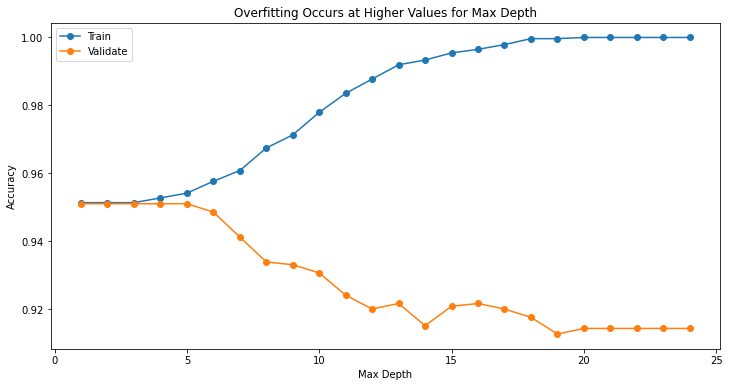

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(df.max_depth, df.train_accuracy, marker = 'o', label = 'Train')
plt.plot(df.max_depth, df.validate_accuracy, marker = 'o', label = 'Validate')


#plt.plot(df_2.max_depth, df_2.validate_accuracy, marker = 'x', label = 'Validate')

plt.title('Overfitting Occurs at Higher Values for Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:

# Let's get loopy

for i in range(1, 21):
  
    # Make the model
    random_forest = RandomForestClassifier(max_depth=10, min_samples_leaf = i , random_state=123)

    # Fit the model (on train and only train)
    random_forest = random_forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_pred = random_forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_pred, output_dict=True)
    print(f"Tree with min sample leaf {i}")
    print(pd.DataFrame(report))
    print()
    
    
    # create data frame
        # calculate recall train
    y_pred = random_forest.predict(X_train)
    in_sample_recall= recall_score(y_train, y_pred)
    
    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = random_forest.score(X_train, y_train)
    
    
    
    out_of_sample_accuracy = random_forest.score(X_validate, y_validate)

    
      
    # calculate recall validate
    y_pred = random_forest.predict(X_validate)
    out_of_sample_recall= recall_score(y_validate, y_pred)
    
    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy,
        'train_recall': in_sample_recall,
        'validate_recall': out_of_sample_recall
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["accuracy_difference"] = df.train_accuracy - df.validate_accuracy
df["recall_difference"] = df.train_recall - df.validate_recall
df
 

Tree with min sample leaf 1
                     0           1  accuracy    macro avg  weighted avg
precision     0.966619    1.000000  0.967144     0.983310      0.968241
recall        1.000000    0.323741  0.967144     0.661871      0.967144
f1-score      0.983026    0.489130  0.967144     0.736078      0.959031
support    2722.000000  139.000000  0.967144  2861.000000   2861.000000

Tree with min sample leaf 2
                     0          1  accuracy    macro avg  weighted avg
precision     0.953749    1.00000  0.953862     0.976875      0.955996
recall        1.000000    0.05036  0.953862     0.525180      0.953862
f1-score      0.976327    0.09589  0.953862     0.536109      0.933552
support    2722.000000  139.00000  0.953862  2861.000000   2861.000000

Tree with min sample leaf 3
                     0           1  accuracy    macro avg  weighted avg
precision     0.952414    1.000000  0.952464     0.976207      0.954726
recall        1.000000    0.021583  0.952464     0.5107

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with min sample leaf 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with min sample leaf 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with min sample leaf 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with min sample leaf 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with min sample leaf 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with min sample leaf 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with min sample leaf 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 11
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 12
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/



Tree with min sample leaf 13
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 14
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 15
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 16
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 17
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 18
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 19
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 20
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416 

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth  train_accuracy  validate_accuracy  train_recall  \
0           1        0.951416           0.951100      0.000000   
1           2        0.951416           0.951100      0.000000   
2           3        0.951416           0.951100      0.000000   
3           4        0.952814           0.951100      0.035971   
4           5        0.954212           0.951100      0.071942   
5           6        0.957707           0.948655      0.129496   
6           7        0.960853           0.941320      0.208633   
7           8        0.967494           0.933985      0.402878   
8           9        0.971339           0.933170      0.467626   
9          10        0.977980           0.930725      0.604317   
10         11        0.983572           0.924205      0.705036   
11         12        0.987767           0.920130      0.762590   
12         13        0.991961           0.921760      0.841727   
13         14        0.993359           0.915240      0.870504   
14         15        0.995456           0.920945      0.906475   
15         16        0.996505           0.921760      0.949640   
16         17        0.997903           0.920130      0.971223   
17         18        0.999650           0.917685      0.992806   
18         19        0.999650           0.912795      0.992806   
19         20        1.000000           0.914425      1.000000   
20         21        1.000000           0.914425      1.000000   
21         22        1.000000           0.914425      1.000000   
22         23        1.000000           0.914425      1.000000   
23         24        1.000000           0.914425      1.000000   
24          1        0.967144           0.951100      0.323741   
25          2        0.953862           0.951100      0.050360   
26          3        0.952464           0.951100      0.021583   
27          4        0.951416           0.951100      0.000000   
28          5        0.951416           0.951100      0.000000   
29          6        0.951416           0.951100      0.000000   
30          7        0.951416           0.951100      0.000000   
31          8        0.951416           0.951100      0.000000   
32          9        0.951416           0.951100      0.000000   
33         10        0.951416           0.951100      0.000000   
34         11        0.951416           0.951100      0.000000   
35         12        0.951416           0.951100      0.000000   
36         13        0.951416           0.951100      0.000000   
37         14        0.951416           0.951100      0.000000   
38         15        0.951416           0.951100      0.000000   
39         16        0.951416           0.951100      0.000000   
40         17        0.951416           0.951100      0.000000   
41         18        0.951416           0.951100      0.000000   
42         19        0.951416           0.951100      0.000000   
43         20        0.951416           0.951100      0.000000   

    validate_recall  accuracy_difference  recall_difference  
0          0.000000             0.000315           0.000000  
1          0.000000             0.000315           0.000000  
2          0.000000             0.000315           0.000000  
3          0.000000             0.001713           0.035971  
4          0.033333             0.003112           0.038609  
5          0.033333             0.009052           0.096163  
6          0.083333             0.019533           0.125300  
7          0.116667             0.033509           0.286211  
8          0.133333             0.038168           0.334293  
9          0.133333             0.047254           0.470983  
10         0.133333             0.059367           0.571703  
11         0.133333             0.067636           0.629257  
12         0.150000             0.070200           0.691727  
13         0.116667             0.078119           0.753837  
14         0.150000             0.074511           0.756475  
15         0.166667             0.074744 

In [60]:
df.sort_values('validate_accuracy')

max_depth  train_accuracy  validate_accuracy  train_recall  \
18         19        0.999650           0.912795      0.992806   
21         22        1.000000           0.914425      1.000000   
23         24        1.000000           0.914425      1.000000   
22         23        1.000000           0.914425      1.000000   
20         21        1.000000           0.914425      1.000000   
19         20        1.000000           0.914425      1.000000   
13         14        0.993359           0.915240      0.870504   
17         18        0.999650           0.917685      0.992806   
16         17        0.997903           0.920130      0.971223   
11         12        0.987767           0.920130      0.762590   
14         15        0.995456           0.920945      0.906475   
12         13        0.991961           0.921760      0.841727   
15         16        0.996505           0.921760      0.949640   
10         11        0.983572           0.924205      0.705036   
9          10        0.977980           0.930725      0.604317   
8           9        0.971339           0.933170      0.467626   
7           8        0.967494           0.933985      0.402878   
6           7        0.960853           0.941320      0.208633   
5           6        0.957707           0.948655      0.129496   
33         10        0.951416           0.951100      0.000000   
34         11        0.951416           0.951100      0.000000   
35         12        0.951416           0.951100      0.000000   
36         13        0.951416           0.951100      0.000000   
39         16        0.951416           0.951100      0.000000   
40         17        0.951416           0.951100      0.000000   
37         14        0.951416           0.951100      0.000000   
38         15        0.951416           0.951100      0.000000   
32          9        0.951416           0.951100      0.000000   
41         18        0.951416           0.951100      0.000000   
31          8        0.951416           0.951100      0.000000   
0           1        0.951416           0.951100      0.000000   
29          6        0.951416           0.951100      0.000000   
28          5        0.951416           0.951100      0.000000   
27          4        0.951416           0.951100      0.000000   
26          3        0.952464           0.951100      0.021583   
25          2        0.953862           0.951100      0.050360   
24          1        0.967144           0.951100      0.323741   
42         19        0.951416           0.951100      0.000000   
4           5        0.954212           0.951100      0.071942   
3           4        0.952814           0.951100      0.035971   
2           3        0.951416           0.951100      0.000000   
1           2        0.951416           0.951100      0.000000   
30          7        0.951416           0.951100      0.000000   
43         20        0.951416           0.951100      0.000000   

    validate_recall  accuracy_difference  recall_difference  
18         0.133333             0.086855           0.859472  
21         0.133333             0.085575           0.866667  
23         0.133333             0.085575           0.866667  
22         0.133333             0.085575           0.866667  
20         0.133333             0.085575           0.866667  
19         0.133333             0.085575           0.866667  
13         0.116667             0.078119           0.753837  
17         0.166667             0.081965           0.826139  
16         0.133333             0.077772           0.837890  
11         0.133333             0.067636           0.629257  
14         0.150000             0.074511           0.756475  
12         0.150000             0.070200           0.691727  
15         0.166667             0.074744           0.782974  
10         0.133333             0.059367           0.571703  
9          0.133333             0.047254           0.470983  
8          0.133333             0.038168 

In [61]:

for h in range(10,0,-1):
    print(f'max depth {h}')
    for i in range(1, 21):
  
        # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)

        # Fit the model (on train and only train)
        random_forest = random_forest.fit(X_train, y_train)

        # Use the model
        # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(X_train)
        # calculate recall validate

        in_sample_recall= recall_score(y_train, y_pred)     

        # Produce the classification report on the actual y values and this model's predicted y values
        report = classification_report(y_train, y_pred, output_dict=True)
        print(f"Tree with min sample leaf {i}")
        print(f'max depth {h}')
        print(pd.DataFrame(report))
        print()
        
        
        # calculate recall validate
        y_pred = random_forest.predict(X_validate)
        out_of_sample_recall= recall_score(y_validate, y_pred)

        output = {
            "max_depth": i,
            "train_accuracy": in_sample_accuracy,
            "validate_accuracy": out_of_sample_accuracy,
            'train_recall': in_sample_recall,
            'validate_recall': out_of_sample_recall
        }

        metrics.append(output)

    df = pd.DataFrame(metrics)
    df["accuracy_difference"] = df.train_accuracy - df.validate_accuracy
    df["recall_difference"] = df.train_recall - df.validate_recall
    df
  

max depth 10
Tree with min sample leaf 1
max depth 10
                     0           1  accuracy    macro avg  weighted avg
precision     0.966619    1.000000  0.967144     0.983310      0.968241
recall        1.000000    0.323741  0.967144     0.661871      0.967144
f1-score      0.983026    0.489130  0.967144     0.736078      0.959031
support    2722.000000  139.000000  0.967144  2861.000000   2861.000000

Tree with min sample leaf 2
max depth 10
                     0          1  accuracy    macro avg  weighted avg
precision     0.953749    1.00000  0.953862     0.976875      0.955996
recall        1.000000    0.05036  0.953862     0.525180      0.953862
f1-score      0.976327    0.09589  0.953862     0.536109      0.933552
support    2722.000000  139.00000  0.953862  2861.000000   2861.000000

Tree with min sample leaf 3
max depth 10
                     0           1  accuracy    macro avg  weighted avg
precision     0.952414    1.000000  0.952464     0.976207      0.954726
rec

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 5
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 6
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 7
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 8
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 9
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 10
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 11
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 12
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 13
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 14
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 15
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 16
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 17
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 18
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 19
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 20
max depth 10
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

max depth 9


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with min sample leaf 1
max depth 9
                     0           1  accuracy    macro avg  weighted avg
precision     0.960819    1.000000  0.961202     0.980409      0.962723
recall        1.000000    0.201439  0.961202     0.600719      0.961202
f1-score      0.980018    0.335329  0.961202     0.657674      0.948696
support    2722.000000  139.000000  0.961202  2861.000000   2861.000000

Tree with min sample leaf 2
max depth 9
                     0           1  accuracy    macro avg  weighted avg
precision     0.952414    1.000000  0.952464     0.976207      0.954726
recall        1.000000    0.021583  0.952464     0.510791      0.952464
f1-score      0.975627    0.042254  0.952464     0.508940      0.930280
support    2722.000000  139.000000  0.952464  2861.000000   2861.000000

Tree with min sample leaf 3
max depth 9
                     0           1  accuracy    macro avg  weighted avg
precision     0.952081    1.000000  0.952115     0.976041      0.954409
recall        

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 5
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 6
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 7
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 8
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 9
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 10
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 11
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 12
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 13
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 14
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 15
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 16
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 17
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 18
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 19
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 20
max depth 9
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

max depth 8


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with min sample leaf 1
max depth 8
                    0           1  accuracy    macro avg  weighted avg
precision     0.95643    1.000000  0.956659     0.978215      0.958547
recall        1.00000    0.107914  0.956659     0.553957      0.956659
f1-score      0.97773    0.194805  0.956659     0.586268      0.939692
support    2722.00000  139.000000  0.956659  2861.000000   2861.000000

Tree with min sample leaf 2
max depth 8
                     0           1  accuracy    macro avg  weighted avg
precision     0.952081    1.000000  0.952115     0.976041      0.954409
recall        1.000000    0.014388  0.952115     0.507194      0.952115
f1-score      0.975452    0.028369  0.952115     0.501911      0.929439
support    2722.000000  139.000000  0.952115  2861.000000   2861.000000

Tree with min sample leaf 3
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 4
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 5
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 6
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 7
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 8
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 9
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 10
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 11
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 12
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 13
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 14
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 15
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 16
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 17
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 18
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 19
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 20
max depth 8
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

max depth 7
Tree with min sample leaf 1
max depth 7
                     0           1  accuracy    macro avg  weighted avg
precision     0.953081    1.000000  0.953163     0.976541      0.955361
recall        1.000000    0.035971  0.953163     0.517986      0.953163
f1-score      0.975977    0.069444  0.953163     0.522711      0.931934
support    2722.000000  139.000000  0.953163  2861.000000   2861.000000

Tree with min sample leaf 2
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 3
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 4
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 5
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 6
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 7
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 8
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 9
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 10
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 11
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 12
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 13
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 14
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 15
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 16
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 17
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 18
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 19
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 20
max depth 7
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

max depth 6


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tree with min sample leaf 1
max depth 6
                     0           1  accuracy    macro avg  weighted avg
precision     0.951748    1.000000  0.951765     0.975874      0.954093
recall        1.000000    0.007194  0.951765     0.503597      0.951765
f1-score      0.975278    0.014286  0.951765     0.494782      0.928588
support    2722.000000  139.000000  0.951765  2861.000000   2861.000000

Tree with min sample leaf 2
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 3
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 4
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 5
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 6
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 7
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 8
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 9
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 10
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 11
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 12
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 13
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 14
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 15
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 16
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 17
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 18
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 19
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 20
max depth 6
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

max depth 5


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 1
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 2
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 3
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 4
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 5
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 6
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 7
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 8
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 9
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 10
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 11
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 12
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 13
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 14
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 15
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 16
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 17
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 18
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 19
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 20
max depth 5
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

max depth 4


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 1
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 2
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 3
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 4
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 5
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 6
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 7
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 8
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 9
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 10
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 11
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 12
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 13
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 14
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 15
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 16
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 17
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 18
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 19
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 20
max depth 4
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

max depth 3


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 1
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 2
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 3
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 4
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 5
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 6
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 7
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 8
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 9
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 10
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 11
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 12
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 13
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 14
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 15
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 16
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 17
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 18
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 19
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 20
max depth 3
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

max depth 2


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 1
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 2
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 3
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-scor

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 4
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 5
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 6
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-scor

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 7
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 8
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 9
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-scor

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 10
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 11
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 12
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 13
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 14
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 15
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 16
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 17
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 18
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 19
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 20
max depth 2
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

max depth 1
Tree with min sample leaf 1
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 2
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 3
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 4
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-scor

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 5
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 6
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 7
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-scor

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 8
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 9
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 10
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-sco

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 11
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 12
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 13
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 14
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 15
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 16
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

Tree with min sample leaf 17
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 18
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-score      0.975103    0.0  0.951416     0.487551      0.927728
support    2722.000000  139.0  0.951416  2861.000000   2861.000000

Tree with min sample leaf 19
max depth 1
                     0      1  accuracy    macro avg  weighted avg
precision     0.951416    0.0  0.951416     0.475708      0.905192
recall        1.000000    0.0  0.951416     0.500000      0.951416
f1-s

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/

In [62]:
df.sort_values('validate_recall')

max_depth  train_accuracy  validate_accuracy  train_recall  \
0            1        0.951416           0.951100      0.000000   
155         12        0.951416           0.951100      0.000000   
156         13        0.951416           0.951100      0.000000   
157         14        0.951416           0.951100      0.000000   
158         15        0.951416           0.951100      0.000000   
..         ...             ...                ...           ...   
11          12        0.987767           0.920130      0.762590   
12          13        0.991961           0.921760      0.841727   
14          15        0.995456           0.920945      0.906475   
17          18        0.999650           0.917685      0.992806   
15          16        0.996505           0.921760      0.949640   

     validate_recall  accuracy_difference  recall_difference  
0           0.000000             0.000315           0.000000  
155         0.000000             0.000315           0.000000  
156         0.000000             0.000315           0.000000  
157         0.000000             0.000315           0.000000  
158         0.000000             0.000315           0.000000  
..               ...                  ...                ...  
11          0.133333             0.067636           0.629257  
12          0.150000             0.070200           0.691727  
14          0.150000             0.074511           0.756475  
17          0.166667             0.081965           0.826139  
15          0.166667             0.074744           0.782974  

[244 rows x 7 columns]

In [63]:

metrics=[]
for h in range(10,0,-1):
   
    print(f'max depth {h}')
    
    for i in range(1, 21):
  
    # Make the model
        random_forest = RandomForestClassifier(max_depth=h, min_samples_leaf = i , random_state=123)
    
    # Fit the model (on train and only train)
        random_forest.fit(X_train, y_train)
        
         # Use the model
    # We'll evaluate the model's performance on train, first
        in_sample_accuracy = random_forest.score(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
        y_pred = random_forest.predict(X_train)
        
        output = {
        "max_depth": h,
        "min_samples_leaf": i,
        "train_accuracy": in_sample_accuracy,
        #"validate_accuracy": y_pred
    }

        metrics.append(output)
        
        df = pd.DataFrame(metrics)
df
  

max depth 10
max depth 9
max depth 8
max depth 7
max depth 6
max depth 5
max depth 4
max depth 3
max depth 2
max depth 1


max_depth  min_samples_leaf  train_accuracy
0           10                 1        0.967144
1           10                 2        0.953862
2           10                 3        0.952464
3           10                 4        0.951416
4           10                 5        0.951416
..         ...               ...             ...
195          1                16        0.951416
196          1                17        0.951416
197          1                18        0.951416
198          1                19        0.951416
199          1                20        0.951416

[200 rows x 3 columns]

In [64]:
df.sort_values(by='train_accuracy')

max_depth  min_samples_leaf  train_accuracy
99           6                20        0.951416
127          4                 8        0.951416
128          4                 9        0.951416
129          4                10        0.951416
130          4                11        0.951416
..         ...               ...             ...
60           7                 1        0.953163
1           10                 2        0.953862
40           8                 1        0.956659
20           9                 1        0.961202
0           10                 1        0.967144

[200 rows x 3 columns]

# KNN

In [65]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_train)
print('Accuracy of KNN classifier on training set: {:.3f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.953


In [66]:
metrics=[]
for i in range(1,21):
    # weights = ['uniform', 'density']
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    

    in_sample_accuracy =knn.score(X_train, y_train)

    out_sample_accuracy =knn.score(X_validate, y_validate)

    # calculate recall train
    y_pred = knn.predict(X_train)
    in_sample_recall= recall_score(y_train, y_pred)  

    # calculate recall validate
    y_pred = knn.predict(X_validate)
    out_of_sample_recall= recall_score(y_validate, y_pred)

    output = {
        "neighbor": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy,
        'train_recall': in_sample_recall,
        'validate_recall': out_of_sample_recall
    }

    metrics.append(output)

df = pd.DataFrame(metrics)
df["accuracy_difference"] = df.train_accuracy - df.validate_accuracy
df["recall_difference"] = df.train_recall - df.validate_recall
df
  

neighbor  train_accuracy  validate_accuracy  train_recall  \
0          1        1.000000             0.9511      1.000000   
1          2        0.958057             0.9511      0.136691   
2          3        0.955959             0.9511      0.251799   
3          4        0.953862             0.9511      0.071942   
4          5        0.952814             0.9511      0.100719   
5          6        0.952115             0.9511      0.028777   
6          7        0.951066             0.9511      0.035971   
7          8        0.950717             0.9511      0.000000   
8          9        0.951416             0.9511      0.014388   
9         10        0.951416             0.9511      0.000000   
10        11        0.951416             0.9511      0.000000   
11        12        0.951416             0.9511      0.000000   
12        13        0.951416             0.9511      0.000000   
13        14        0.951416             0.9511      0.000000   
14        15        0.951416             0.9511      0.000000   
15        16        0.951416             0.9511      0.000000   
16        17        0.951416             0.9511      0.000000   
17        18        0.951416             0.9511      0.000000   
18        19        0.951416             0.9511      0.000000   
19        20        0.951416             0.9511      0.000000   

    validate_recall  accuracy_difference  recall_difference  
0          0.150000             0.048900           0.850000  
1          0.016667             0.006956           0.120024  
2          0.016667             0.004859           0.235132  
3          0.000000             0.002762           0.071942  
4          0.000000             0.001713           0.100719  
5          0.000000             0.001014           0.028777  
6          0.000000            -0.000034           0.035971  
7          0.000000            -0.000384           0.000000  
8          0.000000             0.000315           0.014388  
9          0.000000             0.000315           0.000000  
10         0.000000             0.000315           0.000000  
11         0.000000             0.000315           0.000000  
12         0.000000             0.000315           0.000000  
13         0.000000             0.000315           0.000000  
14         0.000000             0.000315           0.000000  
15         0.000000             0.000315           0.000000  
16         0.000000             0.000315           0.000000  
17         0.000000             0.000315           0.000000  
18         0.000000             0.000315           0.000000  
19         0.000000             0.000315           0.000000

In [67]:
df.sort_values(by='validate_recall',ascending=False)

neighbor  train_accuracy  validate_accuracy  train_recall  \
0          1        1.000000             0.9511      1.000000   
2          3        0.955959             0.9511      0.251799   
1          2        0.958057             0.9511      0.136691   
11        12        0.951416             0.9511      0.000000   
18        19        0.951416             0.9511      0.000000   
17        18        0.951416             0.9511      0.000000   
16        17        0.951416             0.9511      0.000000   
15        16        0.951416             0.9511      0.000000   
14        15        0.951416             0.9511      0.000000   
13        14        0.951416             0.9511      0.000000   
12        13        0.951416             0.9511      0.000000   
10        11        0.951416             0.9511      0.000000   
9         10        0.951416             0.9511      0.000000   
8          9        0.951416             0.9511      0.014388   
7          8        0.950717             0.9511      0.000000   
6          7        0.951066             0.9511      0.035971   
5          6        0.952115             0.9511      0.028777   
4          5        0.952814             0.9511      0.100719   
3          4        0.953862             0.9511      0.071942   
19        20        0.951416             0.9511      0.000000   

    validate_recall  accuracy_difference  recall_difference  
0          0.150000             0.048900           0.850000  
2          0.016667             0.004859           0.235132  
1          0.016667             0.006956           0.120024  
11         0.000000             0.000315           0.000000  
18         0.000000             0.000315           0.000000  
17         0.000000             0.000315           0.000000  
16         0.000000             0.000315           0.000000  
15         0.000000             0.000315           0.000000  
14         0.000000             0.000315           0.000000  
13         0.000000             0.000315           0.000000  
12         0.000000             0.000315           0.000000  
10         0.000000             0.000315           0.000000  
9          0.000000             0.000315           0.000000  
8          0.000000             0.000315           0.014388  
7          0.000000            -0.000384           0.000000  
6          0.000000            -0.000034           0.035971  
5          0.000000             0.001014           0.028777  
4          0.000000             0.001713           0.100719  
3          0.000000             0.002762           0.071942  
19         0.000000             0.000315           0.000000

In [68]:
metrics=[]
for i in range(1,21):
    # weights = ['uniform', 'density']
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train, y_train)

    in_sample_accuracy =knn.score(X_train, y_train)
     
    # calculate recall train
    y_pred = knn.predict(X_train)
    in_sample_recall= recall_score(y_train, y_pred)  

    # calculate recall validate
    y_pred = knn.predict(X_validate)
    out_of_sample_recall= recall_score(y_validate, y_pred)

    output = {
        "neighbor": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy,
        'train_recall': in_sample_recall,
        'validate_recall': out_of_sample_recall
    }

    metrics.append(output)

df = pd.DataFrame(metrics)
df["accuracy_difference"] = df.train_accuracy - df.validate_accuracy
df["recall_difference"] = df.train_recall - df.validate_recall
df
  

neighbor  train_accuracy  validate_accuracy  train_recall  \
0          1             1.0             0.9511           1.0   
1          2             1.0             0.9511           1.0   
2          3             1.0             0.9511           1.0   
3          4             1.0             0.9511           1.0   
4          5             1.0             0.9511           1.0   
5          6             1.0             0.9511           1.0   
6          7             1.0             0.9511           1.0   
7          8             1.0             0.9511           1.0   
8          9             1.0             0.9511           1.0   
9         10             1.0             0.9511           1.0   
10        11             1.0             0.9511           1.0   
11        12             1.0             0.9511           1.0   
12        13             1.0             0.9511           1.0   
13        14             1.0             0.9511           1.0   
14        15             1.0             0.9511           1.0   
15        16             1.0             0.9511           1.0   
16        17             1.0             0.9511           1.0   
17        18             1.0             0.9511           1.0   
18        19             1.0             0.9511           1.0   
19        20             1.0             0.9511           1.0   

    validate_recall  accuracy_difference  recall_difference  
0          0.150000               0.0489           0.850000  
1          0.150000               0.0489           0.850000  
2          0.016667               0.0489           0.983333  
3          0.033333               0.0489           0.966667  
4          0.000000               0.0489           1.000000  
5          0.000000               0.0489           1.000000  
6          0.000000               0.0489           1.000000  
7          0.000000               0.0489           1.000000  
8          0.000000               0.0489           1.000000  
9          0.000000               0.0489           1.000000  
10         0.000000               0.0489           1.000000  
11         0.000000               0.0489           1.000000  
12         0.000000               0.0489           1.000000  
13         0.000000               0.0489           1.000000  
14         0.000000               0.0489           1.000000  
15         0.000000               0.0489           1.000000  
16         0.000000               0.0489           1.000000  
17         0.000000               0.0489           1.000000  
18         0.000000               0.0489           1.000000  
19         0.000000               0.0489           1.000000

# Logistic regression

In [69]:
metrics=[]
# from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1)
logit.fit(X_train, y_train)

in_sample_accuracy =logit.score(X_train, y_train)
out_sample_accuracy=logit.score(X_validate, y_validate)

# calculate recall train
y_pred = logit.predict(X_train)
in_sample_recall= recall_score(y_train, y_pred)  

# calculate recall validate
y_pred = logit.predict(X_validate)
out_of_sample_recall= recall_score(y_validate, y_pred)

output = {
 
    "train_accuracy": in_sample_accuracy,
    "validate_accuracy": out_of_sample_accuracy,
    'train_recall': in_sample_recall,
    'validate_recall': out_of_sample_recall
}

metrics.append(output)

df2 = pd.DataFrame(metrics)
df2["accuracy_difference"] = df2.train_accuracy - df2.validate_accuracy
df2["recall_difference"] = df2.train_recall - df2.validate_recall
df2


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


train_accuracy  validate_accuracy  train_recall  validate_recall  \
0        0.463474             0.9511      0.964029         0.983333   

   accuracy_difference  recall_difference  
0            -0.487626          -0.019305